# Indice
## TOC:
* [Inizializzazione](#Inizializzazione)
* [Funzioni](#Funzioni)
* [Indici precipitazioni](#Precipitazioni)
* [Indici temperatura](#Temperatura)
* [Calcolo Tmax](#Calcolo_Tmax)
* [Calcolo HDDest](#Calcolo_HDDest)
* [Nuove precipitazioni](#Precipitazioni_new)


Tentativo di combinazione fuzzy

# Inizializzazione
[torna all'indice](#Indice)

In [165]:
!pip install fuzzylogic

  Preparing metadata (setup.py) ... done
  Created wheel for fuzzylogic: filename=fuzzylogic-1.2.0-py3-none-any.whl size=18426 sha256=7f34560be06c25e02883b856e85f41cd61933fc1d39690f70b711e0680b31480
  Stored in directory: /root/.cache/pip/wheels/30/53/3e/3a7dd72684927b260c3ea8e69ec7ca485b893b54803ade8697
Successfully built fuzzylogic

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [5]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cfdm
import os
import csv

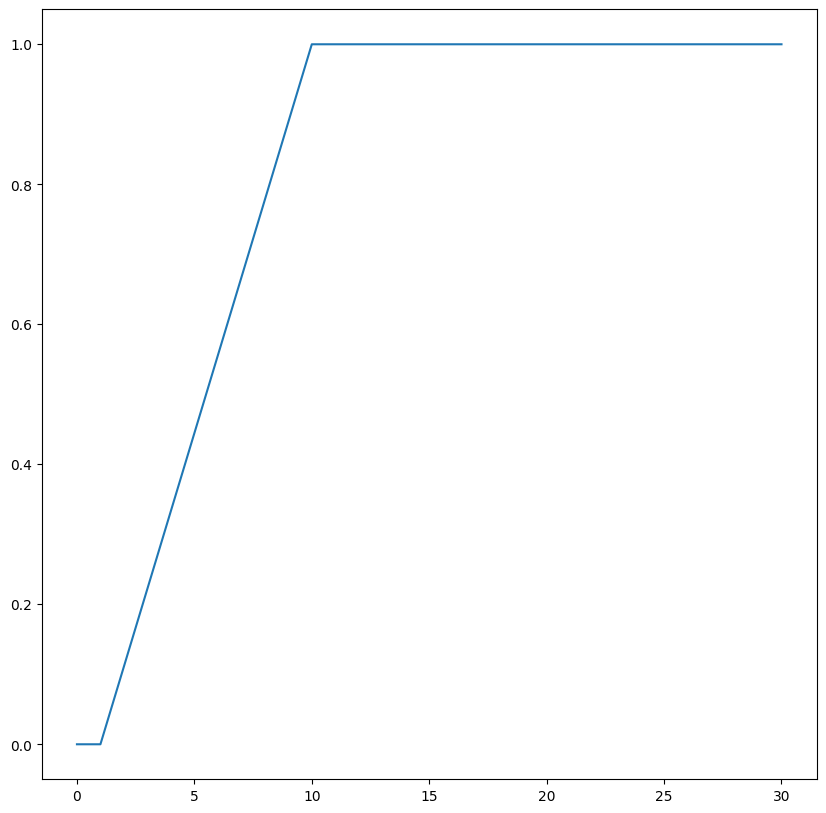

In [9]:
from matplotlib import pyplot
pyplot.rc("figure", figsize=(10, 10))
from fuzzylogic.classes import Domain
from fuzzylogic.functions import R, S, alpha, trapezoid

T = Domain("test", 0, 30, res=0.1)
T.up = R(1,10)
T.up.plot()

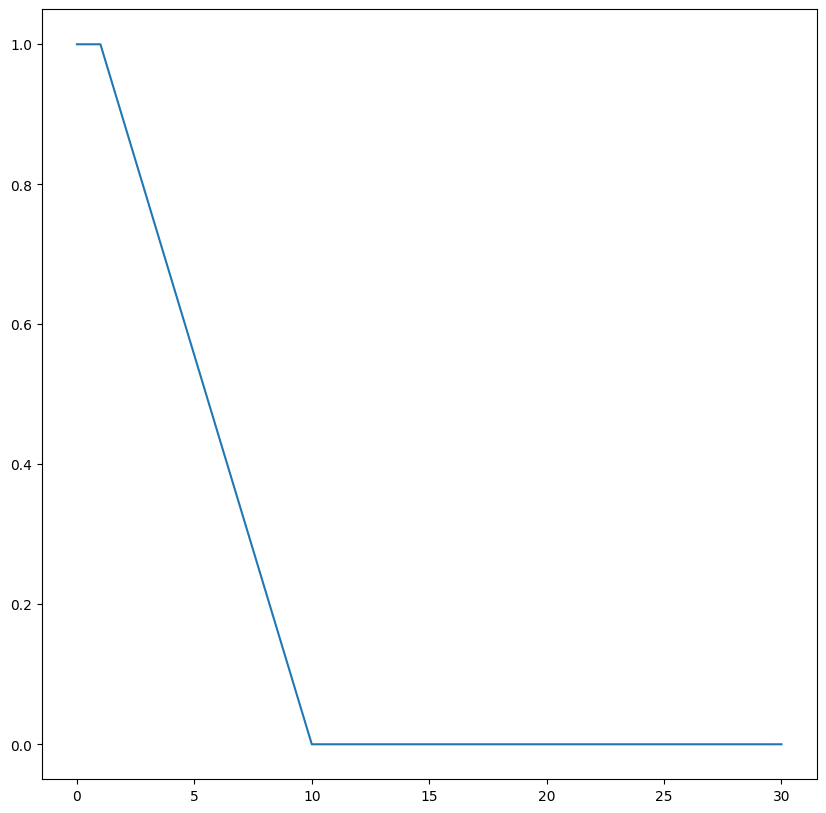

In [160]:
T = Domain("test", 0, 30, res=0.1)
T.down = S(1,10)
T.down.plot()

In [162]:
citta = {
    "Bergamo": {"y_min": 45.70393, "y_max": 45.73204, "x_min": 9.6554, "x_max": 9.69482},
    "Brescia": {"y_min": 45.51223, "y_max": 45.55192, "x_min": 10.16766, "x_max": 10.22379},
    "Busto Arsizio": {"y_min": 45.60415, "y_max": 45.61307, "x_min": 8.84268, "x_max": 8.86092},
    "Cinisello": {"y_min": 45.53831, "y_max": 45.55619, "x_min": 9.21665, "x_max": 9.24037},
    "Cremona": {"y_min": 45.13525, "y_max": 45.14029, "x_min": 10.02376, "x_max": 10.02781},
    "Gallarate": {"y_min": 45.66389, "y_max": 45.68808, "x_min": 8.78849, "x_max": 8.80324},
    "Legnano": {"y_min": 45.58568, "y_max": 45.60697, "x_min": 8.91341, "x_max": 8.94464},
    "Mantova": {"y_min": 45.14338, "y_max": 45.17732, "x_min": 10.7723, "x_max": 10.80735},
    "Milano1": {"y_min": 45.42227, "y_max": 45.43009, "x_min": 9.16876, "x_max": 9.18383},
    "Milano2": {"y_min": 45.45231, "y_max": 45.46221, "x_min": 9.23745, "x_max": 9.25134},
    "Monza": {"y_min": 45.55343, "y_max": 45.57341, "x_min": 9.25052, "x_max": 9.27484},
    "Pavia": {"y_min": 45.1773, "y_max": 45.20226, "x_min": 9.09943, "x_max": 9.16507},
    "Rho": {"y_min": 45.50938, "y_max": 45.52837, "x_min": 9.01814, "x_max": 9.06129},
    "Sondrio": {"y_min": 46.17487, "y_max": 46.1774, "x_min": 9.87432, "x_max": 9.87928},
    "Vigevano": {"y_min": 45.30476, "y_max": 45.35476, "x_min": 8.84868, "x_max": 8.94415},
    "Lomello":{"y_min": 45.1214, "y_max": 45.121596, "x_min": 8.75,"x_max": 8.808469},
    "Maniva" : {"y_min": 41.81 ,"y_max": 45.823282501364766, "x_min": 10.4,"x_max": 10.410490239551244},
    "Lesmo" : {"y_min": 45.5 ,"y_max": 45.8, "x_min": 9.3,"x_max": 9.41},
    "Pizzo Scalino" : {"y_min": 46.2 ,"y_max": 46.3, "x_min": 10.01,"x_max": 10.03},
    "Incerto": {"y_min": 44.65 ,"y_max": 44.65, "x_min": 8.2,"x_max": 8.2}
}

# Funzioni
[torna all'indice](#Indice)

In [68]:
def plottami(A,B):
    med=(B-A)/2
    T.trapezoid = trapezoid(-25, 0, B, B-med/2, c_m=1)
    T.trapezoid.plot()
    T.trapezoid = trapezoid(B, B-med/2, A+med/2, A, c_m=1)
    T.trapezoid.plot()
    T.trapezoid = trapezoid(A+med/2, A, 120, 200, c_m=1)
    T.trapezoid.plot()
    int=med/4+A
    print(int
    

In [167]:
def plottami2 (vect):
    # parto da un down, metto un trapezio e finisco con un up
    T.down=S(vect[0],vect[1])
    T.down.plot()
    T.trapezoid = trapezoid(vect[1]*.5, vect[2], vect[3], vect[4], c_m=1)
    T.trapezoid.plot()
    T.up=R(vect[4]*.5,vect[5])
    T.up.plot()

    

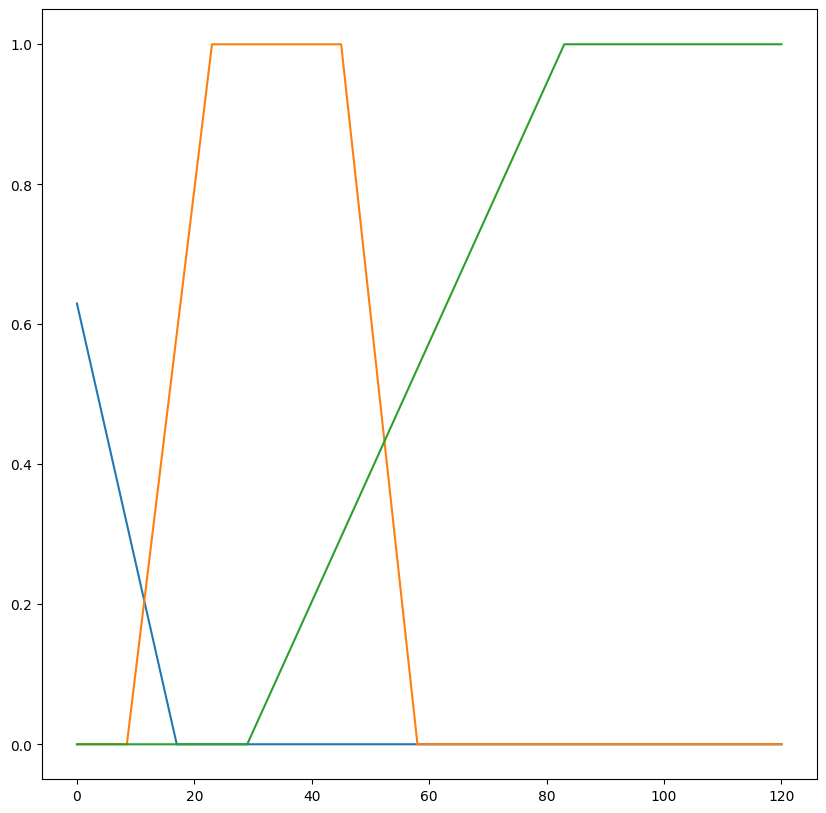

In [145]:
v=[-10,17,23,45,58,83]
plottami2(v)

In [12]:
from matplotlib import pyplot as plt
from fuzzylogic.classes import Domain
from fuzzylogic.functions import trapezoid, S, R, alpha
def plottami3(vect,dom,x):
    # Crea un dominio per la visualizzazione delle funzioni di appartenenza
    #dom=[-30,130]
    L=dom[1]-dom[0]
    eps=0.025*L
    T = Domain("test", dom[0], dom[1], res=0.1)
    """
    # la funzione crea 5 funzioni di appartenenza mu prendendo i dati del vettore:
        v[]  è il vettore che contiene gli intrvalli per cui mu è 1
        gli altri punti vengono calcolati in funzione dei punti di v
        mu1: da dom[0] a vect[0],  x0
        mu2: da x1 a vect[1], vect[2], x2
        mu3: da x3 a vect[3], vect[4], x4
        mu4: da x5 a vect[5], vect[6], x6
        mu5: da x7 a vect[7], dom[1]
    """
    x0=v[1]+eps
    x1=v[0]-eps
    x2=v[3]+eps
    x3=v[2]-eps
    x4=v[5]+eps
    x5=v[4]-eps
    x6=v[7]+eps
    x7=v[6]-eps
    # Definizione delle funzioni di appartenenza
    #plt.figure(figsize=(10, 6))
    membership=[0,0,0,0,0]
    T.down = S(vect[0], x0)
    #T.down.plot()
    membership[0]=T.down(x)
    T.trap = trapezoid(x1, vect[1], vect[2],x2, c_m=1)
    membership[1]=T.trap(x)
    #T.trap.plot()
    T.trap = trapezoid(x3, vect[3], vect[4],x4, c_m=1)
    membership[2]=T.trap(x)
    #T.trap.plot()
    T.trap = trapezoid(x5, vect[5], vect[6],x6, c_m=1)
    membership[3]=T.trap(x)
    #T.trap.plot()
    T.up = R(x7, vect[7])
    membership[4]=T.up(x)
    #T.up.plot()
    # Plot delle funzioni di appartenenza
    
   # dom.plot()
    print(membership)
    return membership
    """
    # questa parte assegna già un valore linguistico mentre voglio che nella valutazione entri il vettore completo
    max_index, max_value = max(enumerate(membership), key=lambda x: x[1])
    #print(max_index)
    if max_index==0:
        return "forte decremento"
    elif max_index==1:
        return "decremento moderato"
    elif max_index==2:
        return "invariato"
    elif max_index==3:
        return "aumento moderato"
    elif max_index==4:
        return "forte aumento"
    
    
    #plt.legend()
    #plt.show()
    """

[1, 0, 0, 0, 0]
0


'forte decremento'

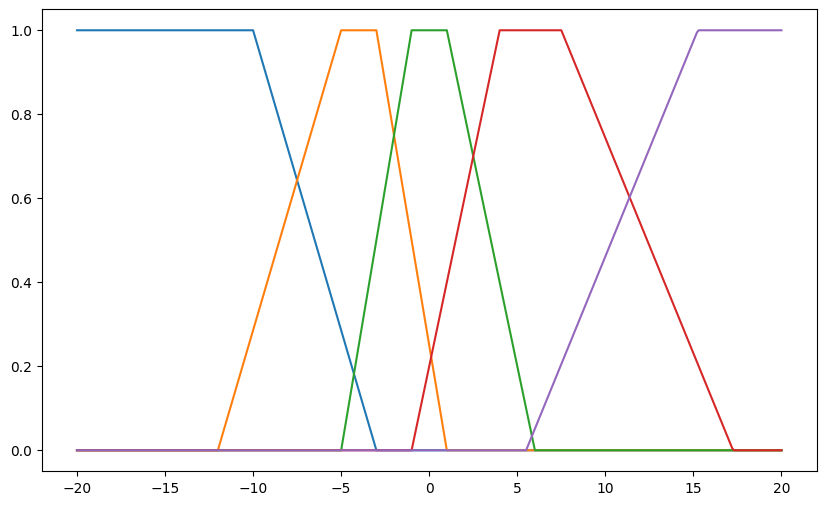

In [181]:
v=[-10,-5,-3,-1,1,4,7.5,15.25]
plottami3(v,[-20,20],-19)

# Precipitazioni
[torna all'indice](#Indice)

Scopo della parte di calcolo sulle precipitazioni è quello di individuare variazioni nel regime di precipitazioni e di siccità

In [190]:
prcptot={ "Bergamo 2021-2040 RCP4.5":{"anno":-1,"inverno":-4,"primavera":14, "estate":0,"autunno":-9},
         "Bergamo 2041-2060 RCP4.5":{"anno":-4,"inverno":-7,"primavera":13, "estate":-6,"autunno":-12},
         "Bergamo 2021-2040 RCP8.5":{"anno":-6,"inverno":-16,"primavera":12, "estate":-1,"autunno":-18},
         "Bergamo 2041-2060 RCP8.5":{"anno":-4,"inverno":-12,"primavera":16, "estate":-5,"autunno":-12}
        }

In [206]:
prcptot={'Bergamo RCP 4.5 2021-2040':{'anno':-0.01,'inverno':-0.04,'primavera':0.14,'estate':0,'autunno':-0.09},
'Bergamo RCP 4.5 2041-2060':{'anno':-0.04,'inverno':-0.07,'primavera':0.13,'estate':-0.06,'autunno':-0.12},
'Bergamo RCP 8.5 2021-2040':{'anno':-0.06,'inverno':-0.16,'primavera':0.12,'estate':-0.01,'autunno':-0.18},
'Bergamo RCP 8.5 2041-2060':{'anno':-0.04,'inverno':-0.12,'primavera':0.16,'estate':-0.05,'autunno':-0.12},
'Brescia RCP 4.5 2021-2040':{'anno':0.07,'inverno':0.11,'primavera':0.24,'estate':0.01,'autunno':-0.01},
'Brescia RCP 4.5 2041-2060':{'anno':0.04,'inverno':0.06,'primavera':0.24,'estate':-0.06,'autunno':-0.06},
'Brescia RCP 8.5 2021-2040':{'anno':0,'inverno':-0.03,'primavera':0.23,'estate':-0.04,'autunno':-0.13},
'Brescia RCP 8.5 2041-2060':{'anno':0.02,'inverno':-0.01,'primavera':0.26,'estate':-0.05,'autunno':-0.07},
'Busto Arsizio RCP 4.5 2021-2040':{'anno':0.09,'inverno':0.02,'primavera':0.29,'estate':0.1,'autunno':-0.03},
'Busto Arsizio RCP 4.5 2041-2060':{'anno':0.05,'inverno':0.07,'primavera':0.24,'estate':0.02,'autunno':-0.07},
'Busto Arsizio RCP 8.5 2021-2040':{'anno':0.03,'inverno':-0.07,'primavera':0.27,'estate':0.05,'autunno':-0.12},
'Busto Arsizio RCP 8.5 2041-2060':{'anno':0.05,'inverno':-0.03,'primavera':0.26,'estate':0.06,'autunno':-0.05},
'Cinisello RCP 4.5 2021-2040':{'anno':0.12,'inverno':0.15,'primavera':0.33,'estate':0.1,'autunno':-0.01},
'Cinisello RCP 4.5 2041-2060':{'anno':0.08,'inverno':0.15,'primavera':0.31,'estate':0.01,'autunno':-0.05},
'Cinisello RCP 8.5 2021-2040':{'anno':0.06,'inverno':0.01,'primavera':0.32,'estate':0.07,'autunno':-0.1},
'Cinisello RCP 8.5 2041-2060':{'anno':0.09,'inverno':0.06,'primavera':0.33,'estate':0.05,'autunno':-0.03},
'Cremona RCP 4.5 2021-2040':{'anno':-0.02,'inverno':-0.09,'primavera':0.01,'estate':0.04,'autunno':0.02},
'Cremona RCP 4.5 2041-2060':{'anno':-0.05,'inverno':-0.11,'primavera':-0.01,'estate':-0.01,'autunno':-0.02},
'Cremona RCP 8.5 2021-2040':{'anno':-0.07,'inverno':-0.18,'primavera':0.04,'estate':-0.02,'autunno':-0.07},
'Cremona RCP 8.5 2041-2060':{'anno':-0.04,'inverno':-0.13,'primavera':-0.01,'estate':0,'autunno':0.03},
'Gallarate RCP 4.5 2021-2040':{'anno':0.12,'inverno':0.06,'primavera':0.31,'estate':0.1,'autunno':0.01},
'Gallarate RCP 4.5 2041-2060':{'anno':0.08,'inverno':0.12,'primavera':0.26,'estate':0.02,'autunno':-0.03},
'Gallarate RCP 8.5 2021-2040':{'anno':0.05,'inverno':-0.05,'primavera':0.3,'estate':0.05,'autunno':-0.1},
'Gallarate RCP 8.5 2041-2060':{'anno':0.08,'inverno':0,'primavera':0.3,'estate':0.07,'autunno':-0.03},
'Legnano RCP 4.5 2021-2040':{'anno':0.09,'inverno':0.03,'primavera':0.28,'estate':0.07,'autunno':-0.03},
'Legnano RCP 4.5 2041-2060':{'anno':0.05,'inverno':0.08,'primavera':0.24,'estate':-0.01,'autunno':-0.07},
'Legnano RCP 8.5 2021-2040':{'anno':0.02,'inverno':-0.07,'primavera':0.27,'estate':0.01,'autunno':-0.12},
'Legnano RCP 8.5 2041-2060':{'anno':0.05,'inverno':-0.02,'primavera':0.26,'estate':0.02,'autunno':-0.05},
'Mantova RCP 4.5 2021-2040':{'anno':0,'inverno':0.02,'primavera':-0.01,'estate':0.07,'autunno':-0.03},
'Mantova RCP 4.5 2041-2060':{'anno':-0.03,'inverno':0.03,'primavera':-0.02,'estate':0.02,'autunno':-0.1},
'Mantova RCP 8.5 2021-2040':{'anno':-0.04,'inverno':-0.07,'primavera':0.01,'estate':0.07,'autunno':-0.13},
'Mantova RCP 8.5 2041-2060':{'anno':-0.02,'inverno':-0.03,'primavera':-0.04,'estate':0.06,'autunno':-0.02},
'Milano Chiesa Rossa RCP 4.5 2021-2040':{'anno':0.07,'inverno':0.07,'primavera':0.2,'estate':0.08,'autunno':-0.03},
'Milano Chiesa Rossa RCP 4.5 2041-2060':{'anno':0.02,'inverno':0.07,'primavera':0.18,'estate':-0.03,'autunno':-0.08},
'Milano Chiesa Rossa RCP 8.5 2021-2040':{'anno':0.01,'inverno':-0.04,'primavera':0.2,'estate':0.05,'autunno':-0.13},
'Milano Chiesa Rossa RCP 8.5 2041-2060':{'anno':0.03,'inverno':0,'primavera':0.18,'estate':0.02,'autunno':-0.04},
'Milano Forlanini RCP 4.5 2021-2040':{'anno':0.07,'inverno':0.1,'primavera':0.22,'estate':0.06,'autunno':-0.02},
'Milano Forlanini RCP 4.5 2041-2060':{'anno':0.02,'inverno':0.1,'primavera':0.19,'estate':-0.03,'autunno':-0.07},
'Milano Forlanini RCP 8.5 2021-2040':{'anno':0.02,'inverno':-0.01,'primavera':0.22,'estate':0.03,'autunno':-0.12},
'Milano Forlanini RCP 8.5 2041-2060':{'anno':0.03,'inverno':0.03,'primavera':0.2,'estate':-0.01,'autunno':-0.04},
'Monza RCP 4.5 2021-2040':{'anno':0.12,'inverno':0.15,'primavera':0.33,'estate':0.1,'autunno':-0.01},
'Monza RCP 4.5 2041-2060':{'anno':0.08,'inverno':0.15,'primavera':0.31,'estate':0.01,'autunno':-0.05},
'Monza RCP 8.5 2021-2040':{'anno':0.06,'inverno':0.02,'primavera':0.32,'estate':0.07,'autunno':-0.1},
'Monza RCP 8.5 2041-2060':{'anno':0.09,'inverno':0.06,'primavera':0.33,'estate':0.05,'autunno':-0.03},
'Pavia RCP 4.5 2021-2040':{'anno':0.03,'inverno':-0.05,'primavera':0.14,'estate':0.13,'autunno':-0.05},
'Pavia RCP 4.5 2041-2060':{'anno':-0.01,'inverno':-0.03,'primavera':0.1,'estate':0.03,'autunno':-0.07},
'Pavia RCP 8.5 2021-2040':{'anno':-0.02,'inverno':-0.15,'primavera':0.13,'estate':0.11,'autunno':-0.12},
'Pavia RCP 8.5 2041-2060':{'anno':0,'inverno':-0.1,'primavera':0.09,'estate':0.06,'autunno':-0.01},
'Rho RCP 4.5 2021-2040':{'anno':0.08,'inverno':0.12,'primavera':0.25,'estate':0.05,'autunno':-0.07},
'Rho RCP 4.5 2041-2060':{'anno':0.03,'inverno':0.13,'primavera':0.22,'estate':-0.05,'autunno':-0.11},
'Rho RCP 8.5 2021-2040':{'anno':0.03,'inverno':0,'primavera':0.25,'estate':0.02,'autunno':-0.15},
'Rho RCP 8.5 2041-2060':{'anno':0.04,'inverno':0.05,'primavera':0.22,'estate':0,'autunno':-0.08},
'Sondrio RCP 4.5 2021-2040':{'anno':0.11,'inverno':0.21,'primavera':0.29,'estate':0.07,'autunno':-0.05},
'Sondrio RCP 4.5 2041-2060':{'anno':0.08,'inverno':0.17,'primavera':0.27,'estate':0.04,'autunno':-0.08},
'Sondrio RCP 8.5 2021-2040':{'anno':0.04,'inverno':0.07,'primavera':0.26,'estate':0.06,'autunno':-0.16},
'Sondrio RCP 8.5 2041-2060':{'anno':0.07,'inverno':0.08,'primavera':0.32,'estate':0.06,'autunno':-0.11},
'Vigevano RCP 4.5 2021-2040':{'anno':0.06,'inverno':-0.02,'primavera':0.25,'estate':0.06,'autunno':-0.04},
'Vigevano RCP 4.5 2041-2060':{'anno':0.01,'inverno':0.03,'primavera':0.2,'estate':-0.05,'autunno':-0.09},
'Vigevano RCP 8.5 2021-2040':{'anno':-0.01,'inverno':-0.11,'primavera':0.23,'estate':0.03,'autunno':-0.12},
'Vigevano RCP 8.5 2041-2060':{'anno':0.02,'inverno':-0.07,'primavera':0.22,'estate':0,'autunno':-0.05}
}

In [243]:
import numpy as np
v=[-.10,-.075,-.03,-.01,0.01,.04,0.075,0.1525]
for key, value in prcptot.items():
    print(f"Key: {key}")
    esposizione="media"
    matrix=[]
    alta=[[1,0,0,0,1],[1,0,0,0,1],[1,0,0,0,1],[1,0,0,0,1],[1,0,0,0,1]]
    for stagione, valore in value.items():
        
        variazione=plottami3(v,[-0.20,.20],valore)
        #print(f"  {stagione}: {valore}, variazione {variazione}")
        matrix.append(list(variazione))
    matrice_risultante = np.multiply(matrix, alta)
    for i in range(len(matrice_risultante)):
      for j in range(len(matrice_risultante[0])):
        print(f"{matrice_risultante[i][j]:.2f}", end=" ")
      print()
    punteggio_alto=np.sum(matrice_risultante)
    print(f"------ {np.sum(matrice_risultante):.2f} ------------")
    media=[[0,1,0,1,0],[0,1,0,1,0],[0,1,0,1,0],[0,1,0,1,0],[0,1,0,1,0]]
    matrice_risultante = np.multiply(matrix, media)
    for i in range(len(matrice_risultante)):
      for j in range(len(matrice_risultante[0])):
        print(f"{matrice_risultante[i][j]:.2f}", end=" ")
      print()
    punteggio_medio=np.sum(matrice_risultante)
    print(f"------ {np.sum(matrice_risultante):.2f} ------------")
    bassa=[[0,0,1,0,0],[0,0,1,0,0],[0,0,1,0,0],[0,0,1,0,0],[0,0,1,0,0]]
    matrice_risultante = np.multiply(matrix, bassa)
    for i in range(len(matrice_risultante)):
      for j in range(len(matrice_risultante[0])):
        print(f"{matrice_risultante[i][j]:.2f}", end=" ")
      print()
    punteggio_basso=np.sum(matrice_risultante)
    print(f"------ {np.sum(matrice_risultante):.2f} ------------")
    #regola decisionale: prendo il punteggio più alto
    if punteggio_alto >= punteggio_medio and punteggio_alto >= punteggio_basso:
        print("ESPOSIZIONE ALTA")
    elif punteggio_medio > punteggio_alto and punteggio_medio > punteggio_basso:
        print("ESPOSIZIONE MEDIA")
    else:
        print ("ESPOSIZIONE BASSA")
    """
        if variazione=="forte aumento" or variazione == "forte decremento":
            p+= 4
        elif variazione=="decremento moderato" or variazione=="aumento moderato":
            p+=1
        else:
            p+=0
        
    #print(f"il valore di p è {p}")
    if p>8:
        esposizione="alta"
    elif p<=2:
        esposizione="bassa"
    print (esposizione)
    """

Key: Bergamo RCP 4.5 2021-2040
[0, 0.33333333333333337, 1, 0, 0]
[0, 1, 0.0, 0, 0]
[0, 0, 0, 0.257142857142857, 0.8571428571428573]
[0, 0.0, 1, 4.336808689942018e-17, 0]
[0.7142857142857142, 0.5714285714285717, 0, 0, 0]
0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.86 
0.00 0.00 0.00 0.00 0.00 
0.71 0.00 0.00 0.00 0.00 
------ 1.57 ------------
0.00 0.33 0.00 0.00 0.00 
0.00 1.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.26 0.00 
0.00 0.00 0.00 0.00 0.00 
0.00 0.57 0.00 0.00 0.00 
------ 2.16 ------------
0.00 0.00 1.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 
0.00 0.00 1.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 
------ 2.00 ------------
ESPOSIZIONE MEDIA
Key: Bergamo RCP 4.5 2041-2060
[0, 1, 0.0, 0, 0]
[0.14285714285714302, 1, 0, 0, 0]
[0, 0, 0, 0.37142857142857144, 0.7428571428571429]
[0, 1, 0, 0, 0]
[1, 0, 0, 0, 0]
0.00 0.00 0.00 0.00 0.00 
0.14 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.74 
0.00 0.00 0.00 0.00 0.00 
1.00 0.00 0.00 0.00 0.00 
-

Bergamo, rcp 4.5
anno invariato
inverno decremento moderato
primavera forte aumento
estate invariato
autunno forte decremento


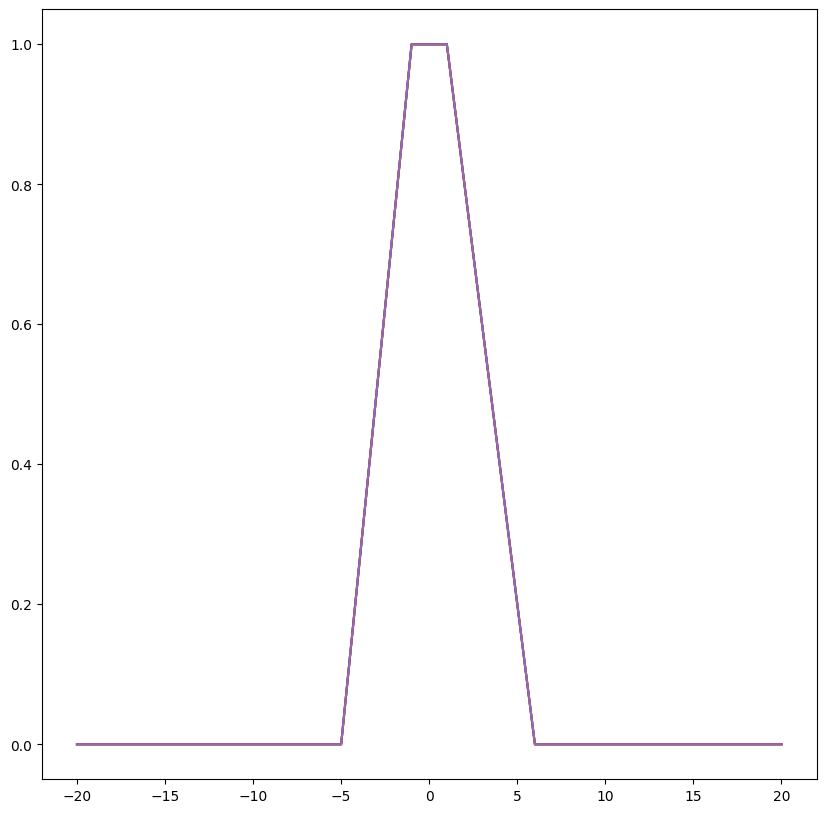

In [188]:
print("Bergamo, rcp 4.5")
v=[-10,-5,-3,-1,1,4,7.5,15.25]
print("anno",plottami3(v,[-20,20],-1))
print("inverno",plottami3(v,[-20,20],-4))
print("primavera",plottami3(v,[-20,20],+14))
print("estate",plottami3(v,[-20,20],0))
print("autunno",plottami3(v,[-20,20],-9))

-3.0


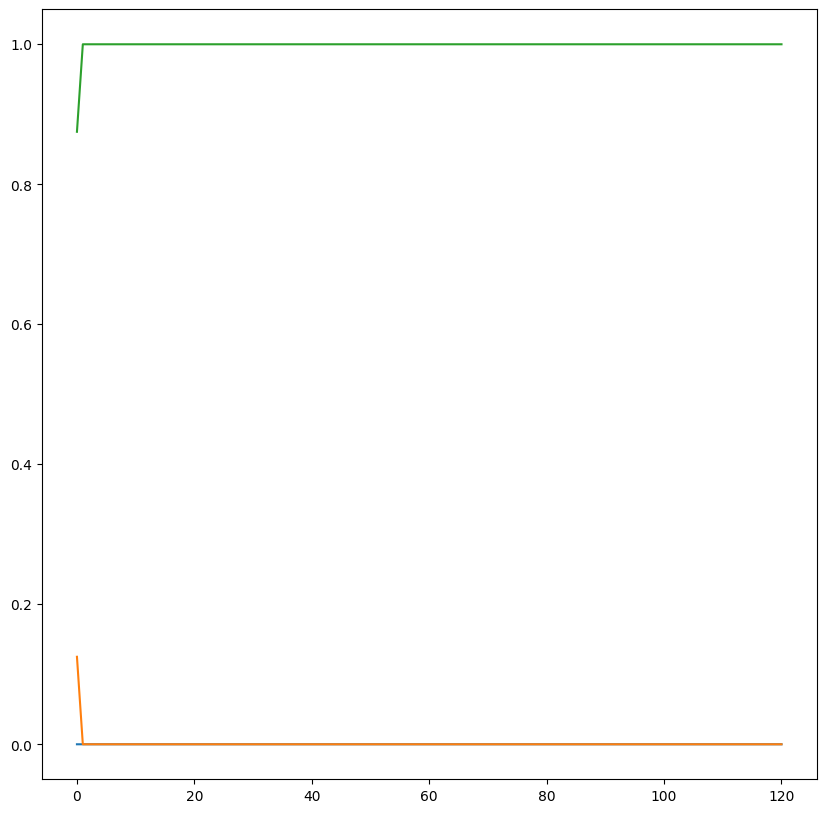

In [70]:
plottami(1,-31)

84.375


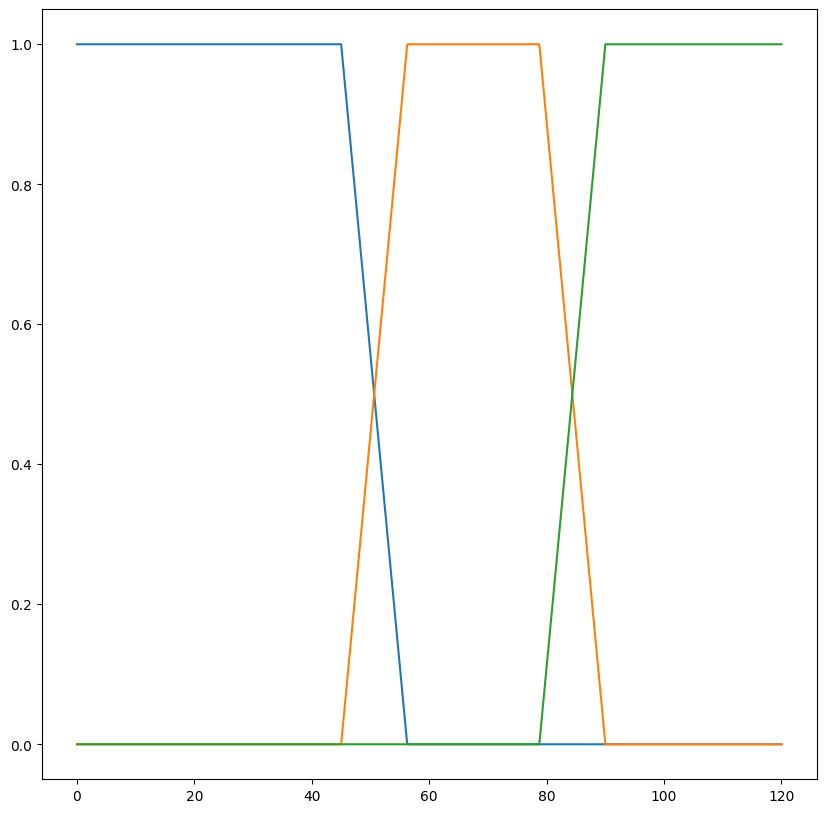

In [61]:
plottami(90,45)

92.03125


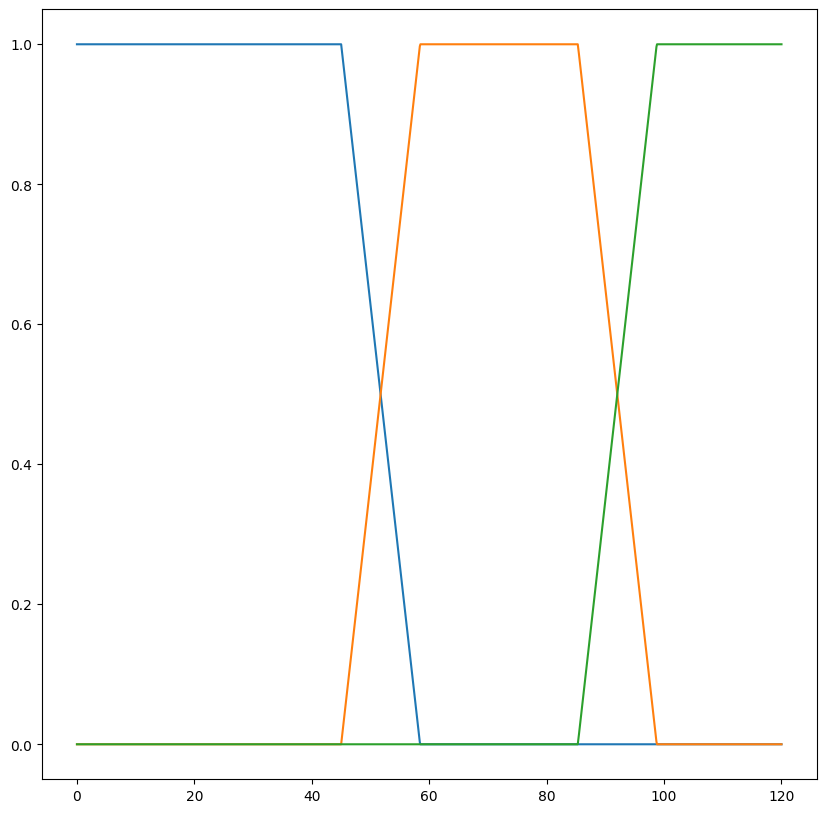

In [62]:
plottami((83.75+113.75)/2,45)

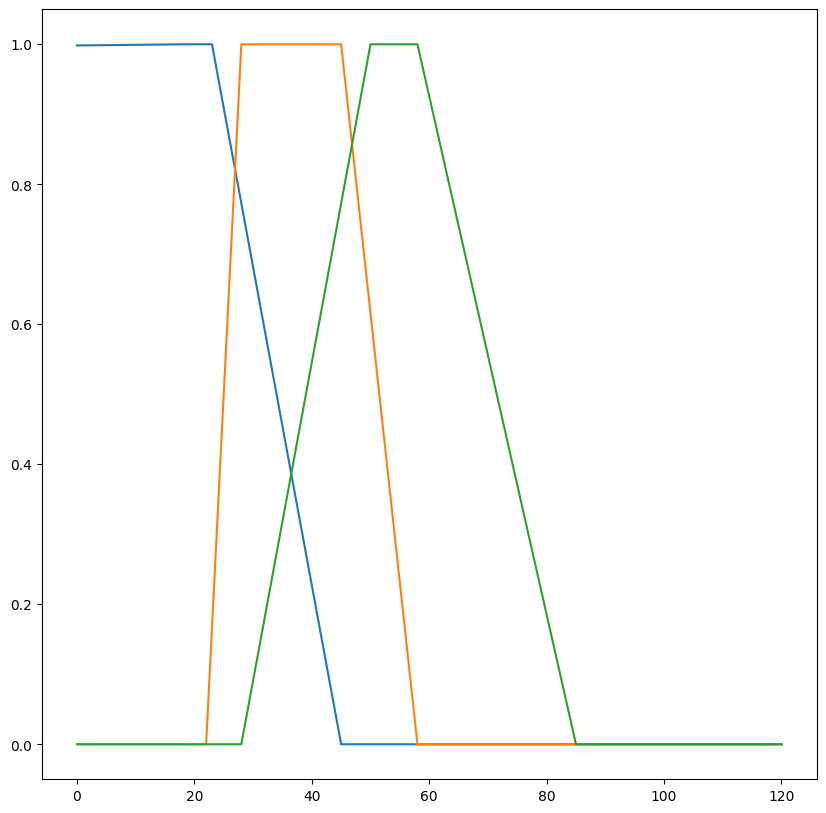

In [80]:
T.trapezoid = trapezoid(-10000, 17, 23, 45, c_m=1)
T.trapezoid.plot()
T.trapezoid = trapezoid(22, 28, 45, 58,c_m=1)
T.trapezoid.plot()
T.trapezoid = trapezoid(28, 50, 58,85,c_m=1)
T.trapezoid.plot()

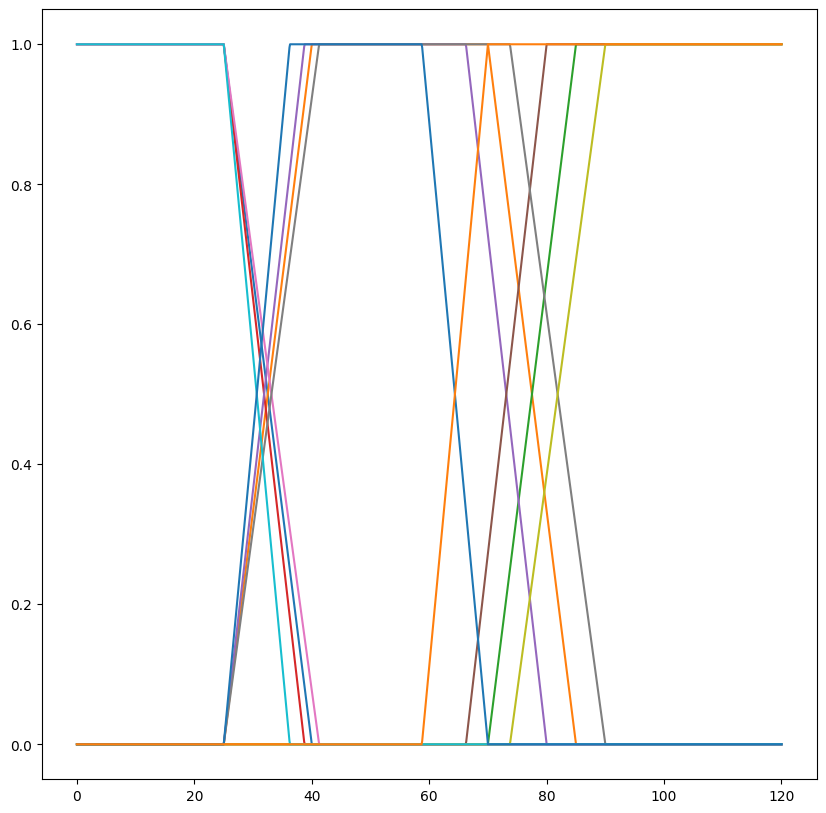

In [241]:
from fuzzylogic.classes import Domain, Set
from fuzzylogic.functions import (sigmoid, gauss, trapezoid, 
                             triangular_sigmoid, rectangular)

T = Domain("test", 0, 120, res=0.1)
"""
T.sigmoid = sigmoid(1,.25,97.5)
T.sigmoid.plot()
T.gauss = gauss(72.5, 0.003, c_m=1)
T.gauss.plot()
"""
B=25
A=85
med=(B-A)/2

T.trapezoid = trapezoid(-25, 0, B, B-med/2, c_m=1)
T.trapezoid.plot()
T.trapezoid = trapezoid(B, B-med/2, A+med/2, A, c_m=1)
T.trapezoid.plot()
T.trapezoid = trapezoid(A+med/2, A, 120, 200, c_m=1)
T.trapezoid.plot()
#T.triangular_sigmoid = triangular_sigmoid(40, 70, c=55)
#T.triangular_sigmoid.plot()
B=25
A=80
med=(B-A)/2

T.trapezoid = trapezoid(-25, 0, B, B-med/2, c_m=1)
T.trapezoid.plot()
T.trapezoid = trapezoid(B, B-med/2, A+med/2, A, c_m=1)
T.trapezoid.plot()
T.trapezoid = trapezoid(A+med/2, A, 120, 200, c_m=1)
T.trapezoid.plot()
B=25
A=90
med=(B-A)/2

T.trapezoid = trapezoid(-25, 0, B, B-med/2, c_m=1)
T.trapezoid.plot()
T.trapezoid = trapezoid(B, B-med/2, A+med/2, A, c_m=1)
T.trapezoid.plot()
T.trapezoid = trapezoid(A+med/2, A, 120, 200, c_m=1)
T.trapezoid.plot()
B=25
A=70
med=(B-A)/2

T.trapezoid = trapezoid(-25, 0, B, B-med/2, c_m=1)
T.trapezoid.plot()
T.trapezoid = trapezoid(B, B-med/2, A+med/2, A, c_m=1)
T.trapezoid.plot()
T.trapezoid = trapezoid(A+med/2, A, 120, 200, c_m=1)
T.trapezoid.plot()

In [242]:
from fuzzylogic.hedges import very

In [97]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 29.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for networkx>=1.9.0 from https://files.pythonhosted.org/packages/d5/f0/8fbc882ca80cf077f1b246c0e3c3465f7f415439bdea6b899f6b19f61f70/networkx-3.2.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 113.1 MB/s eta 0:00:00
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=e713651d0f9ab55194d81d7ee0e279703668b8bed9e5761ba7d10cf38ad35b70
  Stored in directory: /root/.cache/pip/wheels/b1/67/d1/6c29aeb1cd2d36447ad5b0de027580b8894aff702a9b50041e
Successfully built scikit-fuzzy

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [136]:
import numpy as np
import skfuzzy as fuzz

# Definizione delle tre funzioni trapezoidali
T1 = fuzz.trapmf(np.arange(-10000, 10001, 1), [-10000, .04, .06, .075])
T2 = fuzz.trapmf(np.arange(-10000, 10001, 1), [.04, .06, .075, .1])
T3 = fuzz.trapmf(np.arange(-10000, 10001, 1), [.06, .075, .1525, .5])

# Funzione per valutare la classe fuzzy di x
def classify_x(x):
    # Valutazione della classe fuzzy di x per ciascuna delle tre funzioni trapezoidali
    membership1 = fuzz.interp_membership(np.arange(-10000, 10001, 1), T1, x)
    membership2 = fuzz.interp_membership(np.arange(-10000, 10001, 1), T2, x)
    membership3 = fuzz.interp_membership(np.arange(-10000, 10001, 1), T3, x)
    
    # Trova il massimo valore di appartenenza
    max_membership = max(membership1, membership2, membership3)
    
    # Determina quale funzione di appartenenza corrisponde al massimo valore
    if max_membership == membership1:
        return "basso"
    elif max_membership == membership2:
        return "moderato"
    elif max_membership == membership3 or x>=85:
        return "elevato"





In [144]:
from fuzzylogic.classes import Trimf, S, R
from fuzzylogic.misc import visualize

# Definizione della funzione di appartenenza S
S1 = S(-float('inf'), -0.08, 1)

# Definizione della funzione di appartenenza R
R1 = R(0.15, float('inf'))

# Definizione delle tre funzioni di appartenenza triangolari
Tri1 = Trimf([-0.08, -0.05, -0.03])
Tri2 = Trimf([-0.05, 0.04, 0.06])
Tri3 = Trimf([0.04, 0.06, 0.075])

# Visualizzazione delle funzioni di appartenenza
visualize(S1, R1, Tri1, Tri2, Tri3)



ImportError: cannot import name 'Trimf' from 'fuzzylogic.classes' (/usr/local/lib/python3.11/site-packages/fuzzylogic/classes.py)

In [142]:
fuzz.interp_membership(np.arange(-10000, 10001, 1), T3, x_input)

0.0

In [100]:
max_membership = max(result, key=lambda k: result[k])

TypeError: tuple indices must be integers or slices, not numpy.float64

# Temperatura
[torna all'indice](#Indice)

In questa sezione si combinano gli indici di temperatura:
- solo scenario RCP 8.5
- indici considerati: TX01, CDDs, TR, SU30, WSDIest
- le funzioni di appartenenza sono definite per ciascun indice e valorizzano le variabili linguistiche invariato, aumento moderato, forte aumento
- i valori di riferimento sono stabiliti con i percentili della distribuzione statistica; gli alfa-cut/support sono costruiti di conseguenza (criterio base +/-2.5% della variazione)
- per ogni indice e per ogni lat,lon si costruisce il valore di appartenenza alle tre categorie
- si sommano i valori per colonna e si prende il valore maggiore  

In [38]:
file_indici_stat=['./Indici_2023/PNACC_2023/rasters/ERA5/TX01/TX01_ensemble_mean_2041-2060_assoluto__rcp85.nc',
                  './Indici_2023/PNACC_2023/rasters/ERA5/CDDs/Anomalia_gradi_giorno_di_raffrescamento_GG_20412060_rispetto_a_19962015__rcp85.nc',
                  './Indici_2023/PNACC_2023/rasters/ERA5/tropical_nights/Anomalia_notti_tropicali_TR_20412060_rispetto_a_19962015__rcp85.nc',
                  './Indici_2023/PNACC_2023/rasters/ERA5/summer_days_30/Anomalia_giorni_estivi_SU30_20412060_rispetto_a_19962015__rcp85.nc',
                  './Indici_2023/PNACC_2023/rasters/ERA5/WSDI_est/WSDI_est_ensemble_max_20412060_rispetto_a_19962015__rcp85.nc'
                  ]

In [108]:
def estrazione_dati(dataset, area, variabile):
    # la funzione prende un dataset e delle coordinate (area) ed estrae il valore presente nel dataset
    # va passato anche il nome della variabile
   
    valore=None
   
    for var_name in dataset.variables:
        if var_name == 'lon' or var_name=='lat':
            
            valore = dataset[variabile].sel(lon=slice(area['x_min'], area['x_max']), lat=slice(area['y_min'], area['y_max'])).mean().values
            #print(f"Valore di {variabile} per {city}: {valore.values}")
        elif var_name == 'longitude' or var_name== 'latitude':
            nearest_point = dataset.sel(longitude=area['x_min'], latitude=area['y_min'],method='nearest')
            # Ottieni il valore effettivo dei dati
            valore = nearest_point[variabile].values.item()
            #print("--->",valore)
    #print(f"...{area}: {valore}")
    return valore if valore is not None else 9999.9
    

In [148]:
#test su un dataset che non va....
f='./Indici_2023/PNACC_2023/rasters/ERA5/CDDs/Anomalia_gradi_giorno_di_raffrescamento_GG_20412060_rispetto_a_19962015__rcp85.nc'
ds=xr.open_dataset(f)

In [149]:
ds.sel(longitude=7.806,latitude=46.77,method='nearest')

<xarray.Dataset>
Dimensions:    ()
Coordinates:
    longitude  float64 7.806
    latitude   float64 46.77
Data variables:
    crs        int32 ...
    layer      float32 ...
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.5-2)
    date:         2023-07-20 09:25:06

In [154]:
# Seleziona il punto più vicino
nearest_point = ds.sel(longitude=7.9, latitude=47.7, method='nearest')

# Ottieni il valore effettivo dei dati
valore = nearest_point['layer'].values


In [155]:
valore.item()

22.426822662353516

[0, 0.4426297505696606, 0.7344221496582037]

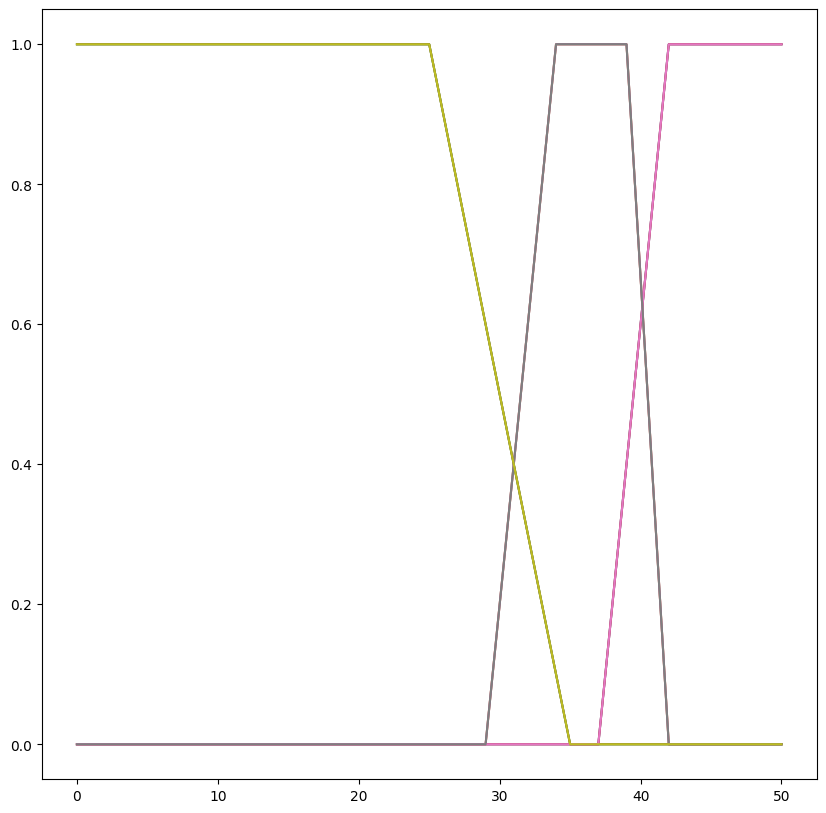

In [237]:
mutx01(35,34,37, 33.78504753112793)


[0, 1, 0.34604034423828123]

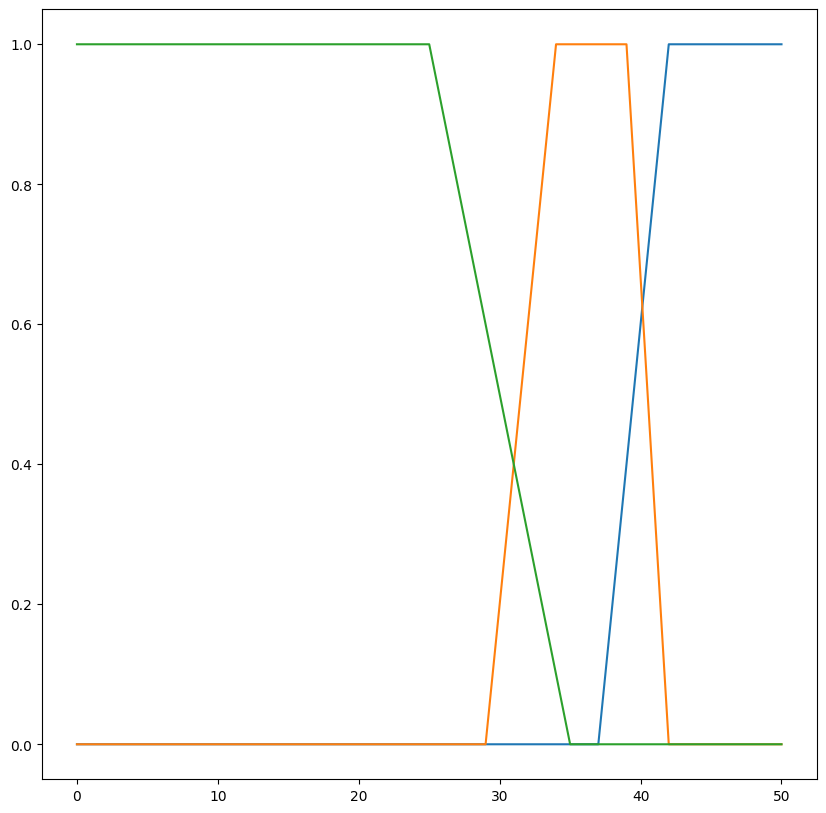

In [238]:
mutx01(35,34,37,38.730201721191406)


[0, 0.4426297505696606, 0.7344221496582037]

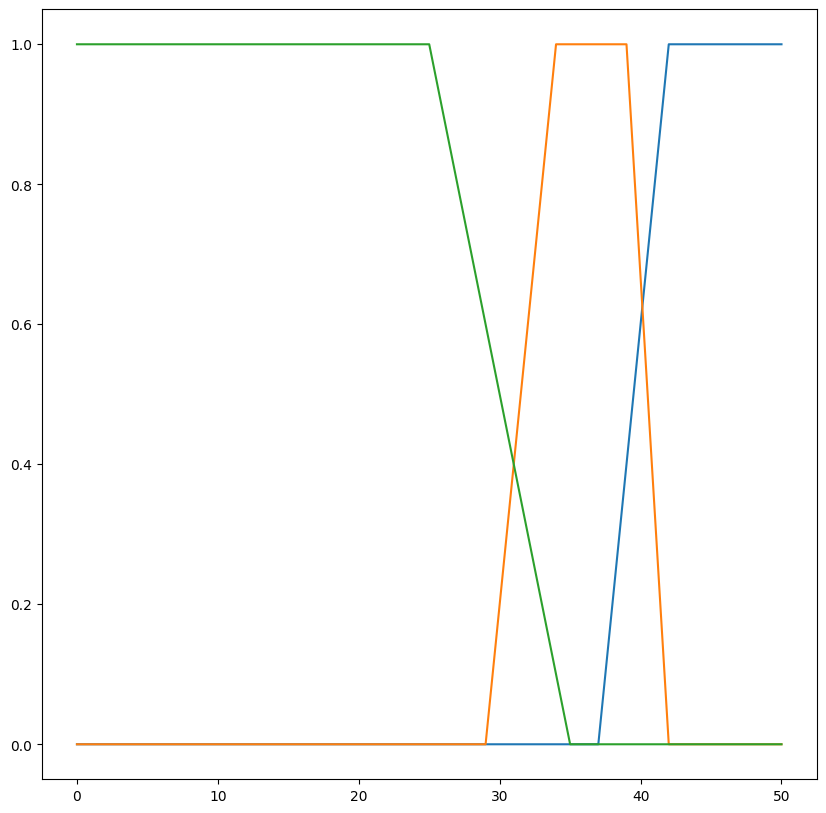

In [239]:
mutx01(35,34,37,40.67211074829102)

In [324]:
for f in file_indici_stat:
    print(f)
    ds = xr.open_dataset(f)
    valori_per_citta = []
    for city, data in citta.items():
            # Determina quale variabile usare
            variabile = None
            if 'tasmax' in ds.variables:
                variabile = 'tasmax'
            elif 'layer' in ds.variables:
                variabile = 'layer'
            elif '__xarray_dataarray_variable__' in ds.variables:
                variabile = '__xarray_dataarray_variable__'
            
            if variabile:
                # Seleziona le coordinate appropriate
                if 'lon' in ds.variables and 'lat' in ds.variables:
                    lon = 'lon'
                    lat = 'lat'
                elif 'longitude' in ds.variables and 'latitude' in ds.variables:
                    lon = 'longitude'
                    lat = 'latitude'
                else:
                    print("Coordinate di longitudine e/o latitudine non trovate nel dataset")
                    continue  # Passa alla prossima città
                    
                # Esegui l'estrazione dei dati
                eps=0.5
                y_min = data['y_min'] - eps
                y_max = data['y_max'] + eps
                x_min = data['x_min']-eps
                x_max = data['x_max']+eps
                dt={"y_min": y_min, "y_max": y_max, "x_min": x_min, "x_max": x_max}
                valore=estrazione_dati(ds, dt, variabile)
                print(f"Valore di {variabile} per {city}: {valore}")
                try:
                    indice_index = f.index('TX01')
                    p=mutx01(soglia_tx01, valore)    
                except ValueError:
                    indice_index = None
                try:
                    indice_index = f.index('CDD')
                    p=mu_cdds(soglia_cdds, valore)    
                except ValueError:
                    indice_index = None
                try:
                    indice_index = f.index('TR_')
                    p=mu_tr(soglia_tr, valore)    
                except ValueError:
                    indice_index = None
                try:
                    indice_index = f.index('SU30_')
                    p=mu_su30(soglia_su30, valore)    
                except ValueError:
                    indice_index = None
                try:
                    indice_index = f.index('WSDI')
                    p=mu_wsdi(soglia_wsdi, valore)    
                except ValueError:
                    indice_index = None
                print(f"Punteggio: {p}")
                
                valori_per_citta.append(valore)
            else:
                print("Variabile non trovata nel dataset")
    # Calcola i percentili 25, 50 e 75 dei valori estratti
    percentile_25 = np.percentile(valori_per_citta, 5)
    percentile_50 = np.percentile(valori_per_citta, 50)
    percentile_75 = np.percentile(valori_per_citta, 95)
    
    print("Percentile 25:", percentile_25)
    print("Percentile 50:", percentile_50)
    print("Percentile 75:", percentile_75)        
        

./Indici_2023/PNACC_2023/rasters/ERA5/TX01/TX01_ensemble_mean_2041-2060_assoluto__rcp85.nc
Valore di tasmax per Bergamo: 35.62284851074219
Punteggio: [0. 1. 0.]
Valore di tasmax per Brescia: 36.78098678588867
Punteggio: [0. 1. 0.]
Valore di tasmax per Busto Arsizio: 38.48611831665039
Punteggio: [0.         1.         0.29722366]
Valore di tasmax per Cinisello: 38.730201721191406
Punteggio: [0.         1.         0.34604034]
Valore di tasmax per Cremona: 40.7993049621582
Punteggio: [0.        0.4002317 0.759861 ]
Valore di tasmax per Gallarate: 37.66433334350586
Punteggio: [0.         1.         0.13286667]
Valore di tasmax per Legnano: 38.5139274597168
Punteggio: [0.        1.        0.3027855]
Valore di tasmax per Mantova: 40.64031219482422
Punteggio: [0.         0.45322928 0.72806245]
Valore di tasmax per Milano1: 39.886409759521484
Punteggio: [0.         0.70453006 0.57728195]
Valore di tasmax per Milano2: 39.64548110961914
Punteggio: [0.         0.78483963 0.52909625]
Valore di tas

In [179]:
from fuzzylogic.classes import Domain
from fuzzylogic.functions import R, S, alpha,trapezoid

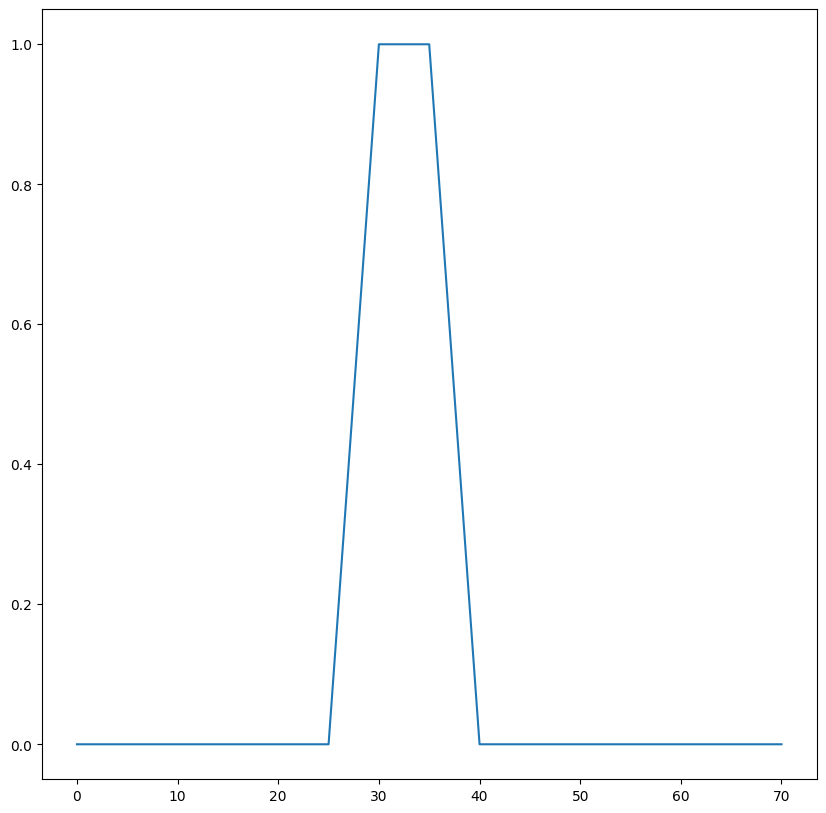

In [186]:
#trapezoid(low, c_low, c_high, high, *, c_m=1, no_m=0)
T = Domain("test", 0, 70, res=0.1)
T.trapezoid=trapezoid(25, 30, 35, 40, c_m=1)
T.trapezoid.plot()

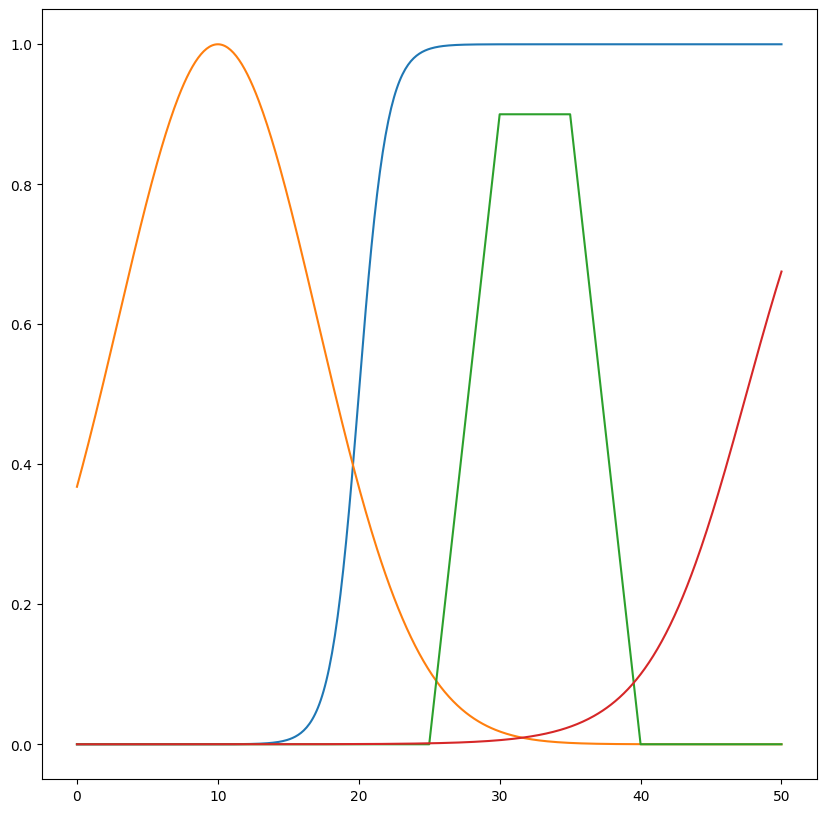

In [247]:
from fuzzylogic.classes import Domain, Set
from fuzzylogic.functions import (sigmoid, gauss, trapezoid, 
                             triangular_sigmoid, rectangular)

T = Domain("test", 0, 50, res=0.1)
T.sigmoid = sigmoid(1,1,20)
T.sigmoid.plot()
T.gauss = gauss(10, 0.01, c_m=1.)
T.gauss.plot()
T.trapezoid = trapezoid(25, 30, 35, 40, c_m=0.9)
T.trapezoid.plot()
T.triangular_sigmoid = triangular_sigmoid(40, 70, c=55)
T.triangular_sigmoid.plot()

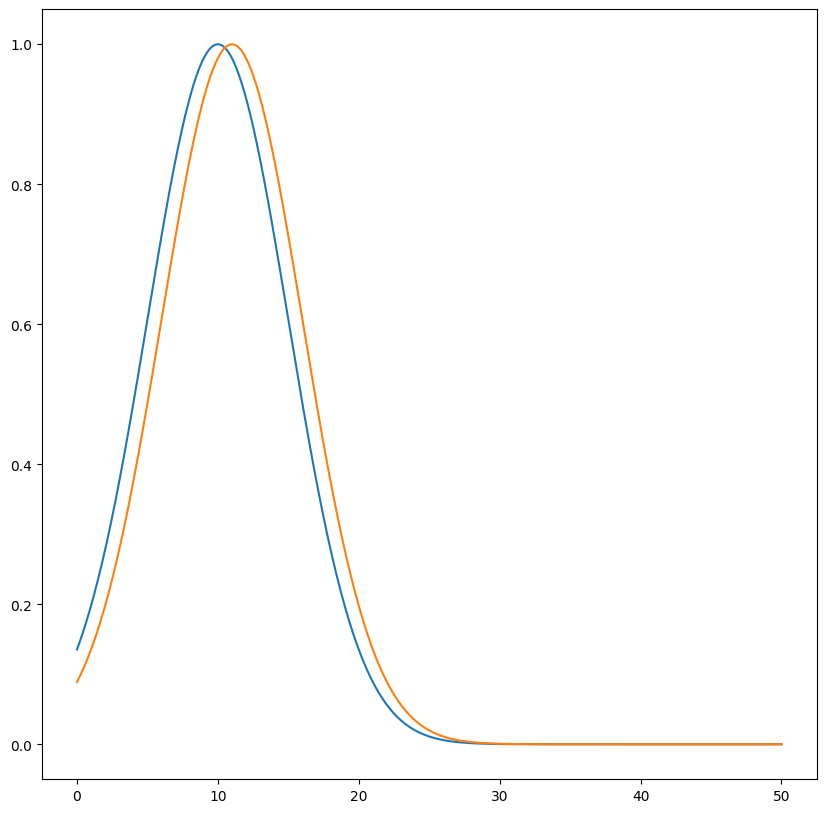

In [265]:
a=(11-10)/50

T.gauss = gauss(10, a, c_m=1.)

T.gauss.plot()
T.gauss1 = gauss(11, a, c_m=1.)
T.gauss1.plot()

In [319]:
def mutx01(soglie,valore):
    # funzione di appartenenza in base al limite della temperatura per caso clima invariato, clima moderato aumento e clima forte aumento
    
    T = Domain("test", 25, 50, res=0.1)
    T.up = R(soglie[2],soglie[2]+5)
    T.down= S(soglie[0]-10,soglie[0])
    span=5
    
    T.trapezoid = trapezoid(soglie[1]-span,soglie[1],soglie[1]+span,soglie[2]+span)
    my_array=np.array([T.down(valore),T.trapezoid(valore),T.up(valore)], dtype=np.float32)
    return my_array

In [320]:
def mu_cdds(soglie,valore):
    # funzione di appartenenza in base al limite della temperatura per caso clima invariato, clima moderato aumento e clima forte aumento
    T = Domain("test", 130, 300, res=1)
    T.up = R(soglie[2],soglie[2]+75)
    T.down= S(soglie[0]-50,soglie[0])
    span=40
    
    T.trapezoid = trapezoid(soglie[1]-span,soglie[1],soglie[1]+span,soglie[2]+span)
    my_array=np.array([T.down(valore),T.trapezoid(valore),T.up(valore)], dtype=np.float32)
    return my_array

In [321]:
def mu_tr(soglie,valore):
    # funzione di appartenenza in base al limite della temperatura per caso clima invariato, clima moderato aumento e clima forte aumento
    T = Domain("test", 0, 25, res=0.1)
    T.up = R(soglie[2],soglie[2]+2)
    T.down= S(soglie[0]-2,soglie[0])
    span=3
    
    T.trapezoid = trapezoid(soglie[1]-span,soglie[1],soglie[1]+span,soglie[2]+span)
    my_array=np.array([T.down(valore),T.trapezoid(valore),T.up(valore)], dtype=np.float32)
    return my_array

In [322]:
def mu_su30(soglie,valore):
    # funzione di appartenenza in base al limite della temperatura per caso clima invariato, clima moderato aumento e clima forte aumento
    T = Domain("test", 0, 25, res=0.1)
    T.up = R(soglie[2],soglie[2]+5)
    T.down= S(soglie[0]-6,soglie[0])
    span=3
    
    T.trapezoid = trapezoid(soglie[1]-span,soglie[1],soglie[1]+span,soglie[2]+span)
    my_array=np.array([T.down(valore),T.trapezoid(valore),T.up(valore)], dtype=np.float32)
    return my_array

In [323]:
def mu_wsdi(soglie,valore):
    # funzione di appartenenza in base al limite della temperatura per caso clima invariato, clima moderato aumento e clima forte aumento
    T = Domain("test", 0, 25, res=0.1)
    T.up = R(soglie[2],soglie[2]+2)
    T.down= S(soglie[0]-2,soglie[0])
    span=2.5
    
    T.trapezoid = trapezoid(soglie[1]-span,soglie[1],soglie[1]+span,soglie[2]+span)
    my_array=np.array([T.down(valore),T.trapezoid(valore),T.up(valore)], dtype=np.float32)
    return my_array

In [240]:
#test su un dataset che non va....
f='./Indici_2023/PNACC_2023/rasters/ERA5/TX01/TX01_ensemble_mean_2041-2060_assoluto__rcp85.nc'
ds=xr.open_dataset(f)

In [359]:
file_indici_stat_2021=['./Indici_2023/PNACC_2023/rasters/ERA5/TX01/TX01_ensemble_mean_2021-2040_assoluto__rcp85.nc',
                  './Indici_2023/PNACC_2023/rasters/ERA5/CDDs/Anomalia_gradi_giorno_di_raffrescamento_GG_20212040_rispetto_a_19962015__rcp85.nc',
                  './Indici_2023/PNACC_2023/rasters/ERA5/tropical_nights/Anomalia_notti_tropicali_TR_20212040_rispetto_a_19962015__rcp85.nc',
                  './Indici_2023/PNACC_2023/rasters/ERA5/summer_days_30/Anomalia_giorni_estivi_SU30_20212040_rispetto_a_19962015__rcp85.nc',
                  './Indici_2023/PNACC_2023/rasters/ERA5/WSDI_est/WSDI_est_ensemble_max_20212040_rispetto_a_19962015__rcp85.nc'
                  ]

In [360]:
file_indici_stat=['./Indici_2023/PNACC_2023/rasters/ERA5/TX01/TX01_ensemble_mean_2041-2060_assoluto__rcp85.nc',
                  './Indici_2023/PNACC_2023/rasters/ERA5/CDDs/Anomalia_gradi_giorno_di_raffrescamento_GG_20412060_rispetto_a_19962015__rcp85.nc',
                  './Indici_2023/PNACC_2023/rasters/ERA5/tropical_nights/Anomalia_notti_tropicali_TR_20412060_rispetto_a_19962015__rcp85.nc',
                  './Indici_2023/PNACC_2023/rasters/ERA5/summer_days_30/Anomalia_giorni_estivi_SU30_20412060_rispetto_a_19962015__rcp85.nc',
                  './Indici_2023/PNACC_2023/rasters/ERA5/WSDI_est/WSDI_est_ensemble_max_20412060_rispetto_a_19962015__rcp85.nc'
                  ]

In [112]:
# Definizione delle soglie per ciascuna funzione di appartenenza


f='./Indici_2023/PNACC_2023/rasters/ERA5/TX01/TX01_ensemble_mean_2041-2060_assoluto__rcp85.nc'
ds=xr.open_dataset(f)
ds_cdds=xr.open_dataset ( './Indici_2023/PNACC_2023/rasters/ERA5/CDDs/Anomalia_gradi_giorno_di_raffrescamento_GG_20412060_rispetto_a_19962015__rcp85.nc')
ds_su30=xr.open_dataset('./Indici_2023/PNACC_2023/rasters/ERA5/summer_days_30/Anomalia_giorni_estivi_SU30_20412060_rispetto_a_19962015__rcp85.nc')
ds_tr=xr.open_dataset('./Indici_2023/PNACC_2023/rasters/ERA5/tropical_nights/Anomalia_notti_tropicali_TR_20412060_rispetto_a_19962015__rcp85.nc')
ds_wsdi= xr.open_dataset('./Indici_2023/PNACC_2023/rasters/ERA5/WSDI_est/WSDI_est_ensemble_max_20412060_rispetto_a_19962015__rcp85.nc')
for lat in ds['lat'].values:
    somma=np.array([0,0,0])
    for lon in ds['lon'].values:
        # Seleziona il valore di temperatura massima alla posizione specificata
        eps=0.5
        y_min = lat - eps
        y_max = lat + eps
        x_min = lon-eps
        x_max = lon+eps
        dt={"y_min": y_min, "y_max": y_max, "x_min": x_min, "x_max": x_max}
        valore=estrazione_dati(ds, dt, 'tasmax')
        
        # Applica la funzione mutx01 al valore
        result = mutx01(soglia_tx01, valore)
        somma=np.add(somma,result)
        # Stampa il risultato o fai qualsiasi altra operazione desiderata
        print(f'Coordinate (lat, lon): ({lat}, {lon})' )
        print(f"TX01 {valore}  - Membership array: {result}")

        #Seleziono il valore per CDDs
        valore=estrazione_dati(ds_cdds,dt,'layer')
        result = mu_cdds(soglia_cdds, valore)
        somma=np.add(somma,result)
        print(f"CDDs  {valore} - Membership array: {result}")
        
        #Seleziono il valore per TR
        valore=estrazione_dati(ds_tr,dt,'layer')
        result = mu_tr(soglia_tr, valore)
        somma=np.add(somma,result)
        print(f"TR  {valore} - Membership array: {result}")
      

        #Seleziono il valore per SU30
        valore=estrazione_dati(ds_su30,dt,'layer')
        result = mu_su30(soglia_su30, valore)
        somma=np.add(somma,result)
        print(f"SU30  {valore} - Membership array: {result}")

        # Seleziono WSDIest
        valore=estrazione_dati(ds_wsdi,dt,'__xarray_dataarray_variable__')
        
        # Applica la funzione mutx01 al valore
        result = mu_wsdi(soglia_wsdi, valore)
        somma=np.add(somma,result)
        # Stampa il risultato o fai qualsiasi altra operazione desiderata
        print(f"WSDI  {valore} - Membership array: {result}")

        print(f"Punteggio complessivo: {somma}")


NameError: name 'mutx01' is not defined

Questa parte è stata modificata per l'uso con generic_trapezoid

**Riparti da qui**

In [369]:
soglia_tx01=np.array([38,39.5,42], dtype=np.float32)
soglia_cdds=np.array([110,245,260],dtype=np.float32)
soglia_tr=np.array([9.7,20.5,23.5],dtype=np.float32)
soglia_su30=np.array([2,7,14],dtype=np.float32)
soglia_wsdi=np.array([1,10.6,16],dtype=np.float32)

In [385]:
cicla_citta(file_indici_stat)

./Indici_2023/PNACC_2023/rasters/ERA5/TX01/TX01_ensemble_mean_2041-2060_assoluto__rcp85.nc
Valore di tasmax per Bergamo: 38.519161224365234
Bergamo Punteggio: 0.86, 0.14, 0.00
Valore di tasmax per Brescia: 40.312557220458984
Brescia Punteggio: 0.00, 0.89, 0.11
Valore di tasmax per Busto Arsizio: 39.992034912109375
Busto Arsizio Punteggio: 0.00, 0.97, 0.03
Valore di tasmax per Cinisello: 40.682411193847656
Cinisello Punteggio: 0.00, 0.58, 0.42
Valore di tasmax per Cremona: 41.678131103515625
Cremona Punteggio: 0.00, 0.01, 0.99
Valore di tasmax per Gallarate: 39.69496154785156
Gallarate Punteggio: 0.00, 0.99, 0.01
Valore di tasmax per Legnano: 40.138023376464844
Legnano Punteggio: 0.00, 0.95, 0.05
Valore di tasmax per Mantova: 39.74481201171875
Mantova Punteggio: 0.00, 0.99, 0.01
Valore di tasmax per Milano1: 40.970733642578125
Milano1 Punteggio: 0.00, 0.26, 0.74
Valore di tasmax per Milano2: 40.942413330078125
Milano2 Punteggio: 0.00, 0.28, 0.72
Valore di tasmax per Monza: 40.5072402954

In [169]:
while True:
    e=np.random.uniform(-.1,.1)
    soglia_tx01=np.array([35,40,42], dtype=np.float32)
    soglia_su30=np.array([8,11,13],dtype=np.float32)
    soglia_tr=np.array([14,20,22],dtype=np.float32)
    soglia_cdds=np.array([186,248,255],dtype=np.float32)
    soglia_wsdi=np.array([9,11,13],dtype=np.float32)
    cicla_citta()
    # Chiedi all'utente se desidera fare un altro ciclo
    print(f"il valore di e --> {e}")
    risposta = input("Vuoi fare un altro ciclo? (sì/no): ")
    
    # Se l'utente non vuole fare un altro ciclo, esci dal loop
    if risposta.lower() != 'sì':
        classifica_tutto()
        break

./Indici_2023/PNACC_2023/rasters/ERA5/TX01/TX01_ensemble_mean_2021-2040_assoluto__rcp85.nc
Valore di tasmax per Bergamo: 36.1308479309082
Punteggio: [1. 0. 0.]
Valore di tasmax per Brescia: 38.49155807495117
Punteggio: [0.02123341 0.9787666  0.        ]
Valore di tasmax per Busto Arsizio: 38.300010681152344
Punteggio: [0.11372067 0.88627934 0.        ]
Valore di tasmax per Cinisello: 38.61376953125
Punteggio: [0. 1. 0.]
Valore di tasmax per Cremona: 40.24573516845703
Punteggio: [0. 1. 0.]
Valore di tasmax per Gallarate: 37.629676818847656
Punteggio: [0.43738648 0.5626135  0.        ]
Valore di tasmax per Legnano: 38.17686080932617
Punteggio: [0.1731827  0.82681733 0.        ]
Valore di tasmax per Mantova: 39.42049026489258
Punteggio: [0. 1. 0.]
Valore di tasmax per Milano1: 39.224342346191406
Punteggio: [0. 1. 0.]
Valore di tasmax per Milano2: 38.98548889160156
Punteggio: [0. 1. 0.]
Valore di tasmax per Monza: 38.561927795410156
Punteggio: [0. 1. 0.]
Valore di tasmax per Pavia: 39.8263

TypeError: 'str' object is not callable

**Ciclo sulle città**

In [383]:
def cicla_citta(file_indici_stat):
    somme_cumulative={}
    for f in file_indici_stat:
        print(f)
        ds = xr.open_dataset(f)
        valori_per_citta = []
        for city, data in citta.items():
                if city not in somme_cumulative:
                    somme_cumulative[city] = np.zeros(3)
                # Determina quale variabile usare
                variabile = None
                if 'tasmax' in ds.variables:
                    variabile = 'tasmax'
                elif 'layer' in ds.variables:
                    variabile = 'layer'
                elif '__xarray_dataarray_variable__' in ds.variables:
                    variabile = '__xarray_dataarray_variable__'
                
                if variabile:
                    # Seleziona le coordinate appropriate
                    if 'lon' in ds.variables and 'lat' in ds.variables:
                        lon = 'lon'
                        lat = 'lat'
                    elif 'longitude' in ds.variables and 'latitude' in ds.variables:
                        lon = 'longitude'
                        lat = 'latitude'
                    else:
                        print("Coordinate di longitudine e/o latitudine non trovate nel dataset")
                        continue  # Passa alla prossima città
                        
                    # Esegui l'estrazione dei dati
                    eps=0.01
                    y_min = data['y_min'] - eps
                    y_max = data['y_max'] + eps
                    x_min = data['x_min']-eps
                    x_max = data['x_max']+eps
                    dt={"y_min": y_min, "y_max": y_max, "x_min": x_min, "x_max": x_max}
                    valore=estrazione_dati(ds, dt, variabile)
                    print(f"Valore di {variabile} per {city}: {valore}")
                    try:
                        indice_index = f.index('TX01')
                        p=generic_trapezoid(soglia_tx01, 0.05,.005,valore)    
                    except ValueError:
                        indice_index = None
                    try:
                        indice_index = f.index('CDD')
                        p=generic_trapezoid(soglia_cdds, 0.05,.05, valore)    
                    except ValueError:
                        indice_index = None
                    try:
                        indice_index = f.index('TR_')
                        p=generic_trapezoid(soglia_tr, 0.05,.07, valore)    
                    except ValueError:
                        indice_index = None
                    try:
                        indice_index = f.index('SU30_')
                        p=generic_trapezoid(soglia_su30, 0.05,.05, valore)    
                    except ValueError:
                        indice_index = None
                    try:
                        indice_index = f.index('WSDI')
                        p=generic_trapezoid(soglia_wsdi, 0.1,.08, valore)  
                    except ValueError:
                        indice_index = None
                    formatted_p = [f"{val:.2f}" for val in p]
                    print(city,end=' ')
                    print("Punteggio:", ", ".join(formatted_p))    
                    #print(f"Punteggio: {p:.2f}")
                    somme_cumulative[city] += p
                    valori_per_citta.append(valore)
                else:
                    print("Variabile non trovata nel dataset")
        # Calcola i percentili 25, 50 e 75 dei valori estratti
        percentile_25 = np.percentile(valori_per_citta, 5)
        percentile_50 = np.percentile(valori_per_citta, 50)
        percentile_75 = np.percentile(valori_per_citta, 95)
        
        print("Percentile 25:", percentile_25)
        print("Percentile 50:", percentile_50)
        print("Percentile 75:", percentile_75)        
    # Stampare il dizionario con le somme cumulative per ogni città
    print("Somme cumulative per città:")
    for city, somma_cumulativa in somme_cumulative.items():
        formatted_p = [f"{val:.2f}" for val in somma_cumulativa]
        print(city,end=' ')
        print("Punteggio:", ", ".join(formatted_p))    
        #print(f"{city}: {somma_cumulativa:.2f}")
        classifica=classificazione(somma_cumulativa)
        
        print(f"Classificazione: {classifica}")

**Ciclo sui dataset completi**

In [167]:
# ciclo testato e funzionante

import csv
file_output = open('output.txt', 'w')
# Apri il file in modalità di scrittura
with open('classificazione_calore_20212040.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Longitudine', 'Latitudine', 'Classificazione'])

    f='./Indici_2023/PNACC_2023/rasters/ERA5/TX01/TX01_ensemble_mean_2021-2040_assoluto__rcp85.nc'
    ds=xr.open_dataset(f)
    ds_cdds=xr.open_dataset ( './Indici_2023/PNACC_2023/rasters/ERA5/CDDs/Anomalia_gradi_giorno_di_raffrescamento_GG_20212040_rispetto_a_19962015__rcp85.nc')
    ds_su30=xr.open_dataset('./Indici_2023/PNACC_2023/rasters/ERA5/summer_days_30/Anomalia_giorni_estivi_SU30_20212040_rispetto_a_19962015__rcp85.nc')
    ds_tr=xr.open_dataset('./Indici_2023/PNACC_2023/rasters/ERA5/tropical_nights/Anomalia_notti_tropicali_TR_20212040_rispetto_a_19962015__rcp85.nc')
    ds_wsdi= xr.open_dataset('./Indici_2023/PNACC_2023/rasters/ERA5/WSDI_est/WSDI_est_ensemble_max_20212040_rispetto_a_19962015__rcp85.nc')
    for lat in ds['lat'].values:
        
        for lon in ds['lon'].values:
            somma=np.array([0,0,0])   
            # Stampa il risultato o fai qualsiasi altra operazione desiderata
            print(f'Esame delle coordinate (lat, lon): {lat:.2f}, {lon:.2f}' )
            file_output.write(f'Esame delle coordinate (lat, lon): {lat:.2f}, {lon:.2f}\n')
            eps=0.0
            y_min = lat - eps
            y_max = lat + eps
            x_min = lon-eps
            x_max = lon+eps
            dt={"y_min": y_min, "y_max": y_max, "x_min": x_min, "x_max": x_max}
            #print("Nel box ",dt)
            valore=estrazione_dati(ds, dt, 'tasmax')
            
            # Applica la funzione mutx01 al valore
            result = generic_trapezoid(soglia_tx01, 0.5,0.5,valore)
            somma=np.add(somma,result)
            #print(f"TX01 {valore}  - Membership array: {result}")
            file_output.write(f"TX01 {valore}  - Membership array: {result}\n")
            
            #Seleziono il valore per CDDs
            valore=estrazione_dati(ds_cdds,dt,'layer')
            result = generic_trapezoid(soglia_cdds, 0.5,0.5,valore)
            somma=np.add(somma,result)
            #print(f"CDDs  {valore} - Membership array: {result}")
            file_output.write(f"CDDs  {valore} - Membership array: {result}\n")
            #Seleziono il valore per TR
            valore=estrazione_dati(ds_tr,dt,'layer')
            result = generic_trapezoid(soglia_tr, 0.5,0.5,valore)
            somma=np.add(somma,result)
            #print(f"TR  {valore} - Membership array: {result}")
            file_output.write(f"TR  {valore} - Membership array: {result}\n")
            
            #Seleziono il valore per SU30
            valore=estrazione_dati(ds_su30,dt,'layer')
            result = generic_trapezoid(soglia_su30, 0.5,0.5,valore)
            somma=np.add(somma,result)
            #print(f"SU30  {valore} - Membership array: {result}")
            file_output.write(f"SU30  {valore} - Membership array: {result}\n")
            
            # Seleziono WSDIest
            valore=estrazione_dati(ds_wsdi,dt,'__xarray_dataarray_variable__')
            result = generic_trapezoid(soglia_wsdi, 0.5,0.5,valore)
            somma=np.add(somma,result)
            #print(f"WSDI  {valore} - Membership array: {result}")
            file_output.write(f"WSDI  {valore} - Membership array: {result}\n")
            #print(f"Punteggio complessivo: {somma}")
            # Trova l'indice del massimo valore tra i tre
            indice_massimo = np.argmax(somma)
            
            # Determina la classificazione in base all'indice del massimo valore
            if indice_massimo == 0:
                classificazione = "basso"
            elif indice_massimo == 1:
                classificazione = "medio"
            else:
                classificazione = "alto"
            
            print(f"Classificazione: {somma} {classificazione}")
            writer.writerow([lon, lat, classificazione])
file_output.close()

Esame delle coordinate (lat, lon): 44.65, 7.85
Classificazione: [4.08548252 0.91451746 0.        ] basso
Esame delle coordinate (lat, lon): 44.65, 7.87
Classificazione: [4.08548252 0.91451746 0.        ] basso
Esame delle coordinate (lat, lon): 44.65, 7.90
Classificazione: [4.02389864 0.97610134 0.        ] basso
Esame delle coordinate (lat, lon): 44.65, 7.92
Classificazione: [4.00636744 0.99363256 0.        ] basso
Esame delle coordinate (lat, lon): 44.65, 7.95
Classificazione: [4.00325648 0.9967435  0.        ] basso
Esame delle coordinate (lat, lon): 44.65, 7.97
Classificazione: [4. 1. 0.] basso
Esame delle coordinate (lat, lon): 44.65, 8.00
Classificazione: [4.03221665 0.96778333 0.        ] basso
Esame delle coordinate (lat, lon): 44.65, 8.02
Classificazione: [4.08130325 0.91869676 0.        ] basso
Esame delle coordinate (lat, lon): 44.65, 8.05
Classificazione: [4.16956335 0.83043665 0.        ] basso
Esame delle coordinate (lat, lon): 44.65, 8.07
Classificazione: [4.26543421 0.7

KeyboardInterrupt: 

In [352]:
def classifica_tutto():
    import csv
    file_output = open('output.txt', 'w')
    # Apri il file in modalità di scrittura
    with open('classificazione_calore.csv', mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Longitudine', 'Latitudine', 'Classificazione'])
    
        f='./Indici_2023/PNACC_2023/rasters/ERA5/TX01/TX01_ensemble_mean_2041-2060_assoluto__rcp85.nc'
        ds=xr.open_dataset(f)
        ds_cdds=xr.open_dataset ( './Indici_2023/PNACC_2023/rasters/ERA5/CDDs/Anomalia_gradi_giorno_di_raffrescamento_GG_20412060_rispetto_a_19962015__rcp85.nc')
        ds_su30=xr.open_dataset('./Indici_2023/PNACC_2023/rasters/ERA5/summer_days_30/Anomalia_giorni_estivi_SU30_20412060_rispetto_a_19962015__rcp85.nc')
        ds_tr=xr.open_dataset('./Indici_2023/PNACC_2023/rasters/ERA5/tropical_nights/Anomalia_notti_tropicali_TR_20412060_rispetto_a_19962015__rcp85.nc')
        ds_wsdi= xr.open_dataset('./Indici_2023/PNACC_2023/rasters/ERA5/WSDI_est/WSDI_est_ensemble_max_20412060_rispetto_a_19962015__rcp85.nc')
        for lat in ds['lat'].values:
            
            for lon in ds['lon'].values:
                somma=np.array([0,0,0])   
                # Stampa il risultato o fai qualsiasi altra operazione desiderata
                print(f'Esame delle coordinate (lat, lon): {lat:.2f}, {lon:.2f}' ,  end='\r')
                file_output.write(f'Esame delle coordinate (lat, lon): {lat:.2f}, {lon:.2f}\n')
                eps=0.01
                y_min = lat - eps
                y_max = lat + eps
                x_min = lon-eps
                x_max = lon+eps
                dt={"y_min": y_min, "y_max": y_max, "x_min": x_min, "x_max": x_max}
                #print("Nel box ",dt)
                valore=estrazione_dati(ds, dt, 'tasmax')
                
                # Applica la funzione mutx01 al valore
                result = generic_trapezoid(soglia_tx01, 0.5,0.5,valore)
                somma=np.add(somma,result)
                #print(f"TX01 {valore}  - Membership array: {result}")
                file_output.write(f"TX01 {valore}  - Membership array: {result}\n")
                
                #Seleziono il valore per CDDs
                valore=estrazione_dati(ds_cdds,dt,'layer')
                result = generic_trapezoid(soglia_cdds, 0.5,0.5,valore)
                somma=np.add(somma,result)
                #print(f"CDDs  {valore} - Membership array: {result}")
                file_output.write(f"CDDs  {valore} - Membership array: {result}\n")
                #Seleziono il valore per TR
                valore=estrazione_dati(ds_tr,dt,'layer')
                result = generic_trapezoid(soglia_tr, 0.5,0.5,valore)
                somma=np.add(somma,result)
                #print(f"TR  {valore} - Membership array: {result}")
                file_output.write(f"TR  {valore} - Membership array: {result}\n")
                
                #Seleziono il valore per SU30
                valore=estrazione_dati(ds_su30,dt,'layer')
                result = generic_trapezoid(soglia_su30, 0.5,0.5,valore)
                somma=np.add(somma,result)
                #print(f"SU30  {valore} - Membership array: {result}")
                file_output.write(f"SU30  {valore} - Membership array: {result}\n")
                
                # Seleziono WSDIest
                valore=estrazione_dati(ds_wsdi,dt,'__xarray_dataarray_variable__')
                result = generic_trapezoid(soglia_wsdi, 0.5,0.5,valore)
                somma=np.add(somma,result)
                #print(f"WSDI  {valore} - Membership array: {result}")
                file_output.write(f"WSDI  {valore} - Membership array: {result}\n")
                #print(f"Punteggio complessivo: {somma}")
                # Trova l'indice del massimo valore tra i tre
                classifica=classificazione(somma)
                writer.writerow([lon, lat, classifica])
                if classifica =="nd":
                     risposta = input(f"Valore {classifica} per: {somma} ")
                    
    file_output.close()
    print("ELABORAZIONE TERMINATA!")

In [353]:
def classifica_tutto_2021():
    import csv
    file_output = open('output_2021.txt', 'w')
    # Apri il file in modalità di scrittura
    with open('classificazione_calore_2021-2040.csv', mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Longitudine', 'Latitudine', 'Classificazione'])
    
        f='./Indici_2023/PNACC_2023/rasters/ERA5/TX01/TX01_ensemble_mean_2021-2040_assoluto__rcp85.nc'
        ds=xr.open_dataset(f)
        ds_cdds=xr.open_dataset ( './Indici_2023/PNACC_2023/rasters/ERA5/CDDs/Anomalia_gradi_giorno_di_raffrescamento_GG_20212040_rispetto_a_19962015__rcp85.nc')
        ds_su30=xr.open_dataset('./Indici_2023/PNACC_2023/rasters/ERA5/summer_days_30/Anomalia_giorni_estivi_SU30_20212040_rispetto_a_19962015__rcp85.nc')
        ds_tr=xr.open_dataset('./Indici_2023/PNACC_2023/rasters/ERA5/tropical_nights/Anomalia_notti_tropicali_TR_20212040_rispetto_a_19962015__rcp85.nc')
        ds_wsdi= xr.open_dataset('./Indici_2023/PNACC_2023/rasters/ERA5/WSDI_est/WSDI_est_ensemble_max_20212040_rispetto_a_19962015__rcp85.nc')
        for lat in ds['lat'].values:
            
            for lon in ds['lon'].values:
                somma=np.array([0,0,0])   
                # Stampa il risultato o fai qualsiasi altra operazione desiderata
                print(f'Esame delle coordinate (lat, lon): {lat:.2f}, {lon:.2f}', end='\r' )
                file_output.write(f'Esame delle coordinate (lat, lon): {lat:.2f}, {lon:.2f}\n')
                eps=0.01
                y_min = lat - eps
                y_max = lat + eps
                x_min = lon-eps
                x_max = lon+eps
                dt={"y_min": y_min, "y_max": y_max, "x_min": x_min, "x_max": x_max}
                #print("Nel box ",dt)
                valore=estrazione_dati(ds, dt, 'tasmax')
                
                # Applica la funzione mutx01 al valore
                result = generic_trapezoid(soglia_tx01, 0.5,0.5,valore)
                somma=np.add(somma,result)
                #print(f"TX01 {valore}  - Membership array: {result}")
                file_output.write(f"TX01 {valore}  - Membership array: {result}\n")
                
                #Seleziono il valore per CDDs
                valore=estrazione_dati(ds_cdds,dt,'layer')
                result = generic_trapezoid(soglia_cdds, 0.5,0.5,valore)
                somma=np.add(somma,result)
                #print(f"CDDs  {valore} - Membership array: {result}")
                file_output.write(f"CDDs  {valore} - Membership array: {result}\n")
                #Seleziono il valore per TR
                valore=estrazione_dati(ds_tr,dt,'layer')
                result = generic_trapezoid(soglia_tr, 0.5,0.5,valore)
                somma=np.add(somma,result)
                #print(f"TR  {valore} - Membership array: {result}")
                file_output.write(f"TR  {valore} - Membership array: {result}\n")
                
                #Seleziono il valore per SU30
                valore=estrazione_dati(ds_su30,dt,'layer')
                result = generic_trapezoid(soglia_su30, 0.5,0.5,valore)
                somma=np.add(somma,result)
                #print(f"SU30  {valore} - Membership array: {result}")
                file_output.write(f"SU30  {valore} - Membership array: {result}\n")
                
                # Seleziono WSDIest
                valore=estrazione_dati(ds_wsdi,dt,'__xarray_dataarray_variable__')
                result = generic_trapezoid(soglia_wsdi, 0.5,0.5,valore)
                somma=np.add(somma,result)
                #print(f"WSDI  {valore} - Membership array: {result}")
                file_output.write(f"WSDI  {valore} - Membership array: {result}\n")
                #print(f"Punteggio complessivo: {somma}")
                # Trova l'indice del massimo valore tra i tre
                classifica=classificazione(somma)
                writer.writerow([lon, lat, classifica])
                file_output.write(f"--------------> {somma} --> {classifica}\n")
                if classifica =="nd":
                     risposta = input(f"Valore {classifica} per: {somma} ")
                    
    file_output.close()
    print()
    print("ELABORAZIONE TERMINATA!")

In [386]:
classifica_tutto()


ELABORAZIONE TERMINATA!(lat, lon): 46.73, 11.55


In [387]:
classifica_tutto_2021()

Esame delle coordinate (lat, lon): 46.73, 11.55
ELABORAZIONE TERMINATA!


In [207]:
def mappami(file):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    
    # Leggi i dati dal file CSV
    data = pd.read_csv(file)
    
    # Mappa dei colori per le etichette di classificazione
    color_map = {'alto': 2, 'medio': 1, 'basso': 0}
    
    # Converti i valori di classificazione nella mappa numerica
    data['Classificazione'] = data['Classificazione'].map(color_map)
    
    # Crea un'istogramma 2D dei dati con colori mappati
    heatmap, xedges, yedges = np.histogram2d(data['Longitudine'], data['Latitudine'], bins=50, weights=data['Classificazione'])
    
    # Rotazione della heatmap
    heatmap = heatmap.T
    
    # Crea la heatmap con Matplotlib
    plt.figure(figsize=(10, 8))
    plt.imshow(heatmap, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], interpolation='nearest', origin='lower')
    plt.colorbar(label='Valore')
    plt.xlabel('Longitudine')
    plt.ylabel('Latitudine')
    plt.title('Heatmap dei dati')
    
    # Mostra la heatmap
    plt.show()


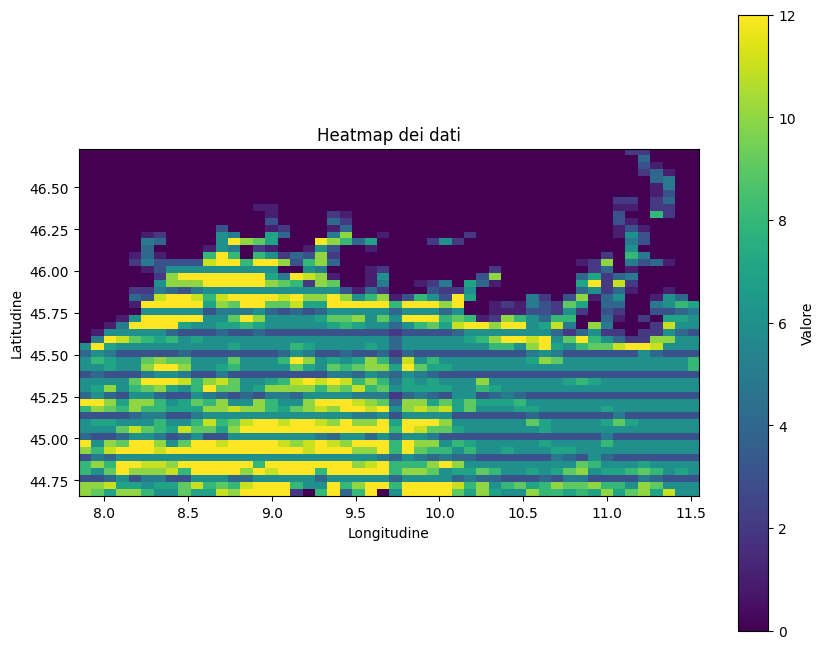

In [388]:
mappami('classificazione_calore.csv')

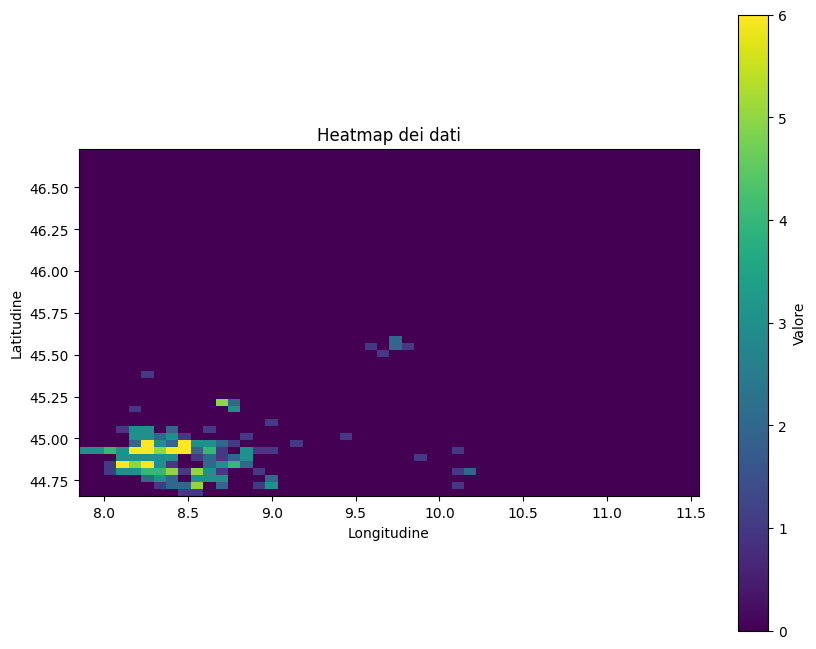

In [389]:
mappami('classificazione_calore_2021-2040.csv')

In [179]:
def classificazione(array):
    # Verifica se l'array è vuoto o non ha esattamente tre valori
    if len(array) != 3:
        return "nd"  # Valore non determinato
    
    while True:
        # Trova l'indice del massimo valore tra i tre
        indici_massimi = np.where(array == np.max(array))[0]

        # Gestisci i casi in cui ci sono più valori massimi
        if len(indici_massimi) == 1:
            # Se c'è un solo indice massimo
            indice_massimo = indici_massimi[0]
            break  # Esci dal ciclo while
        else:
            # Se ci sono più indici massimi, aggiungi valori casuali
            array += np.random.uniform(-0.01, 0.01, 3)
    # Determina la classificazione in base all'indice del massimo valore
    if indice_massimo == 0:
        return "basso"
    elif indice_massimo == 1:
        return "medio"
    else:
        return "alto"

In [ ]:
file_output.close()

In [122]:
valore=estrazione_dati(ds, dt, 'tasmax')

In [123]:
generic_trapezoid(soglia_tx01, 0.5,0.5,valore)

array([0., 1., 0.], dtype=float32)

In [ ]:
somma=np.array([0,0,0])
vect=np.array([1,2,3])

In [292]:
print(np.add(somma,vect))

[2 4 6]


In [245]:
print(ds)


<xarray.Dataset>
Dimensions:  (lon: 149, lat: 84)
Coordinates:
  * lon      (lon) float64 7.848 7.873 7.898 7.923 ... 11.47 11.5 11.52 11.55
  * lat      (lat) float64 44.65 44.68 44.7 44.73 ... 46.65 46.68 46.7 46.73
Data variables:
    tasmax   (lat, lon) float32 ...


Nomi delle variabili nel dataset:
lon
Bergamo
Brescia
Busto Arsizio
Cinisello
Cremona
Gallarate
Legnano
Mantova
Milano1
Milano2
Monza
Pavia
Rho
Sondrio
Vigevano
Lomello
Maniva
lat
Bergamo
Brescia
Busto Arsizio
Cinisello
Cremona
Gallarate
Legnano
Mantova
Milano1
Milano2
Monza
Pavia
Rho
Sondrio
Vigevano
Lomello
Maniva
tasmax
Bergamo
Brescia
Busto Arsizio
Cinisello
Cremona
Gallarate
Legnano
Mantova
Milano1
Milano2
Monza
Pavia
Rho
Sondrio
Vigevano
Lomello
Maniva


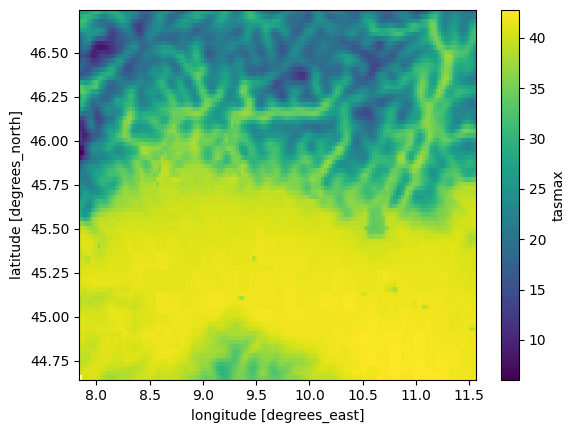

Nomi delle variabili nel dataset:
crs
Bergamo
Brescia
Busto Arsizio
Cinisello
Cremona
Gallarate
Legnano
Mantova
Milano1
Milano2
Monza
Pavia
Rho
Sondrio
Vigevano
Lomello
Maniva
longitude
Bergamo
Brescia
Busto Arsizio
Cinisello
Cremona
Gallarate
Legnano
Mantova
Milano1
Milano2
Monza
Pavia
Rho
Sondrio
Vigevano
Lomello
Maniva
latitude
Bergamo
Brescia
Busto Arsizio
Cinisello
Cremona
Gallarate
Legnano
Mantova
Milano1
Milano2
Monza
Pavia
Rho
Sondrio
Vigevano
Lomello
Maniva
layer
Bergamo
Brescia
Busto Arsizio
Cinisello
Cremona
Gallarate
Legnano
Mantova
Milano1
Milano2
Monza
Pavia
Rho
Sondrio
Vigevano
Lomello
Maniva


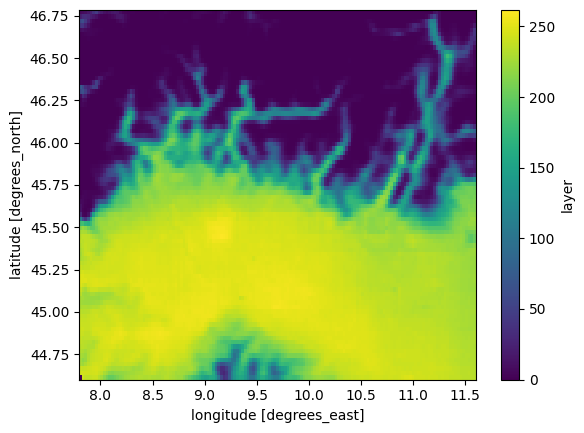

Nomi delle variabili nel dataset:
crs
Bergamo
Brescia
Busto Arsizio
Cinisello
Cremona
Gallarate
Legnano
Mantova
Milano1
Milano2
Monza
Pavia
Rho
Sondrio
Vigevano
Lomello
Maniva
longitude
Bergamo
Brescia
Busto Arsizio
Cinisello
Cremona
Gallarate
Legnano
Mantova
Milano1
Milano2
Monza
Pavia
Rho
Sondrio
Vigevano
Lomello
Maniva
latitude
Bergamo
Brescia
Busto Arsizio
Cinisello
Cremona
Gallarate
Legnano
Mantova
Milano1
Milano2
Monza
Pavia
Rho
Sondrio
Vigevano
Lomello
Maniva
layer
Bergamo
Brescia
Busto Arsizio
Cinisello
Cremona
Gallarate
Legnano
Mantova
Milano1
Milano2
Monza
Pavia
Rho
Sondrio
Vigevano
Lomello
Maniva


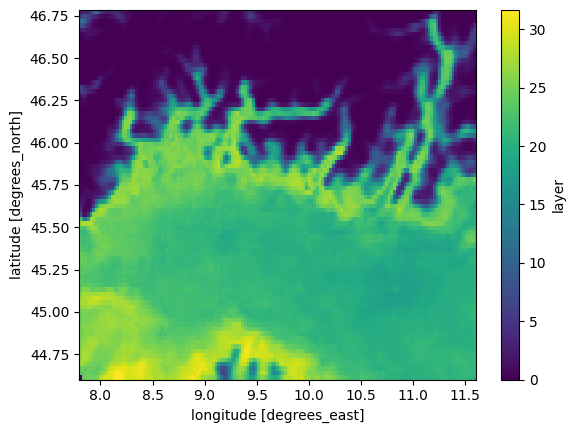

Nomi delle variabili nel dataset:
crs
Bergamo
Brescia
Busto Arsizio
Cinisello
Cremona
Gallarate
Legnano
Mantova
Milano1
Milano2
Monza
Pavia
Rho
Sondrio
Vigevano
Lomello
Maniva
longitude
Bergamo
Brescia
Busto Arsizio
Cinisello
Cremona
Gallarate
Legnano
Mantova
Milano1
Milano2
Monza
Pavia
Rho
Sondrio
Vigevano
Lomello
Maniva
latitude
Bergamo
Brescia
Busto Arsizio
Cinisello
Cremona
Gallarate
Legnano
Mantova
Milano1
Milano2
Monza
Pavia
Rho
Sondrio
Vigevano
Lomello
Maniva
layer
Bergamo
Brescia
Busto Arsizio
Cinisello
Cremona
Gallarate
Legnano
Mantova
Milano1
Milano2
Monza
Pavia
Rho
Sondrio
Vigevano
Lomello
Maniva


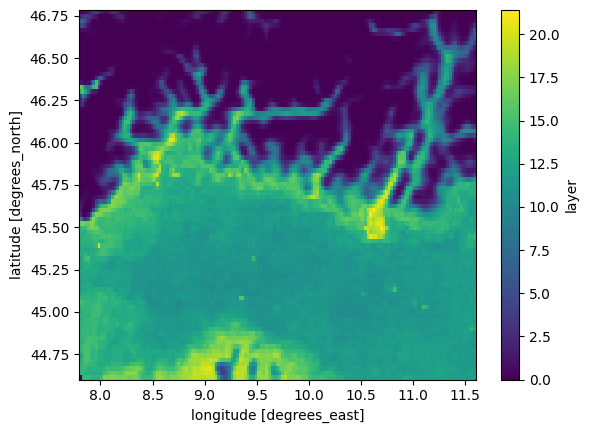

Nomi delle variabili nel dataset:
lon
Bergamo
Brescia
Busto Arsizio
Cinisello
Cremona
Gallarate
Legnano
Mantova
Milano1
Milano2
Monza
Pavia
Rho
Sondrio
Vigevano
Lomello
Maniva
lat
Bergamo
Brescia
Busto Arsizio
Cinisello
Cremona
Gallarate
Legnano
Mantova
Milano1
Milano2
Monza
Pavia
Rho
Sondrio
Vigevano
Lomello
Maniva
quantile
Bergamo
Brescia
Busto Arsizio
Cinisello
Cremona
Gallarate
Legnano
Mantova
Milano1
Milano2
Monza
Pavia
Rho
Sondrio
Vigevano
Lomello
Maniva
__xarray_dataarray_variable__
Bergamo
Brescia
Busto Arsizio
Cinisello
Cremona
Gallarate
Legnano
Mantova
Milano1
Milano2
Monza
Pavia
Rho
Sondrio
Vigevano
Lomello
Maniva


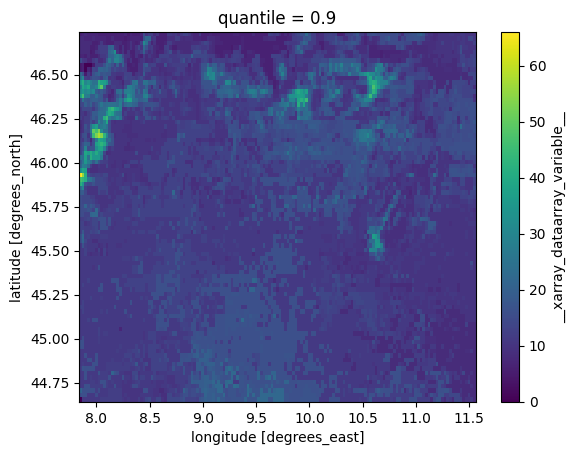

In [144]:
import matplotlib.pyplot as plt
for f in file_indici_stat:
    ds = xr.open_dataset(f)
     #Ottieni i nomi delle variabili
    nomi_variabili = ds.variables.keys()

    # Stampali
    print("Nomi delle variabili nel dataset:")
    for nome_variabile in nomi_variabili:
        print(nome_variabile)
        if nome_variabile=='tasmax':
            variabile='tasmax'
        elif nome_variabile=='layer':
            variabile='layer'
        elif nome_variabile=='__xarray_dataarray_variable__':
            variabile='__xarray_dataarray_variable__'
        elif nome_variabile=='lon':
            caso=1
        elif nome_variabile=='longitude':
            caso=2
    # Controllare se ci sono attributi 'long_name' per le coordinate di longitudine e latitudine
        for city, data in citta.items():
            print(city)
            if caso==1:
                nearest_point_data=  ds.sel(lat=slice(data['y_max'], data['y_min']), lon=slice(data['x_min'], data['x_max']))
            elif caso==2:
                nearest_point_data=  ds.sel(latitude=slice(data['y_max'], data['y_min']), longitude=slice(data['x_min'], data['x_max']))
            else:
                nearest_point_data=None
            if nearest_point_data is not None and not nearest_point_data.sizes!={}:
              try:
                max_val = nearest_point_data[variabile].max().values
                print(city, max_val)
              except:
                print("Errore durante il calcolo del massimo per", city)

    try:
        ds[variabile].plot()
        
    except:
        print("Errore")
    plt.show()
    ds.close()
    caso=0
    

In [50]:
data


{'y_min': 45.70393, 'y_max': 45.73204, 'x_min': 9.6554, 'x_max': 9.69482}

In [7]:
import math
import random as r

# generic_trapezoid

In [81]:
def generic_trapezoid(soglie,p_M,p_N,valore):
    # soglie contiene A,B,C valori che sono certamente 1
    # p_M,p_N valori di probabilità nei punti medi tra A-B e B-C
    # valore: valore di cui si vuole attribuire l'appartenenza, compreso tra A e C
    A=soglie[0]
    B=soglie[1]
    C=soglie[2]
    D=A*.7
    E=C/.7
    # definisco il dominio
    T = Domain("test", A, E, res=0.1)
    # il problema è dovuto alla scala diversa tra x ed y, quindi per prima cosa trasforma
    # il valore di x compreso tra 0 e 1 nel valore di y compreso tra A e B o tra B e C
    # nel caso si scelga per un valore random
    #xm,xn=r.random(),r.random()
    # la scelta standard è valore in mezzo tra A e B e tra B e C: questo semplifica l'interpretazione 
    xm=0.5
    xn=0.5
    # calcolo rampa down, xm qualunque
    alpha=math.atan(xm/(1-p_M))/2
    x1=xm-(1-p_M)*math.tan(alpha)
    x2=xm+p_M*math.tan(alpha)
    y1=x1*(B-A)+A
    y2=x2*(B-A)+A
    T.down = S(y1,y2)
    #T.down.plot()
    
    # calcolo ramo ascendente trapezoide
    beta=math.atan((1-xm)/(1-p_M))/2
    x4=xm+abs((1-p_M)*math.tan(beta))
    x3=xm-abs(p_M*math.tan(beta))
    y4=x4*(B-A)+A
    y3=x3*(B-A)+A
    # calcolo ramo discendente trapezoide: B=0;C=1
    alpha=math.atan(xn/(1-p_N))/2
    x5=xn-(1-p_N)*math.tan(alpha)
    x6=xn+p_N*math.tan(alpha)
    y5=x5*(C-B)+B
    y6=x6*(C-B)+B
    T.trapezoid=trapezoid(y3,y4,y5,y6,c_m=1)
    #T.trapezoid.plot()

    #calcolo rampa up: B=0,C=1
    gamma=math.atan((1-xn)/(1-p_N))/2
    x8=xn+abs((1-p_N)*math.tan(gamma))
    x7=xn-abs(p_N*math.tan(gamma))
    y7=x7*(C-B)+B
    y8=x8*(C-B)+B
    T.up=R(y7,y8)
    #T.up.plot()
    #print(f"valori--> {y1:.2f} {y2:.2f} {y3:.2f} {y4:.2f} {y5:.2f} {y6:.2f} {y7:.2f} {y8:.2f}")
    my_array=np.array([T.down(valore),T.trapezoid(valore),T.up(valore)], dtype=np.float32)
    return my_array

In [372]:
# modifica con sigmoide

In [485]:
def generic_trapezoid(soglie,p_M,p_N,valore):
    from fuzzylogic.functions import (sigmoid, gauss, trapezoid, 
                             triangular_sigmoid, rectangular)
    # questa versione modifica la trapezoide e la sostituisce con tre funzioni gaussiane. I valori di soglie sono quelli del massimo della gaussiana,
    # mentre i valori della dev.st sono dedotti dalle soglie
    # p_M,p_N i valori delle gaussiane: p_M è la prima e la terza, p_N è la seconda (media)
    # valore: valore di cui si vuole attribuire l'appartenenza, compreso tra A e C
    A=soglie[0]
    B=soglie[1]
    C=soglie[2]
    D=A*.7
    E=C/.7
    # definisco il dominio
    T = Domain("test", A, E, res=0.1)
   
    k=12/(A-B)
    k2=12/(B-C)
    T.sigmoid1 = sigmoid(1,k,(A+B)/2)
    
    if valore < B:
        T.sigmoid2=sigmoid(1,-k,(A+B)/2)
    else:
        T.sigmoid2=sigmoid(1,k2,(B+C)/2)
    T.sigmoid3=sigmoid(1,-k2,(B+C)/2)
    
    T.sigmoid1.plot()
    T.sigmoid2.plot()
    T.sigmoid3.plot()
    plt.axvline(x=valore, color='gray', linestyle='--', linewidth=1)
    plt.show()
    
    my_array=np.array([T.sigmoid1(valore),T.sigmoid2(valore),T.sigmoid3(valore)], dtype=np.float32)
    return my_array

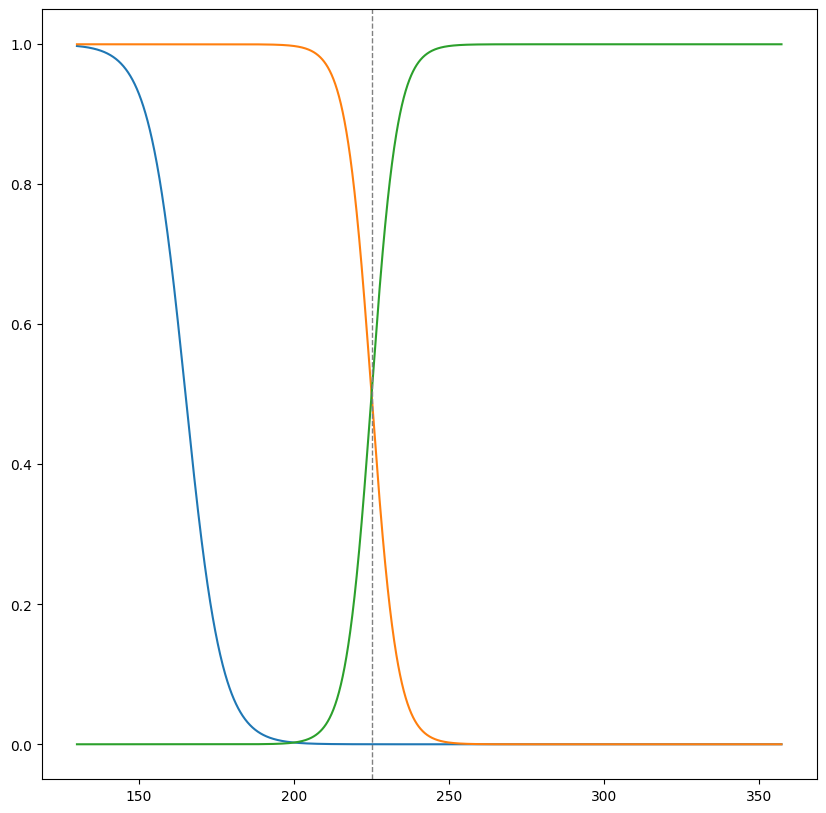

[3.4115852e-05 5.0000000e-01 5.0000000e-01]


In [486]:
print(generic_trapezoid([130,200,250],p_M,p_N,225))

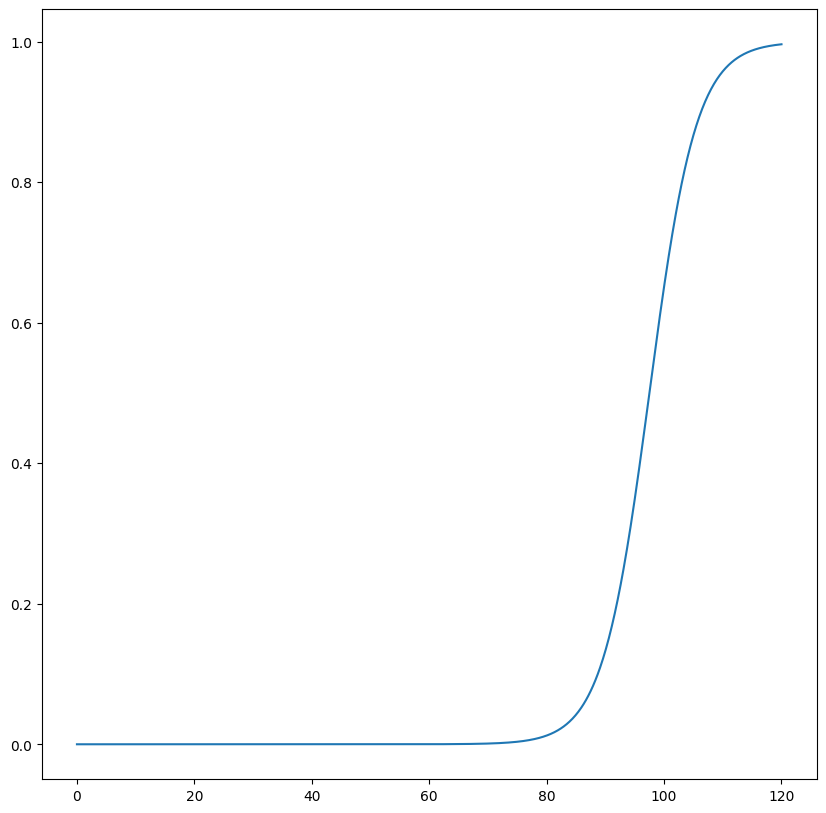

In [317]:
T = Domain("test", 0, 120, res=0.1)
T.sigmoid = sigmoid(1,.25,97.5)
T.sigmoid.plot()


In [454]:
import random
random.random() 

0.5101767186342907

# Precipitazioni_new
[torna all'indice](#Indice)

Principi generali:
- si tiene separata la siccità
- si guarda alla distribuzione di probabilità degli eventi estremi
- la siccità è fatta da SPI e CDD
- si utilizzano le funzioni sigmoidi

## siccità

In [483]:
def classifica_tutto_pr():
    import csv
    file_output = open('output_siccita.txt', 'w')
    # Apri il file in modalità di scrittura
    with open('classificazione_siccita_2041-2060.csv', mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Longitudine', 'Latitudine', 'Classificazione'])
    
        f=file_indici_stat_2041[0]
        ds=xr.open_dataset(f)
        ds_spi3=xr.open_dataset ( file_indici_stat_2041[1])
        ds_spi6=xr.open_dataset(file_indici_stat_2041[2])
        ds_anno=xr.open_dataset(file_indici_stat_2041[3])
        
        for lat in ds['latitude'].values:
            
            for lon in ds['longitude'].values:
                somma=np.array([0,0,0])   
                # Stampa il risultato o fai qualsiasi altra operazione desiderata
                print(f'Esame delle coordinate (lat, lon): {lat:.2f}, {lon:.2f}', end='\r' )
                file_output.write(f'Esame delle coordinate (lat, lon): {lat:.2f}, {lon:.2f}\n')
                eps=0.02
                y_min = lat - eps
                y_max = lat + eps
                x_min = lon-eps
                x_max = lon+eps
                dt={"y_min": y_min, "y_max": y_max, "x_min": x_min, "x_max": x_max}
                #print("Nel box ",dt)
                valore=estrazione_dati(ds, dt, 'layer')
                
                # Applica la funzione CDD al valore
                result = generic_trapezoid(soglia_cdd, 0.05,0.05,valore)
                somma=np.add(somma,result)
                #print(f"TX01 {valore}  - Membership array: {result}")
                file_output.write(f"CDD {valore}  - Membership array: {result}\n")
                
                #Seleziono il valore per SPI3
                valore=estrazione_dati(ds_spi3,dt,'__xarray_dataarray_variable__')
                result = generic_trapezoid(soglia_spi3, 0.05,0.05,valore*100)
                somma=np.add(somma,result)
                #print(f"CDDs  {valore} - Membership array: {result}")
                file_output.write(f"SPI3  {valore} - Membership array: {result}\n")
                #Seleziono il valore per SPI6
                valore=estrazione_dati(ds_spi6,dt,'__xarray_dataarray_variable__')
                result = generic_trapezoid(soglia_spi6, 0.05,0.05,valore*100)
                somma=np.add(somma,result)
                #print(f"TR  {valore} - Membership array: {result}")
                file_output.write(f"SPI6  {valore} - Membership array: {result}\n")
                
                #Seleziono il valore per PRCPTOT anno
                valore=estrazione_dati(ds_anno,dt,'layer')
                result = generic_trapezoid(soglia_aut, 0.05,0.05,valore)
                somma=np.add(somma,result)
                #print(f"SU30  {valore} - Membership array: {result}")
                file_output.write(f"PRCPTOT anno  {valore} - Membership array: {result}\n")
                
               
                #print(f"Punteggio complessivo: {somma}")
                # Trova l'indice del massimo valore tra i tre
                classifica=classificazione(somma)
                writer.writerow([lon, lat, classifica])
                file_output.write(f"--------------> {somma} --> {classifica}\n")
                if classifica =="nd":
                     risposta = input(f"Valore {classifica} per: {somma} ")
                    
    file_output.close()
    print()
    print("ELABORAZIONE TERMINATA!")

definizione dei file da considerare

In [428]:
# va modificato in funzione dei file che si vogliono considerare
file_indici_stat_2041=['./Indici_2023/PNACC_2023/rasters/ARCIS/CDD/Anomalia_del_numero_massimo_di_giorni_consecutivi_secchi_CDD_20412060_rispetto_a_19962015__rcp85.nc',
                  './Indici_2023/PNACC_2023/rasters/ARCIS/SPI3/SPI3_ensemble_rcp8.5_2041-2060_BASD_ARCIS_dry.nc',
                  './Indici_2023/PNACC_2023/rasters/ARCIS/SPI6/SPI6_ensemble_rcp8.5_2041-2060_BASD_ARCIS_dry.nc',
                  './Indici_2023/PNACC_2023/rasters/ARCIS/PRCPTOT/autunno/Anomalia_pct_precipitazione_totale_nei_giorni_umidi_PRCPTOT_20412060_rispetto_a_19962015__rcp85__autunno.nc',
                  './Indici_2023/PNACC_2023/rasters/ARCIS/PRCPTOT/estate/Anomalia_pct_precipitazione_totale_nei_giorni_umidi_PRCPTOT_20412060_rispetto_a_19962015__rcp85__estate.nc',
                  './Indici_2023/PNACC_2023/rasters/ARCIS/PRCPTOT/primavera/Anomalia_pct_precipitazione_totale_nei_giorni_umidi_PRCPTOT_20412060_rispetto_a_19962015__rcp85__primavera.nc',
                  './Indici_2023/PNACC_2023/rasters/ARCIS/PRCPTOT/inverno/Anomalia_pct_precipitazione_totale_nei_giorni_umidi_PRCPTOT_20412060_rispetto_a_19962015__rcp85__inverno.nc'
                  ]

In [476]:
# va modificato in funzione dei file che si vogliono considerare
file_indici_stat_2041=['./Indici_2023/PNACC_2023/rasters/ARCIS/CDD/Anomalia_del_numero_massimo_di_giorni_consecutivi_secchi_CDD_20412060_rispetto_a_19962015__rcp85.nc',
                  './Indici_2023/PNACC_2023/rasters/ARCIS/SPI3/SPI3_ensemble_rcp8.5_2041-2060_BASD_ARCIS_dry.nc',
                  './Indici_2023/PNACC_2023/rasters/ARCIS/SPI6/SPI6_ensemble_rcp8.5_2041-2060_BASD_ARCIS_dry.nc',
                './Indici_2023/PNACC_2023/rasters/ARCIS/PRCPTOT/anno/Anomalia_pct_precipitazione_totale_nei_giorni_umidi_PRCPTOT_20412060_rispetto_a_19962015__rcp85__anno.nc'
                 ]

*Problema*  
per spi3 va creato l'ensemble in quanto ci sono solo i file singoli

In [422]:
base_dir='/storage/Indici_2023/PNACC_2023/rasters/ARCIS/SPI6/'
base_file=[
    'CLMcom_CCLM4-8-17_EC-EARTH_',
    'CLMcom_CCLM4-8-17_MPI-ESM-LR_', 
    'DMI_HIRHAM5_EC-EARTH_',
    'GERICS_REMO2015_NorESM1-M_',
    'KNMI_RACMO22E_HadGEM2-ES_',
    'MPI-CSC_REMO2009_MPI-ESM-LR_',
    'SMHI_RCA4_HadGEM2-ES_',
    'SMHI_RCA4_MPI-ESM-LR_'
]
scenari=['rcp2.6_','rcp4.5_','rcp8.5_']
periodi=['2021-2040_','2041-2060_']

Scenario rcp2.6_ nel periodo 2021-2040_


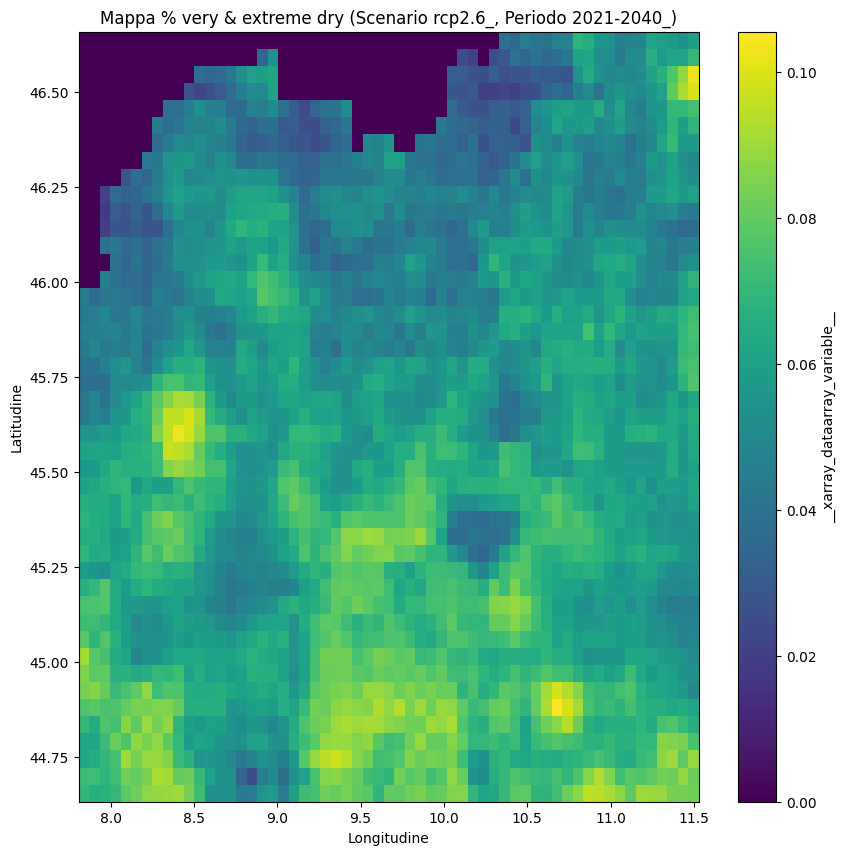

<xarray.Dataset>
Dimensions:  (lon: 59, lat: 45, time: 240)
Coordinates:
  * lon      (lon) float64 7.841 7.904 7.967 8.03 ... 11.31 11.37 11.43 11.5
  * lat      (lat) float64 44.66 44.7 44.74 44.79 ... 46.5 46.55 46.59 46.63
  * time     (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2040-12-01
Data variables:
    SPI6     (time, lat, lon) float64 dask.array<chunksize=(240, 45, 59), meta=np.ndarray>
Scenario rcp4.5_ nel periodo 2021-2040_


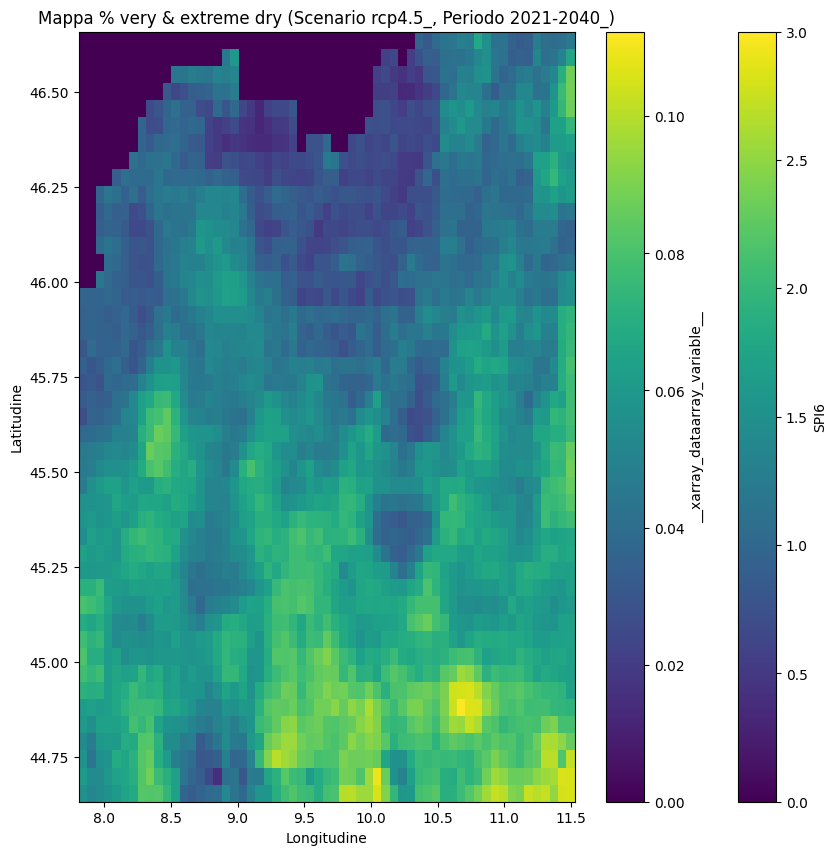

<xarray.Dataset>
Dimensions:  (lon: 59, lat: 45, time: 240)
Coordinates:
  * lon      (lon) float64 7.841 7.904 7.967 8.03 ... 11.31 11.37 11.43 11.5
  * lat      (lat) float64 44.66 44.7 44.74 44.79 ... 46.5 46.55 46.59 46.63
  * time     (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2040-12-01
Data variables:
    SPI6     (time, lat, lon) float64 dask.array<chunksize=(240, 45, 59), meta=np.ndarray>
Scenario rcp8.5_ nel periodo 2021-2040_


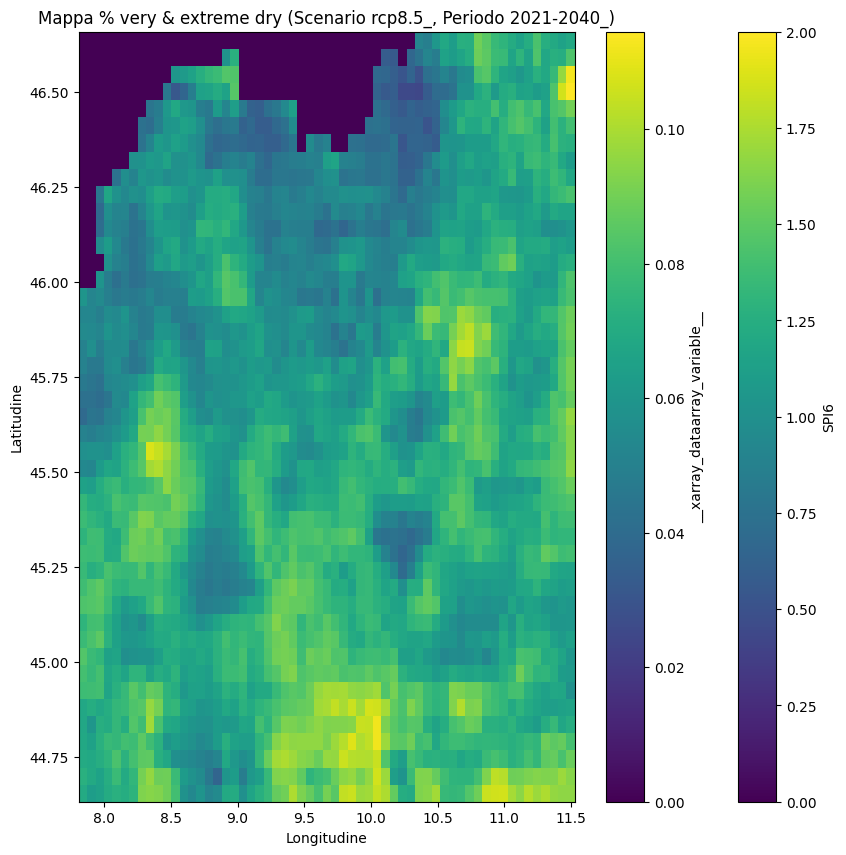

<xarray.Dataset>
Dimensions:  (lon: 59, lat: 45, time: 240)
Coordinates:
  * lon      (lon) float64 7.841 7.904 7.967 8.03 ... 11.31 11.37 11.43 11.5
  * lat      (lat) float64 44.66 44.7 44.74 44.79 ... 46.5 46.55 46.59 46.63
  * time     (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2040-12-01
Data variables:
    SPI6     (time, lat, lon) float64 dask.array<chunksize=(240, 45, 59), meta=np.ndarray>
Scenario rcp2.6_ nel periodo 2041-2060_


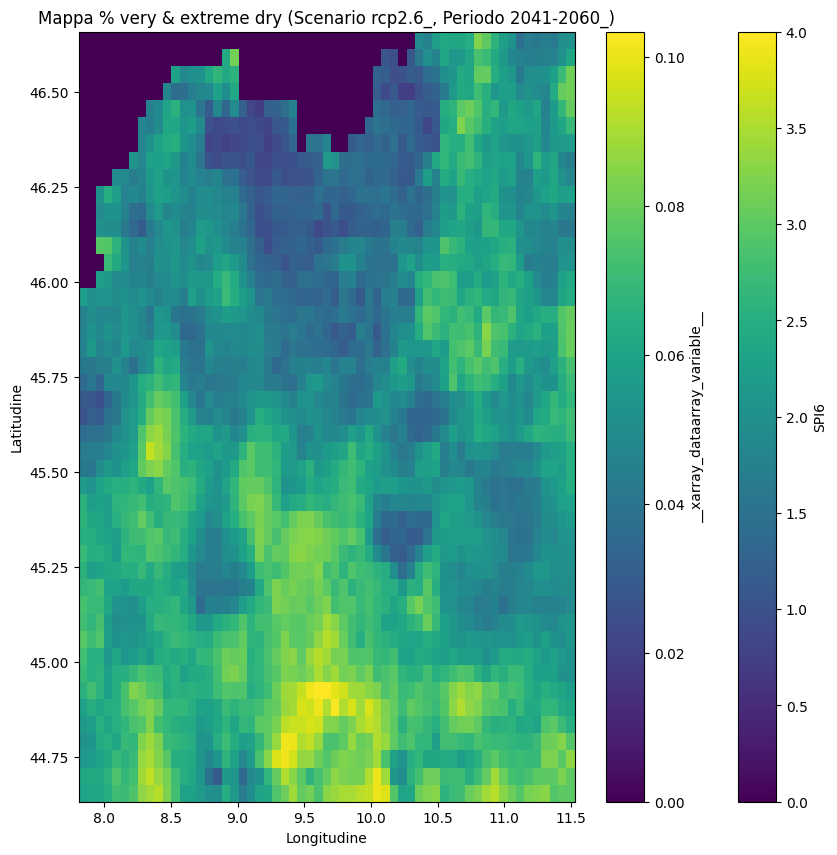

<xarray.Dataset>
Dimensions:  (lon: 59, lat: 45, time: 240)
Coordinates:
  * lon      (lon) float64 7.841 7.904 7.967 8.03 ... 11.31 11.37 11.43 11.5
  * lat      (lat) float64 44.66 44.7 44.74 44.79 ... 46.5 46.55 46.59 46.63
  * time     (time) datetime64[ns] 2041-01-01 2041-02-01 ... 2060-12-01
Data variables:
    SPI6     (time, lat, lon) float64 dask.array<chunksize=(240, 45, 59), meta=np.ndarray>
Scenario rcp4.5_ nel periodo 2041-2060_


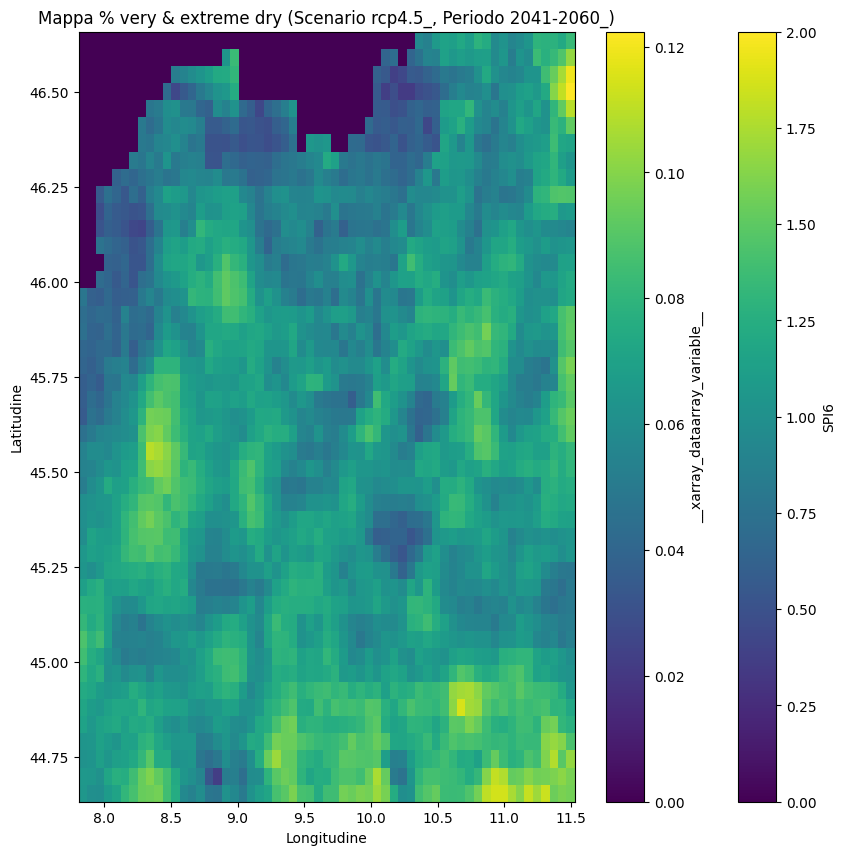

<xarray.Dataset>
Dimensions:  (lon: 59, lat: 45, time: 240)
Coordinates:
  * lon      (lon) float64 7.841 7.904 7.967 8.03 ... 11.31 11.37 11.43 11.5
  * lat      (lat) float64 44.66 44.7 44.74 44.79 ... 46.5 46.55 46.59 46.63
  * time     (time) datetime64[ns] 2041-01-01 2041-02-01 ... 2060-12-01
Data variables:
    SPI6     (time, lat, lon) float64 dask.array<chunksize=(240, 45, 59), meta=np.ndarray>
Scenario rcp8.5_ nel periodo 2041-2060_


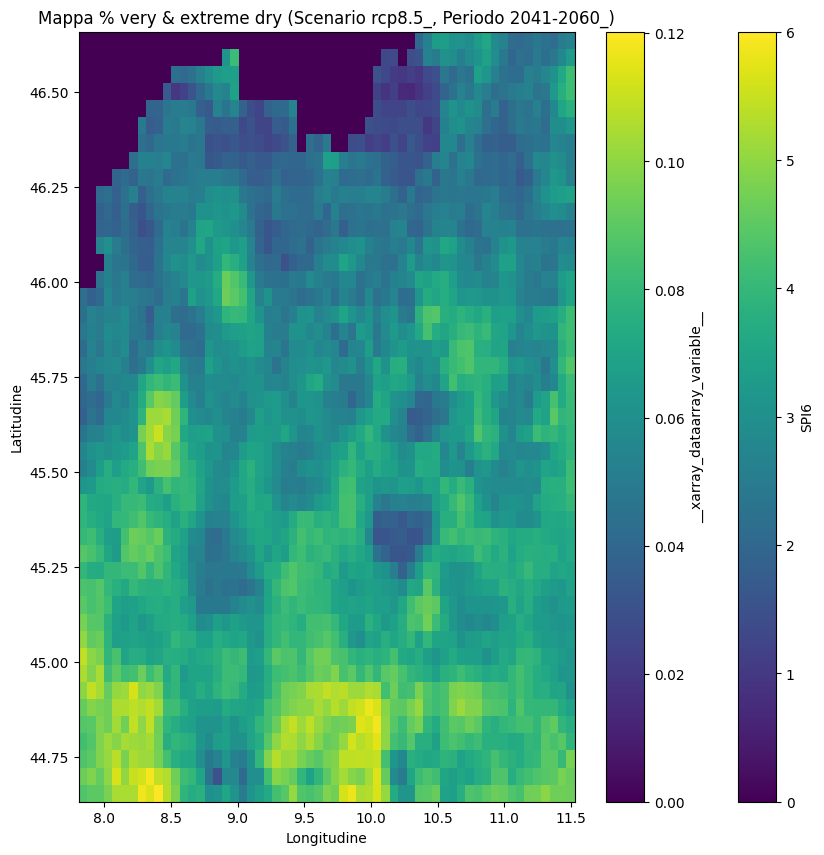

<xarray.Dataset>
Dimensions:  (lon: 59, lat: 45, time: 240)
Coordinates:
  * lon      (lon) float64 7.841 7.904 7.967 8.03 ... 11.31 11.37 11.43 11.5
  * lat      (lat) float64 44.66 44.7 44.74 44.79 ... 46.5 46.55 46.59 46.63
  * time     (time) datetime64[ns] 2041-01-01 2041-02-01 ... 2060-12-01
Data variables:
    SPI6     (time, lat, lon) float64 dask.array<chunksize=(240, 45, 59), meta=np.ndarray>


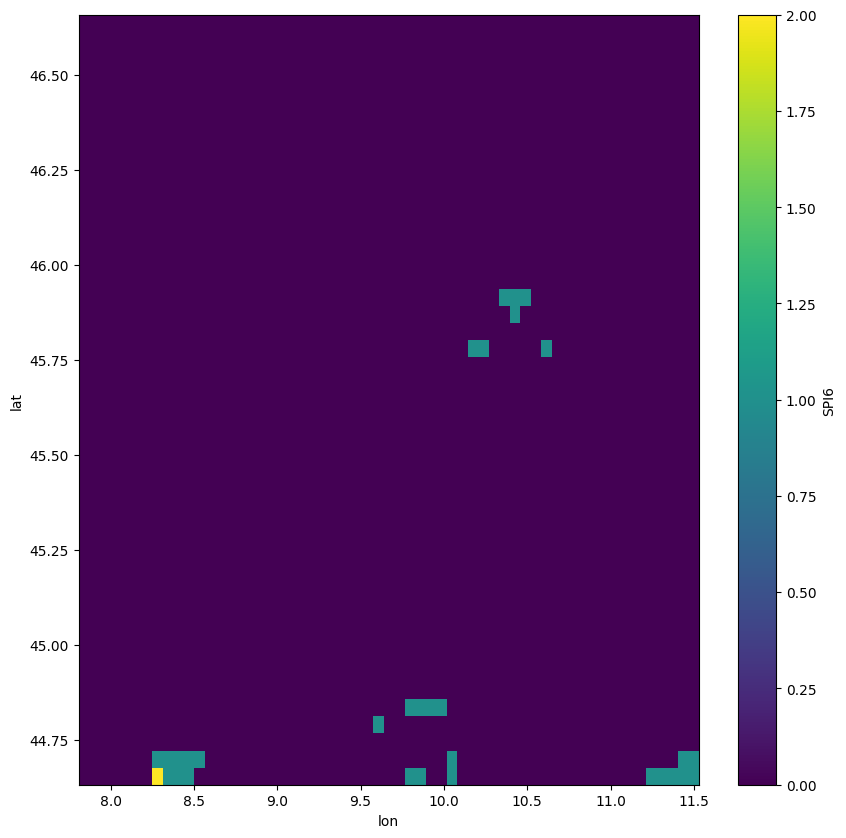

In [424]:
from matplotlib.colors import ListedColormap,BoundaryNorm
variable='__xarray_dataarray_variable__'
colors = ['red','orange','yellow','thistle','plum',  'purple'  ]
bounds = [-2, -1.5, -1, 1, 1.5, 2]
cmap_custom = ListedColormap(colors)
norm = BoundaryNorm(bounds, len(colors)-1)
for p in periodi:
    for s in scenari:
        datasets=[]
        count_dry = None
        for f in base_file:
            filein=base_dir+f+s+p+'BASD_ARCIS_SPI6.nc4'
            """
            if os.path.exists(filein):
                print(filein, True)
            else:
                print(f" il file: {filein} non esiste")
            """
            ds = xr.open_dataset(filein)
            current_count_dry = (ds[variable] < -1.5).sum(dim='time')
            
            # Aggiungo il conteggio corrente a count_dry
            if count_dry is None:
                count_dry = current_count_dry
            else:
                count_dry += current_count_dry
            
            #ds_mean=ds[variable].min(dim='time')
            #ds_mean.plot(cmap=cmap_custom, norm=norm)
            cc=count_dry/(237*8)
            
           # wsdi=ds[variable]
               
            datasets.append(filein)
            
        #print (datasets)
        
        print(f"Scenario {s} nel periodo {p}")
        # Carica i dati in un ensemble usando xarray
        cc.plot()
        plt.title(f'Mappa % very & extreme dry (Scenario {s}, Periodo {p})')
        plt.xlabel('Longitudine')
        plt.ylabel('Latitudine')
        plt.show()
        #cc = cc.rename_vars({variabile: '% very & extremely dry'})
        ds_ensemble = xr.open_mfdataset(datasets, combine='nested', concat_dim='realization')
        
        ensemble_mean = ds_ensemble.mean(dim='realization')
        ensemble_mean = ensemble_mean.rename_vars({variabile: 'SPI6'})
        fileout=base_dir+'SPI6_ensemble_'+s+p+'BASD_ARCIS_all.nc'
        print(ensemble_mean)
        count_dry = (ensemble_mean['SPI6'] < -1.5).sum(dim='time')
        ensemble_mean_time = ensemble_mean.min(dim='time')
        ensemble_mean.to_netcdf(fileout)
        fileout=base_dir+'SPI6_ensemble_'+s+p+'BASD_ARCIS_dry.nc'
        count_dry.plot()
        
        cc.to_netcdf(fileout)

In [460]:
# stabilisco le soglie, tante quanti sono gli indicatori
soglia_cdd=np.array([2,4,6], dtype=np.float32)
# le soglie sono in % mentre i valori sono tra 0 e 1; nella procedura si moltiplica il valore per 100
soglia_spi3=np.array([4,7,10],dtype=np.float32)
soglia_spi6=np.array([3,6,9],dtype=np.float32)
#da verificare le soglie negative, si inverte il ragionamento
#inserita inversione di p
soglia_aut=np.array([-10,-7.5,-1],dtype=np.float32)
soglia_est=np.array([-10,-7.5,-1],dtype=np.float32)
soglia_pri=np.array([-10,-7.5,-1],dtype=np.float32)
soglia_inv=np.array([-10,-7.5,-1],dtype=np.float32)

In [477]:
def cicla_citta_pr(file_indici_stat):
    somme_cumulative={}
    for city, data in citta.items():
        valori_per_citta = []
        for f in file_indici_stat:
            print(f)
            ds = xr.open_dataset(f)
            
        
            if city not in somme_cumulative:
                    somme_cumulative[city] = np.zeros(3)
            # Determina quale variabile usare
            variabile = None
            if 'tasmax' in ds.variables:
                variabile = 'tasmax'
            elif 'layer' in ds.variables:
                variabile = 'layer'
            elif '__xarray_dataarray_variable__' in ds.variables:
                variabile = '__xarray_dataarray_variable__'
                
            if variabile:
                # Seleziona le coordinate appropriate
                if 'lon' in ds.variables and 'lat' in ds.variables:
                    lon = 'lon'
                    lat = 'lat'
                elif 'longitude' in ds.variables and 'latitude' in ds.variables:
                    lon = 'longitude'
                    lat = 'latitude'
                else:
                    print("Coordinate di longitudine e/o latitudine non trovate nel dataset")
                    continue  # Passa alla prossima città
                    
                # Esegui l'estrazione dei dati
                eps=0.02
                y_min = data['y_min'] - eps
                y_max = data['y_max'] + eps
                x_min = data['x_min']-eps
                x_max = data['x_max']+eps
                dt={"y_min": y_min, "y_max": y_max, "x_min": x_min, "x_max": x_max}
                valore=estrazione_dati(ds, dt, variabile)
                print(f"Valore di {variabile} per {city}: {valore}")
                try:
                    indice_index = f.index('CDD')
                    p=generic_trapezoid(soglia_cdd, 0.05,.05,valore)    
                except ValueError:
                    indice_index = None
                try:
                    indice_index = f.index('SPI3')
                    p=generic_trapezoid(soglia_spi3, 0.05,.05, valore*100)    
                except ValueError:
                    indice_index = None
                try:
                    indice_index = f.index('SPI6')
                    p=generic_trapezoid(soglia_spi6, 0.05,.05, valore*100)    
                except ValueError:
                    indice_index = None
                try:
                    indice_index = f.index('anno')
                    p=generic_trapezoid(soglia_aut, 0.05,.05, valore)
                    p_invertito = [p[2], p[1], p[0]]
                    p=p_invertito
                except ValueError:
                    indice_index = None
                """
                try:
                    indice_index = f.index('autunno')
                    p=generic_trapezoid(soglia_aut, 0.05,.05, valore)
                    p_invertito = [p[2], p[1], p[0]]
                    p=p_invertito
                except ValueError:
                    indice_index = None
                try:
                    indice_index = f.index('estate')
                    p=generic_trapezoid(soglia_est, 0.05,.05, valore)
                    p_invertito = [p[2], p[1], p[0]]
                    p=p_invertito  
                except ValueError:
                    indice_index = None
                try:
                    indice_index = f.index('primavera')
                    p=generic_trapezoid(soglia_pri, 0.05,.05, valore)
                    p_invertito = [p[2], p[1], p[0]]
                    p=p_invertito  
                except ValueError:
                    indice_index = None
                try:
                    indice_index = f.index('inverno')
                    p=generic_trapezoid(soglia_inv, 0.05,.05, valore)
                    p_invertito = [p[2], p[1], p[0]]
                    p=p_invertito  
                except ValueError:
                    indice_index = None
                """
                formatted_p = [f"{val:.2f}" for val in p]
                print(city,end=' ')
                print("Punteggio:", ", ".join(formatted_p))    
                #print(f"Punteggio: {p:.2f}")
                somme_cumulative[city] += p
                valori_per_citta.append(valore)
            else:
                print("Variabile non trovata nel dataset")
        # Calcola i percentili 25, 50 e 75 dei valori estratti
        percentile_25 = np.percentile(valori_per_citta, 5)
        percentile_50 = np.percentile(valori_per_citta, 50)
        percentile_75 = np.percentile(valori_per_citta, 95)
        
        print("Percentile 25:", percentile_25)
        print("Percentile 50:", percentile_50)
        print("Percentile 75:", percentile_75)   
        """
        #interruzione ciclo
        risposta = input("Vuoi fare un altro ciclo? (sì/no): ")
    
        # Se l'utente non vuole fare un altro ciclo, esci dal loop
       
        if risposta.lower() != 'sì':
            #classifica_tutto()
            break
        """
    # Stampare il dizionario con le somme cumulative per ogni città
    print("Somme cumulative per città:")
    for city, somma_cumulativa in somme_cumulative.items():
        formatted_p = [f"{val:.2f}" for val in somma_cumulativa]
        print(city,end=' ')
        print("Punteggio:", ", ".join(formatted_p))    
        #print(f"{city}: {somma_cumulativa:.2f}")
        classifica=classificazione(somma_cumulativa)
        
        print(f"Classificazione: {classifica}")

In [478]:
cicla_citta_pr(file_indici_stat_2041)

./Indici_2023/PNACC_2023/rasters/ARCIS/CDD/Anomalia_del_numero_massimo_di_giorni_consecutivi_secchi_CDD_20412060_rispetto_a_19962015__rcp85.nc
Valore di layer per Bergamo: 0.9125000238418579
Bergamo Punteggio: 1.00, 0.00, 0.00
./Indici_2023/PNACC_2023/rasters/ARCIS/SPI3/SPI3_ensemble_rcp8.5_2041-2060_BASD_ARCIS_dry.nc
Valore di __xarray_dataarray_variable__ per Bergamo: 0.06962025316455696
Bergamo Punteggio: 0.00, 1.00, 0.00
./Indici_2023/PNACC_2023/rasters/ARCIS/SPI6/SPI6_ensemble_rcp8.5_2041-2060_BASD_ARCIS_dry.nc
Valore di __xarray_dataarray_variable__ per Bergamo: 0.05590717299578059
Bergamo Punteggio: 0.01, 0.99, 0.00
./Indici_2023/PNACC_2023/rasters/ARCIS/PRCPTOT/anno/Anomalia_pct_precipitazione_totale_nei_giorni_umidi_PRCPTOT_20412060_rispetto_a_19962015__rcp85__anno.nc
Valore di layer per Bergamo: -5.670991897583008
Bergamo Punteggio: 0.07, 0.93, 0.00
Percentile 25: -4.81195703699619
Percentile 50: 0.06276371308016877
Percentile 75: 0.7860680582402625
./Indici_2023/PNACC_2023/r

In [484]:
classifica_tutto_pr()

Esame delle coordinate (lat, lon): 44.62, 11.52
ELABORAZIONE TERMINATA!


In [436]:
dt

{'y_min': 45.254549999999995,
 'y_max': 45.45455,
 'x_min': 8.098298000000002,
 'x_max': 8.298298}

## precipitazione

**Principi generali:**  
~~Si tiene separata la siccità~~  
si guarda alla PDF data dalla funzione $\Gamma$  
Si usano le sigmoidi  

**pseudocode**  
apro i dataset  R20, RX1DAY  
apro il dataset del periodo di riferimento per R20 e RX1DAY  
calcolo $\mu$ e $\theta$  
il valore è dato da:
- aumento del valore R20 (decidere se la $\mu$ o la $\theta$ della $\Gamma$), ovvero: la PDF cambia a favore di eventi estremi (poco, abbastanza, molto)?
- aumento del valore R1XDAY (decidere se la $\mu$ o la $\theta$ della $\Gamma$), ovvero: la PDF cambia a favore di eventi estremi (poco, abbastanza, molto)?

Calcolo statistiche pr: devo considerare la statistica di precipitazione sull'intero periodo. Per la precipitazione giornaliera calcolo tutto, per la precipitazione intensa (R20) filtro sui giorni con almeno 20mm.  
La procedura è la stessa, i file sono gli stessi, cambiano i 2 periodi.  
Considero 4.5 e 8.5 o uno solo? Prima dovrei vedere qual è la situazione peggiore...

**Caso 2021-2040**  
NB: il file dei dati è unico

carico i file delle precipitazioni con i dati giornalieri: tengo separati gli 8 modelli per avere più statistica (oppure per ccalcolare l'ensemble e poi fare il calcolo sull'ensemble)

In [2]:
# va modificato in funzione dei file che si vogliono considerare
file_indici=['./Indici_2023/PNACC_2023/ARCIS_data/ARCIS_GG_1961-2015_LOMB.nc',
                  './Indici_2023/PNACC_2023/CLMcom_CCLM4-8-17_EC-EARTH/CLMcom_CCLM4-8-17_EC-EARTH_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4',
                  './Indici_2023/PNACC_2023/CLMcom_CCLM4-8-17_MPI-ESM-LR/CLMcom_CCLM4-8-17_MPI-ESM-LR_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4',
                  './Indici_2023/PNACC_2023/DMI_HIRHAM5_EC-EARTH/DMI_HIRHAM5_EC-EARTH_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4',
                  './Indici_2023/PNACC_2023/GERICS_REMO2015_NorESM1-M/GERICS_REMO2015_NorESM1-M_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4',
                  './Indici_2023/PNACC_2023/KNMI_RACMO22E_HadGEM2-ES/KNMI_RACMO22E_HadGEM2-ES_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4',
                  './Indici_2023/PNACC_2023/MPI-CSC_REMO2009_MPI-ESM-LR/MPI-CSC_REMO2009_MPI-ESM-LR_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4',
                  './Indici_2023/PNACC_2023/SMHI_RCA4_HadGEM2-ES/SMHI_RCA4_HadGEM2-ES_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4',
                  './Indici_2023/PNACC_2023/SMHI_RCA4_MPI-ESM-LR/SMHI_RCA4_MPI-ESM-LR_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4'
                  ]

In [3]:
for f in file_indici:
    print(f)
    ds = xr.open_dataset(f)

./Indici_2023/PNACC_2023/ARCIS_data/ARCIS_GG_1961-2015_LOMB.nc
./Indici_2023/PNACC_2023/CLMcom_CCLM4-8-17_EC-EARTH/CLMcom_CCLM4-8-17_EC-EARTH_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4
./Indici_2023/PNACC_2023/CLMcom_CCLM4-8-17_MPI-ESM-LR/CLMcom_CCLM4-8-17_MPI-ESM-LR_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4
./Indici_2023/PNACC_2023/DMI_HIRHAM5_EC-EARTH/DMI_HIRHAM5_EC-EARTH_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4
./Indici_2023/PNACC_2023/GERICS_REMO2015_NorESM1-M/GERICS_REMO2015_NorESM1-M_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4
./Indici_2023/PNACC_2023/KNMI_RACMO22E_HadGEM2-ES/KNMI_RACMO22E_HadGEM2-ES_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4
./Indici_2023/PNACC_2023/MPI-CSC_REMO2009_MPI-ESM-LR/MPI-CSC_REMO2009_MPI-ESM-LR_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4
./Indici_2023/PNACC_2023/SMHI_RCA4_HadGEM2-ES/SMHI_RCA4_HadGEM2-ES_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4
./Indici_2023/PNACC_2023/SMHI_RCA4_MPI-ESM-LR/SMHI_RCA4_MPI-ESM-LR_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4


10956
10956
[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 ...

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... Fal

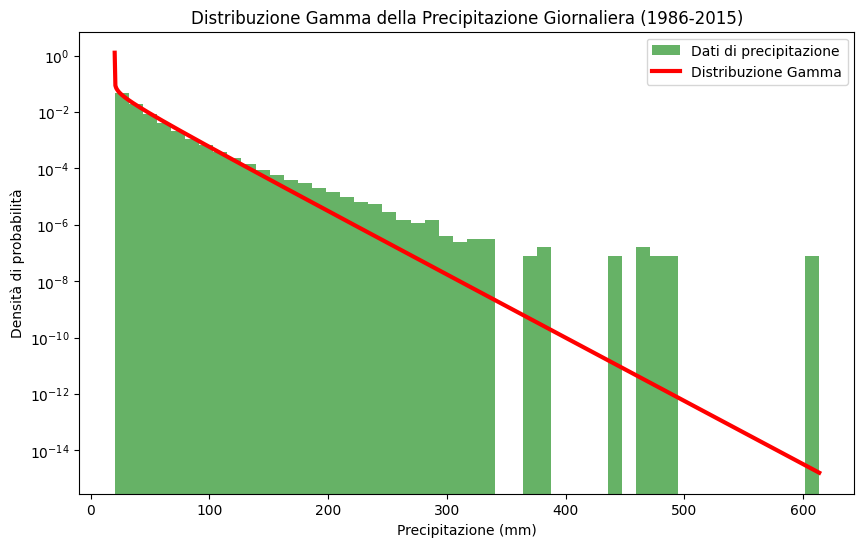

In [58]:
import xarray as xr
import numpy as np
from scipy.stats import gengamma
import pandas as pd

# Apri il file NetCDF usando xarray
file_path = file_indici[0]
ds = xr.open_dataset(file_path)

# Assumendo che i dati di precipitazione siano in una variabile chiamata 'precipitation'
variable='rr'
precipitation = ds[variable]
precipitation_to_go=[]
# Convertire il tempo in date utilizzando xarray e pandas
dates = pd.to_datetime(precipitation['time'].values)

# Filtrare i dati per il periodo 1986-2015
mask = (dates >= '1986-01-01') & (dates <= '2015-12-31')
precipitation_filtered = precipitation.sel(time=mask)

# Assumendo che i dati di precipitazione siano in mm/giorno
# Filtrare per i valori maggiori di zero per la distribuzione Gamma
precipitation_to_go = precipitation_filtered.values
print(len(precipitation_to_go))
precipitation_positive_nan = np.where(precipitation_to_go > 20, precipitation_to_go, np.nan)
print(len(precipitation_positive_nan))

# Trova gli indici dei valori non NaN in precipitation_positive_nan
indici_non_nan = ~np.isnan(precipitation_positive_nan)
print((indici_non_nan))
# Seleziona solo i valori non NaN utilizzando gli indici trovati
precipitation_positive = precipitation_positive_nan[indici_non_nan]
Num=np.sum(indici_non_nan)
print(Num,len(precipitation_positive))

# Calcolare i parametri della distribuzione Gamma
params_gengamma = gengamma.fit(precipitation_positive)

print(f'Generalized Gamma Fit:\nParams: {params_gengamma}')
# Plot della distribuzione
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Istogramma dei dati di precipitazione giornaliera
ax.hist(precipitation_positive, bins=50, density=True, alpha=0.6, color='g', label='Dati di precipitazione')

# Valori della distribuzione gamma
x = np.linspace(precipitation_positive.min(), precipitation_positive.max(), 1000)
pdf_fitted = gengamma.pdf(x, *params_gengamma)

# Plot della distribuzione Gamma
ax.plot(x, pdf_fitted, 'r-', lw=3, label='Distribuzione Gamma')
ax.set_title('Distribuzione Gamma della Precipitazione Giornaliera (1986-2015)')
ax.set_xlabel('Precipitazione (mm)')
ax.set_ylabel('Densità di probabilità')
ax.set_yscale('log')  # Imposta la scala y come logaritmica
ax.legend()

plt.show()

# Chiudi il dataset
ds.close()


Cella lat=0, lon=0
Cella lat=0, lon=1
Cella lat=0, lon=2
Cella lat=0, lon=3
Cella lat=0, lon=4
Cella lat=0, lon=5
  Media, varianza, N, P(80): 7.108818412871836 120.31138850970049 2538 0.0015626789360524418


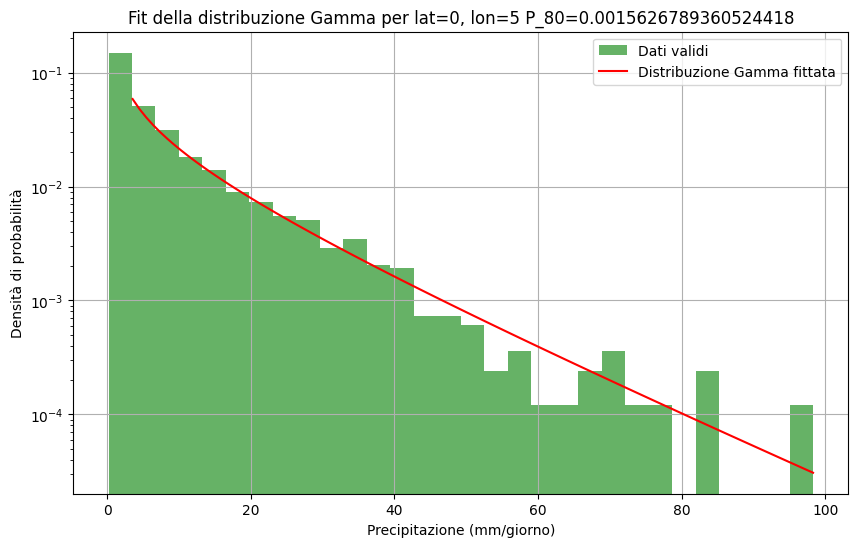

Cella lat=0, lon=6
Cella lat=0, lon=7
Cella lat=0, lon=8
Cella lat=0, lon=9
Cella lat=0, lon=10
Cella lat=0, lon=11
Cella lat=0, lon=12
Cella lat=0, lon=13
Cella lat=0, lon=14
Cella lat=0, lon=15
Cella lat=0, lon=16
Cella lat=0, lon=17
Cella lat=0, lon=18
Cella lat=0, lon=19
Cella lat=0, lon=20
Cella lat=0, lon=21
Cella lat=0, lon=22
Cella lat=0, lon=23
Cella lat=0, lon=24
Cella lat=0, lon=25
Cella lat=0, lon=26
Cella lat=0, lon=27
Cella lat=0, lon=28
Cella lat=0, lon=29
Cella lat=0, lon=30
Cella lat=0, lon=31
Cella lat=0, lon=32
Cella lat=0, lon=33
Cella lat=0, lon=34
Cella lat=0, lon=35
Cella lat=0, lon=36
Cella lat=0, lon=37
Cella lat=0, lon=38
Cella lat=0, lon=39
Cella lat=0, lon=40
Cella lat=0, lon=41
Cella lat=0, lon=42
Cella lat=0, lon=43
Cella lat=0, lon=44
Cella lat=0, lon=45
  Media, varianza, N, P(80): 5.430959002187623 42.592475400959955 3227 1.3864878026570437e-05


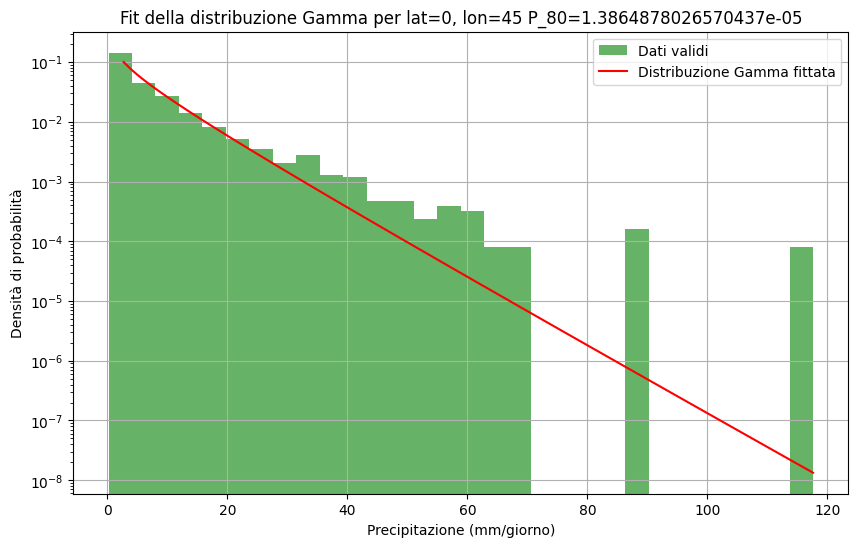

Cella lat=0, lon=46
Cella lat=0, lon=47
Cella lat=0, lon=48
Cella lat=0, lon=49
  Media, varianza, N, P(80): 4.44088158327175 45.22192126528695 3142 5.719673527693203e-05


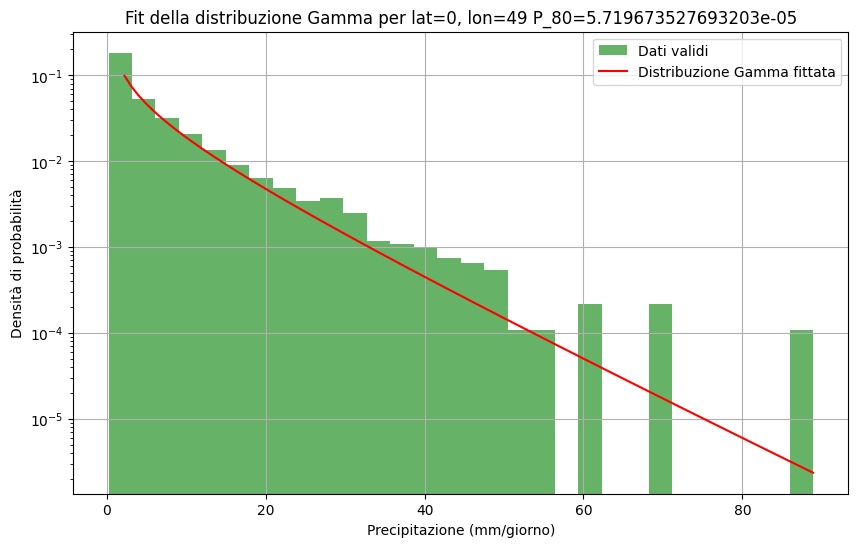

Cella lat=0, lon=50
Cella lat=0, lon=51
Cella lat=0, lon=52
Cella lat=0, lon=53
Cella lat=0, lon=54
Cella lat=0, lon=55
Cella lat=0, lon=56
Cella lat=0, lon=57
Cella lat=0, lon=58
Cella lat=1, lon=0
Cella lat=1, lon=1
Cella lat=1, lon=2
Cella lat=1, lon=3
Cella lat=1, lon=4
  Media, varianza, N, P(80): 6.796653018239508 86.91599345022783 2388 0.0004642787658694081


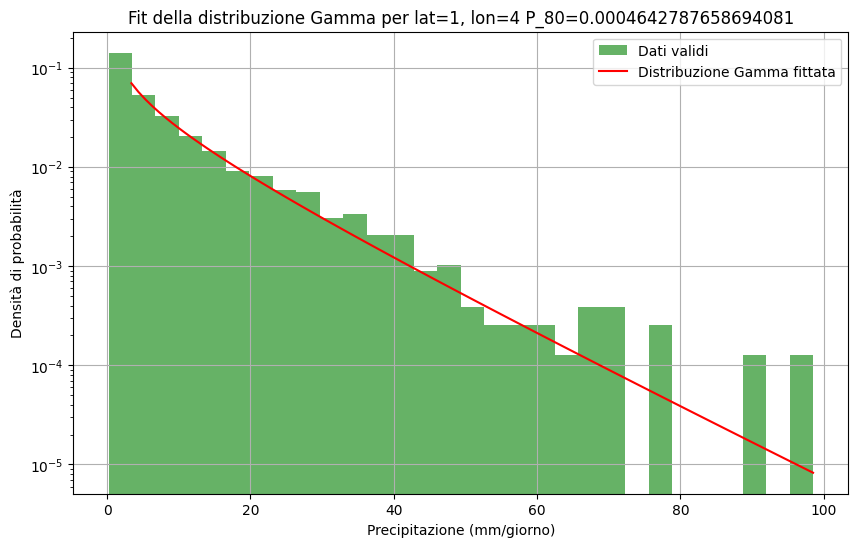

Cella lat=1, lon=5
Cella lat=1, lon=6
Cella lat=1, lon=7
Cella lat=1, lon=8
Cella lat=1, lon=9
Cella lat=1, lon=10
Cella lat=1, lon=11
Cella lat=1, lon=12
Cella lat=1, lon=13
Cella lat=1, lon=14
Cella lat=1, lon=15
Cella lat=1, lon=16
Cella lat=1, lon=17
Cella lat=1, lon=18
Cella lat=1, lon=19
Cella lat=1, lon=20
Cella lat=1, lon=21
Cella lat=1, lon=22
Cella lat=1, lon=23
Cella lat=1, lon=24
Cella lat=1, lon=25
Cella lat=1, lon=26
Cella lat=1, lon=27
Cella lat=1, lon=28
Cella lat=1, lon=29
Cella lat=1, lon=30
Cella lat=1, lon=31
Cella lat=1, lon=32
Cella lat=1, lon=33
Cella lat=1, lon=34
Cella lat=1, lon=35
Cella lat=1, lon=36
Cella lat=1, lon=37
Cella lat=1, lon=38
Cella lat=1, lon=39
Cella lat=1, lon=40
Cella lat=1, lon=41
Cella lat=1, lon=42
Cella lat=1, lon=43
Cella lat=1, lon=44
Cella lat=1, lon=45
Cella lat=1, lon=46
Cella lat=1, lon=47
  Media, varianza, N, P(80): 5.882330557187867 71.50694588493381 3163 0.0002725522855030471


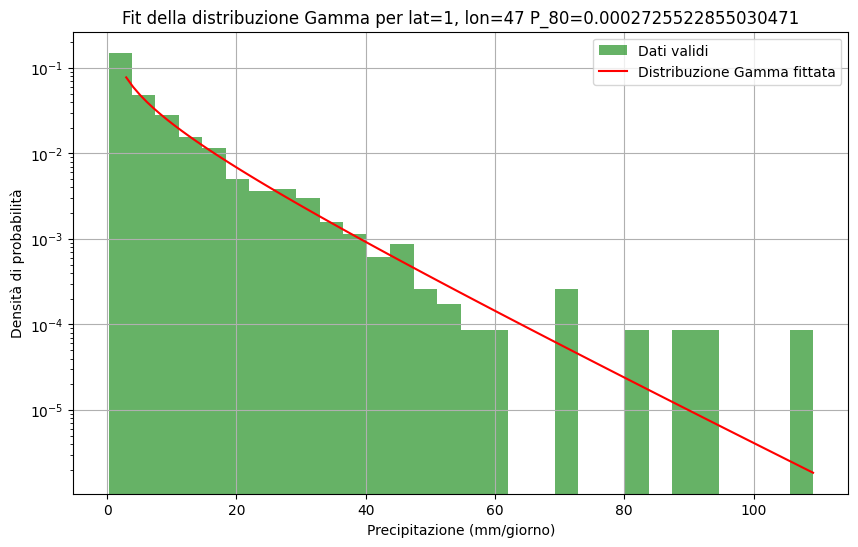

Cella lat=1, lon=48
Cella lat=1, lon=49
Cella lat=1, lon=50
Cella lat=1, lon=51
Cella lat=1, lon=52
Cella lat=1, lon=53
Cella lat=1, lon=54
Cella lat=1, lon=55
Cella lat=1, lon=56
  Media, varianza, N, P(80): 6.263753865087079 59.67142598014865 3496 7.8196795029295e-05


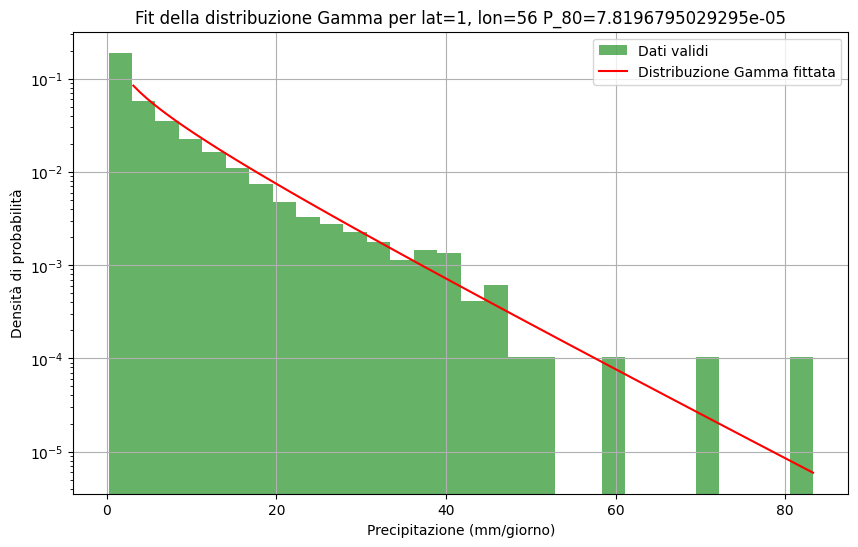

Cella lat=1, lon=57
Cella lat=1, lon=58
Cella lat=2, lon=0
Cella lat=2, lon=1
Cella lat=2, lon=2
Cella lat=2, lon=3
Cella lat=2, lon=4
Cella lat=2, lon=5
Cella lat=2, lon=6
Cella lat=2, lon=7
Cella lat=2, lon=8
Cella lat=2, lon=9
Cella lat=2, lon=10
Cella lat=2, lon=11
Cella lat=2, lon=12
Cella lat=2, lon=13
Cella lat=2, lon=14
Cella lat=2, lon=15
Cella lat=2, lon=16
Cella lat=2, lon=17
Cella lat=2, lon=18
Cella lat=2, lon=19
Cella lat=2, lon=20
Cella lat=2, lon=21
Cella lat=2, lon=22
Cella lat=2, lon=23
Cella lat=2, lon=24
Cella lat=2, lon=25
  Media, varianza, N, P(80): 5.919391851463611 50.91059114489871 3875 3.436592404115757e-05


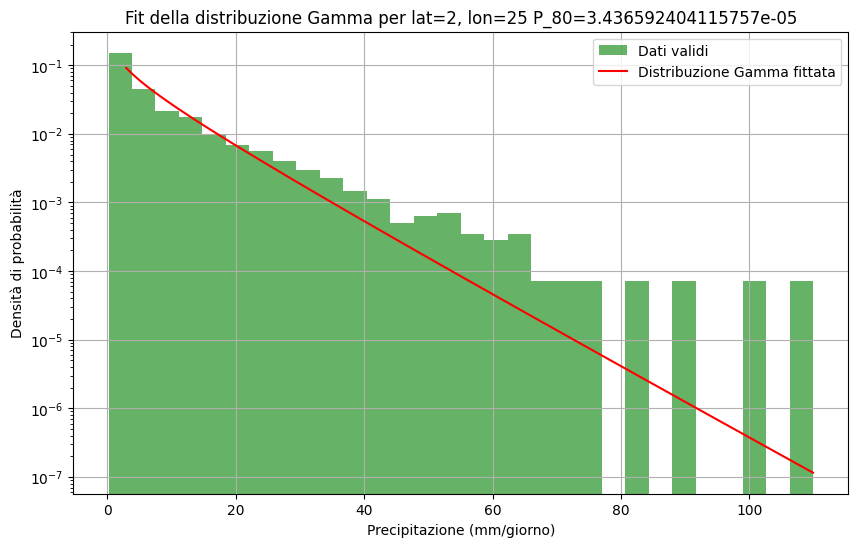

Cella lat=2, lon=26
Cella lat=2, lon=27
Cella lat=2, lon=28
Cella lat=2, lon=29
Cella lat=2, lon=30
Cella lat=2, lon=31
  Media, varianza, N, P(80): 5.390719914599864 59.57744964191777 3508 0.00013756292928202019


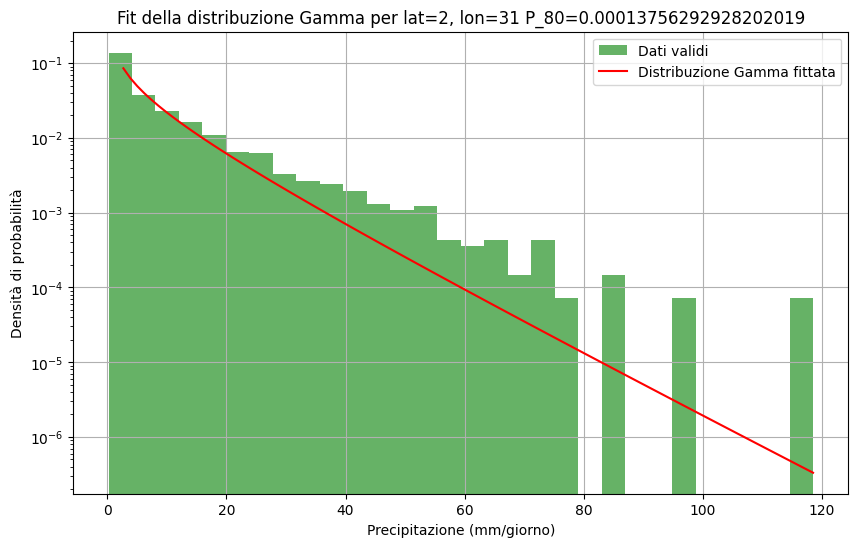

Cella lat=2, lon=32
Cella lat=2, lon=33
Cella lat=2, lon=34
Cella lat=2, lon=35
Cella lat=2, lon=36
Cella lat=2, lon=37
Cella lat=2, lon=38
Cella lat=2, lon=39
  Media, varianza, N, P(80): 5.460903107397249 65.2579760051274 3203 0.00021599470800226506


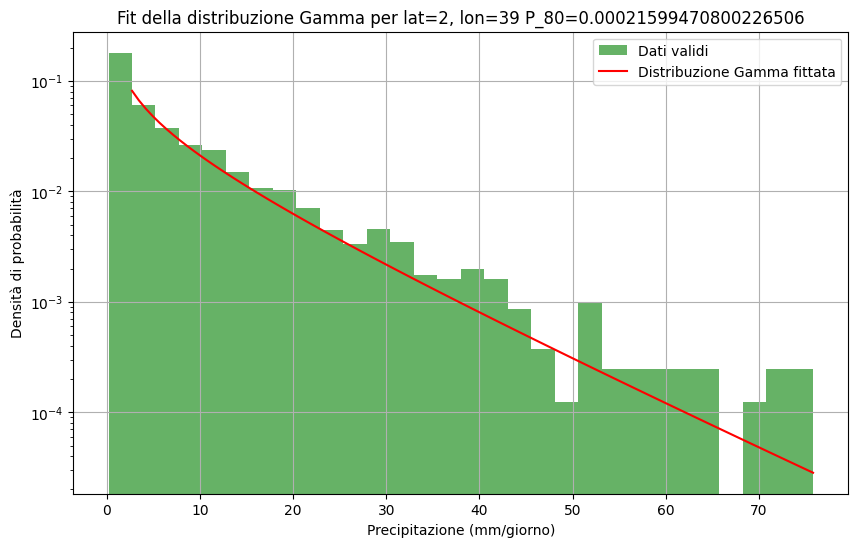

Cella lat=2, lon=40
  Media, varianza, N, P(80): 5.348309645925477 62.46753148921393 3394 0.0001837707201723937


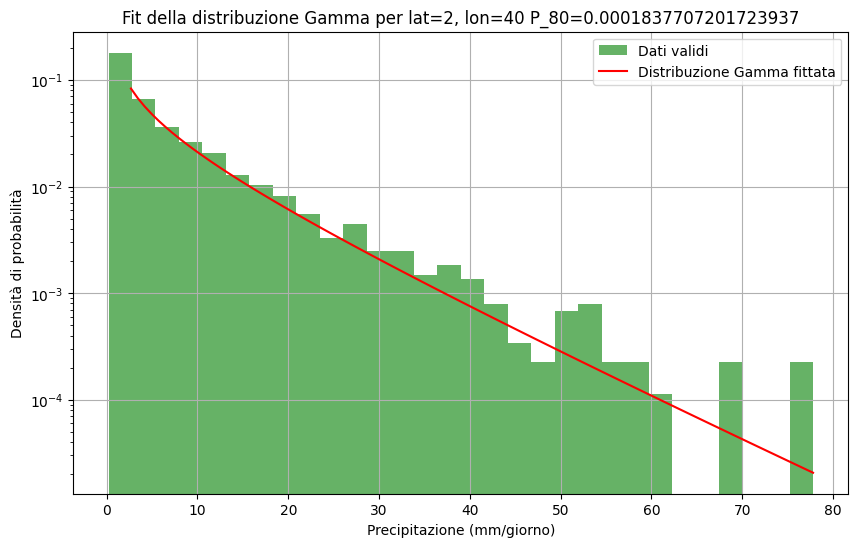

Cella lat=2, lon=41
Cella lat=2, lon=42
Cella lat=2, lon=43
Cella lat=2, lon=44
Cella lat=2, lon=45
Cella lat=2, lon=46
Cella lat=2, lon=47
Cella lat=2, lon=48
Cella lat=2, lon=49
Cella lat=2, lon=50
Cella lat=2, lon=51
  Media, varianza, N, P(80): 4.533517831282707 41.03774357910189 3148 2.6907679229637438e-05


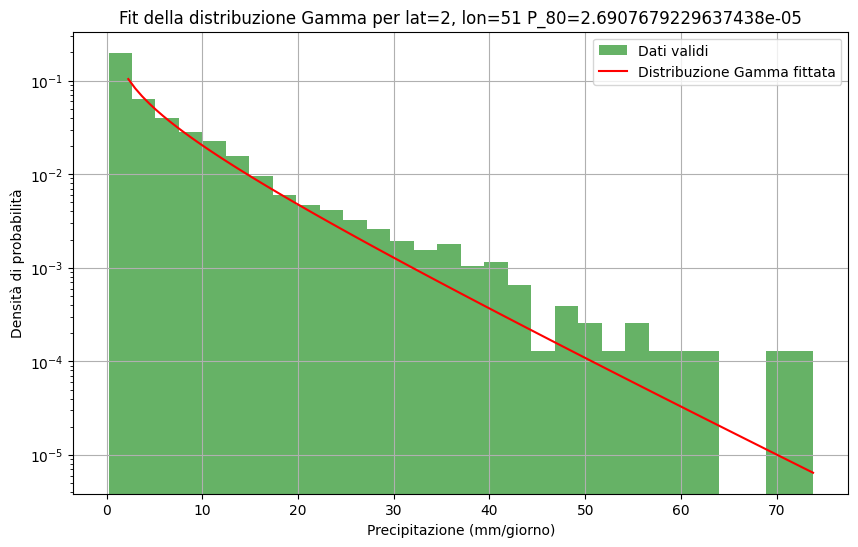

Cella lat=2, lon=52
Cella lat=2, lon=53
Cella lat=2, lon=54
Cella lat=2, lon=55
  Media, varianza, N, P(80): 4.338770280287658 51.10027539528218 3551 0.00013035914868153586


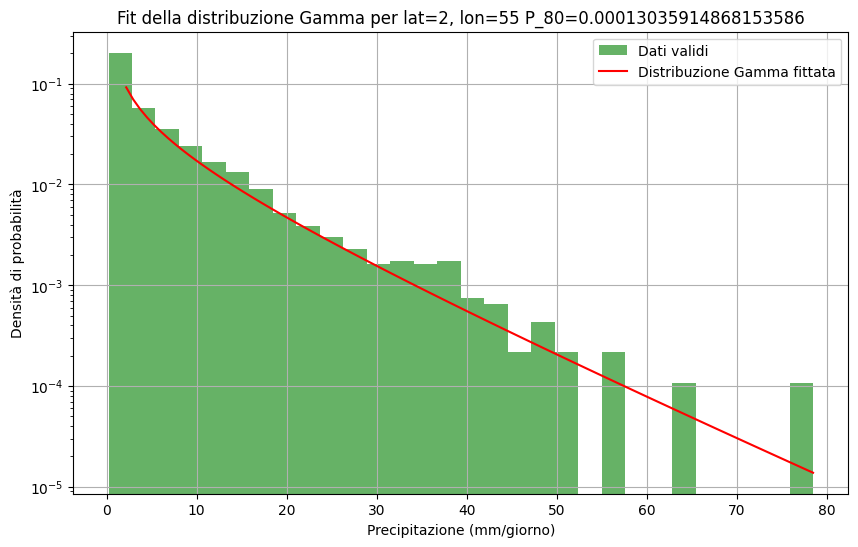

Cella lat=2, lon=56
  Media, varianza, N, P(80): 6.336162106377453 109.24146008798864 3400 0.0013712484641706935


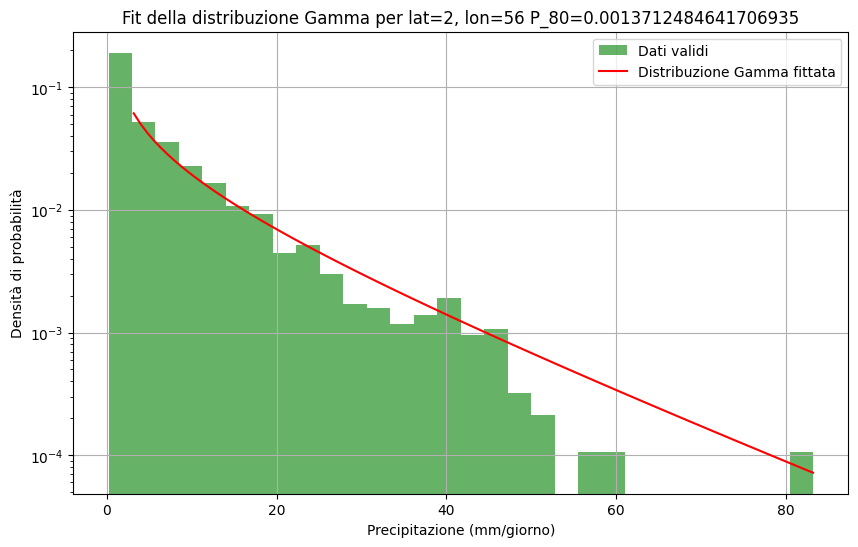

Cella lat=2, lon=57
  Media, varianza, N, P(80): 4.761922133189166 54.662847138479236 3386 0.00013392588625704693


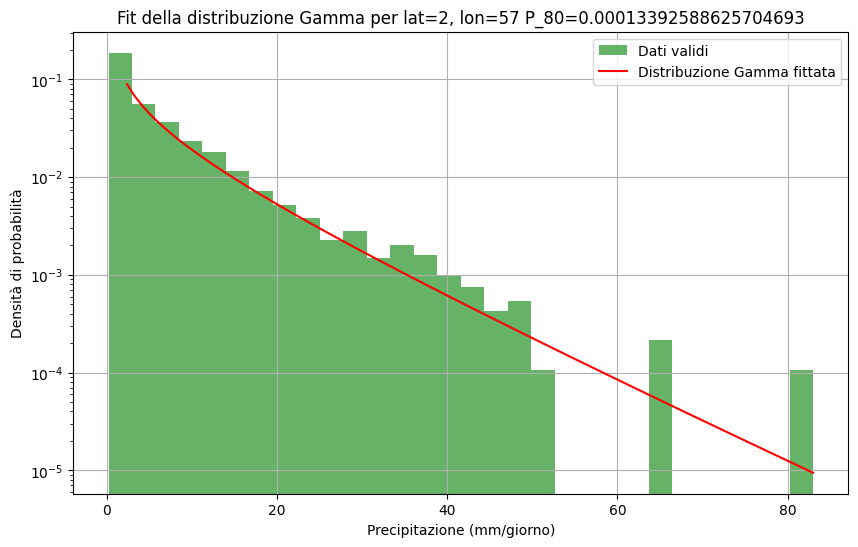

Cella lat=2, lon=58
  Media, varianza, N, P(80): 12.191766969502071 584.2214026564235 3448 0.02736421597128913


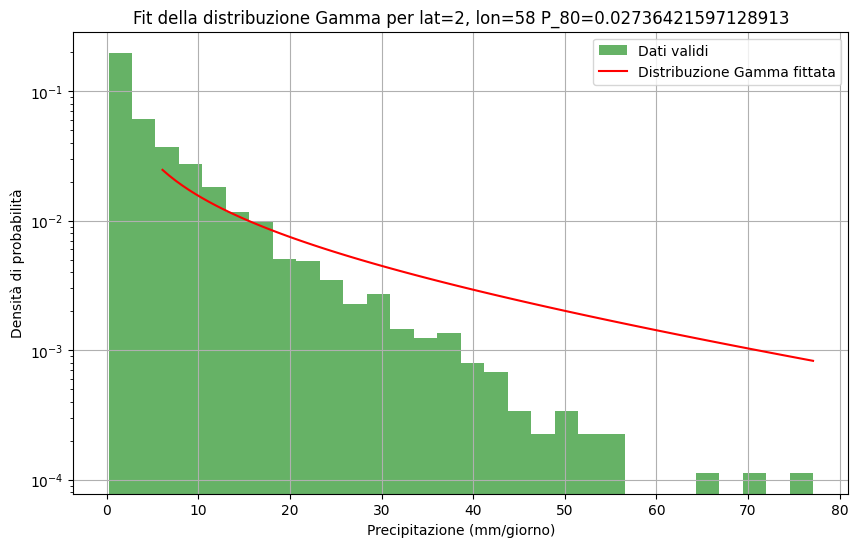

Cella lat=3, lon=0
Cella lat=3, lon=1
  Media, varianza, N, P(80): 5.878348832724904 43.41210801549944 2692 1.04974740731123e-05


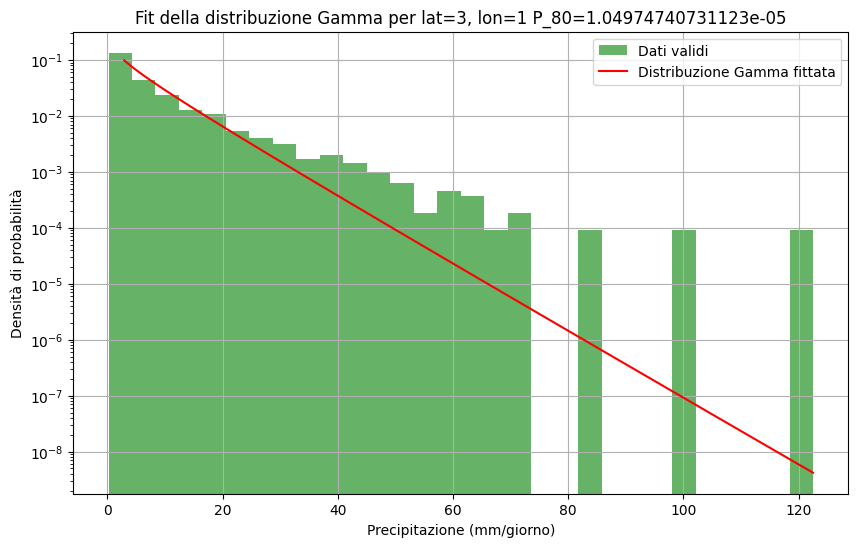

Cella lat=3, lon=2
Cella lat=3, lon=3
  Media, varianza, N, P(80): 6.437137584548268 83.0623556499859 2561 0.0004346663141102658


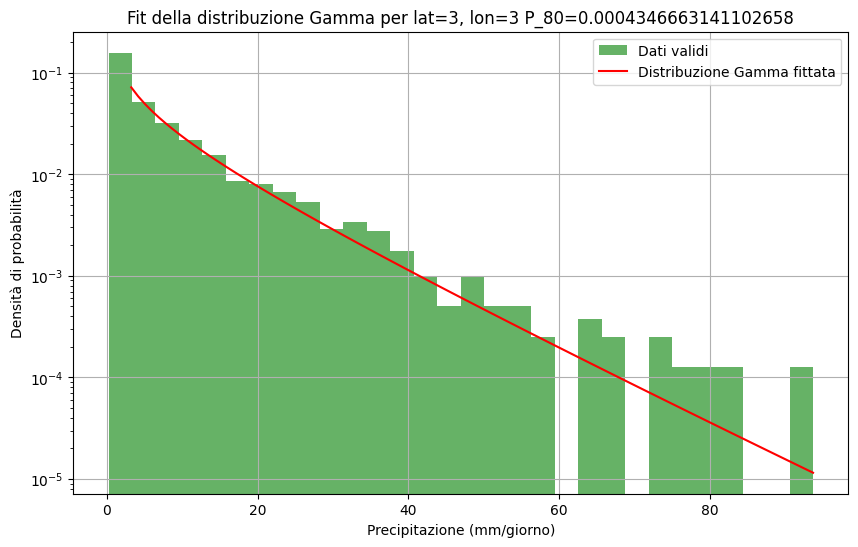

Cella lat=3, lon=4
  Media, varianza, N, P(80): 6.011808342999254 73.65502728827836 2561 0.0002958823889331885


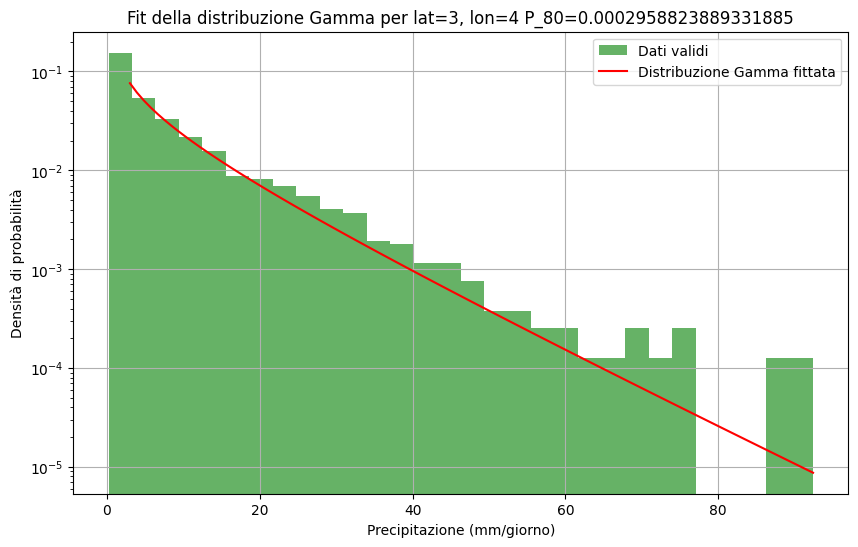

Cella lat=3, lon=5
  Media, varianza, N, P(80): 9.07612200161948 197.0833781958829 2583 0.004954008441112379


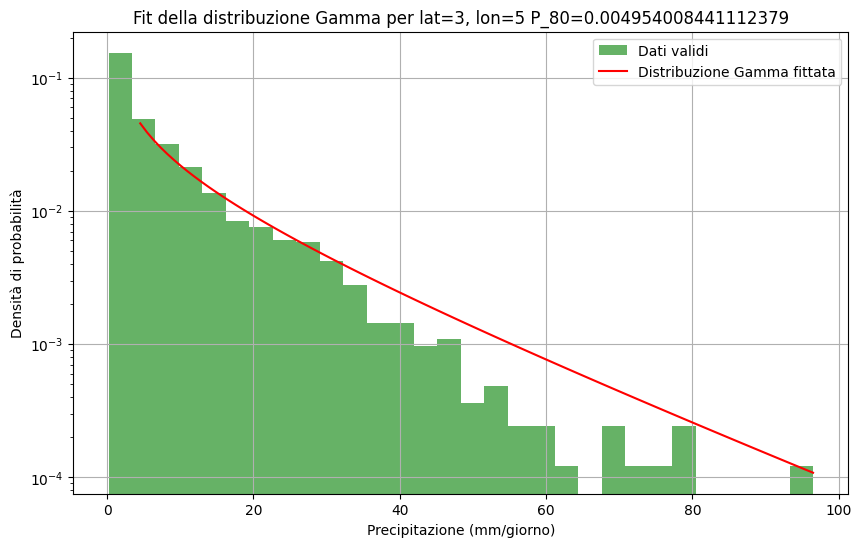

Cella lat=3, lon=6
  Media, varianza, N, P(80): 5.975024755865513 69.61994559014616 2627 0.00022596770278704437


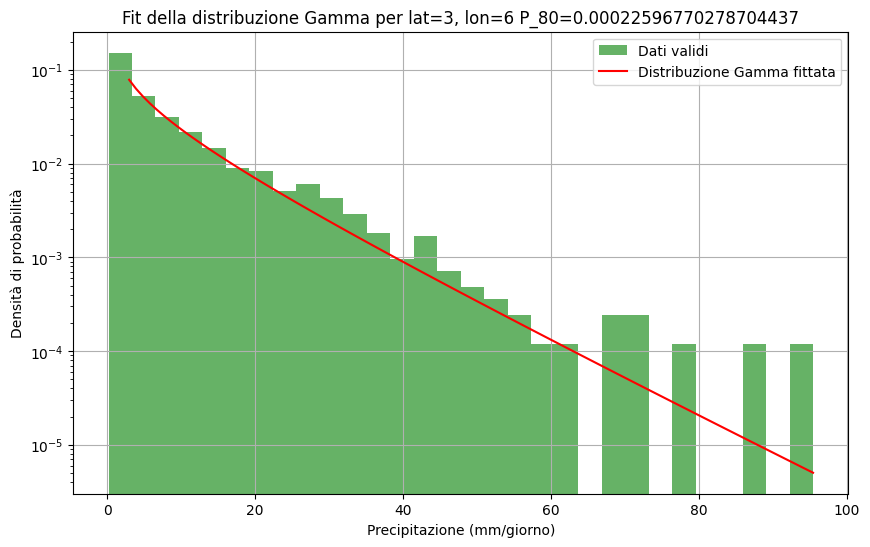

Cella lat=3, lon=7
Cella lat=3, lon=8
Cella lat=3, lon=9
Cella lat=3, lon=10
Cella lat=3, lon=11
Cella lat=3, lon=12
Cella lat=3, lon=13
Cella lat=3, lon=14
Cella lat=3, lon=15
Cella lat=3, lon=16
Cella lat=3, lon=17
Cella lat=3, lon=18
Cella lat=3, lon=19
Cella lat=3, lon=20
Cella lat=3, lon=21
Cella lat=3, lon=22
  Media, varianza, N, P(80): 5.3688957937377 41.0412465464914 3659 1.0959573071289697e-05


KeyboardInterrupt: 

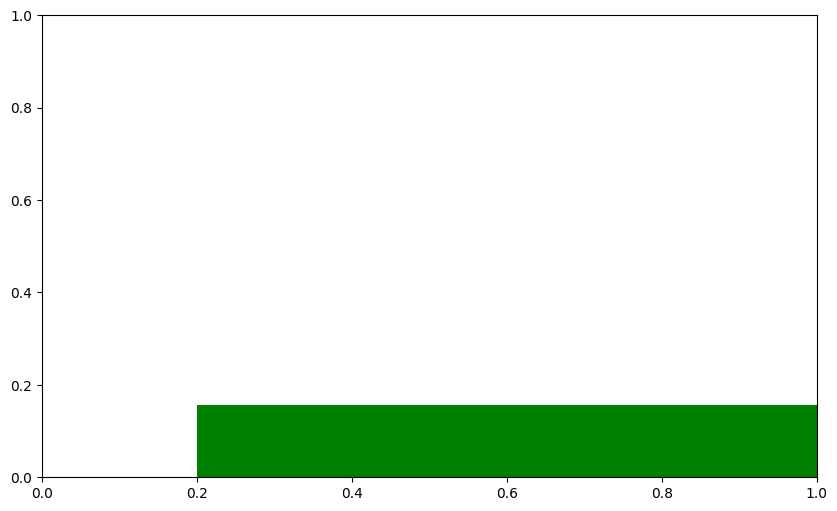

In [93]:
import xarray as xr
import numpy as np
from scipy.stats import gamma
import pandas as pd
import matplotlib.pyplot as plt

# Apri il file NetCDF usando xarray
file_path = file_indici[0]
ds = xr.open_dataset(file_path)

# Assumendo che i dati di precipitazione siano in una variabile chiamata 'precipitation'
variable = 'rr'
precipitation = ds[variable]

# Convertire il tempo in date utilizzando xarray e pandas
dates = pd.to_datetime(precipitation['time'].values)

# Filtrare i dati per il periodo 1986-2015
mask = (dates >= '1986-01-01') & (dates <= '2015-12-31')
precipitation_filtered = precipitation.sel(time=mask)

# Numero di celle latitudine-longitudine
num_lat = len(precipitation_filtered['lat'])
num_lon = len(precipitation_filtered['lon'])

# Definisci una funzione per calcolare media e varianza
def calcola_media_varianza_gamma(params_gamma):
    k = params_gamma[0]  # shape parameter
    loc = params_gamma[1]  # location parameter
    theta = params_gamma[2]  # scale parameter
    
    mean = k * theta
    variance = k * (theta ** 2)
    
    return mean, variance

# Inizializza un dizionario per memorizzare i parametri del fit e altre informazioni
parametri_fit_dict = {}

# Per ciascuna cella latitudine-longitudine
for lat in range(num_lat):
    for lon in range(num_lon):
        # Seleziona i dati per la cella latitudine-longitudine corrente
        dati_cell = precipitation_filtered[:, lat, lon]
        
        # Rimuovi i valori NaN e quelli inferiori a zero
        dati_validi = dati_cell[~np.isnan(dati_cell) & (dati_cell > 0.1)]
        num_elements=len(dati_validi)
        # Controlla se ci sono abbastanza dati validi
        if num_elements < 30:
            continue  # Salta la cella se ci sono meno di 30 osservazioni
        
        # Esegui il fit della distribuzione Gamma
        try:
            parametri_fit = gamma.fit(dati_validi)
            
            # Calcola media e varianza
            mean, variance = calcola_media_varianza_gamma(parametri_fit)
            
            # Aggiungi i parametri del fit e altre informazioni al dizionario
            parametri_fit_dict[(lat, lon)] = {
                'lat': float(precipitation_filtered['lat'][lat].values),
                'lon': float(precipitation_filtered['lon'][lon].values),
                'mean': mean,
                'variance': variance,
                'num_elements': len(dati_validi)
            }
        
        except Exception as e:
            print(f"Errore nel fit dei dati per la cella lat={lat}, lon={lon}: {e}")
            continue
        print(f"Cella lat={lat}, lon={lon}")
        P_80=1-gamma.cdf(80,*parametri_fit)
        if P_80 > 1e-5:
            print(f"  Media, varianza, N, P(80): {mean} {variance} {num_elements} {P_80}") 
            plt.figure(figsize=(10, 6))
            plt.hist(dati_validi, bins=30, density=True, alpha=0.6, color='g', label='Dati validi')
            
            x = np.linspace(mean/2, max(dati_validi), 100)
            pdf_fitted = gamma.pdf(x, *parametri_fit)
            plt.plot(x, pdf_fitted, 'r-', label='Distribuzione Gamma fittata')
            
            plt.title(f'Fit della distribuzione Gamma per lat={lat}, lon={lon} P_80={P_80}')
            plt.xlabel('Precipitazione (mm/giorno)')
            plt.ylabel('Densità di probabilità')
            plt.yscale('log')
            plt.legend()
            plt.grid(True)
            plt.show()


# ciclo corretto per dati storici  
**ATTENZIONE!** viene salvato tutto in un dictionary

In [136]:
#gengamma
import xarray as xr
import numpy as np
from scipy.stats import gengamma
import pandas as pd
import matplotlib.pyplot as plt

# Apri il file NetCDF usando xarray
file_path = file_indici[0]
ds = xr.open_dataset(file_path)

# Assumendo che i dati di precipitazione siano in una variabile chiamata 'precipitation'
variable = 'rr'
precipitation = ds[variable]

# Convertire il tempo in date utilizzando xarray e pandas
dates = pd.to_datetime(precipitation['time'].values)

# Filtrare i dati per il periodo 1986-2015
mask = (dates >= '1986-01-01') & (dates <= '2015-12-31')
precipitation_filtered = precipitation.sel(time=mask)

# Numero di celle latitudine-longitudine
num_lat = len(precipitation_filtered['lat'])
num_lon = len(precipitation_filtered['lon'])

# Definisci una funzione per calcolare media e varianza
def calcola_media_varianza_gengamma(params_gengamma):
    a = params_gengamma[0]
    c = params_gengamma[1]
    loc = params_gengamma[2]
    scale = params_gengamma[3]
    
    mean = loc + scale * (a / c)
    variance = scale**2 * (a / c**2)
    
    return mean, variance

# Inizializza un dizionario per memorizzare i parametri del fit e altre informazioni
parametri_fit_dict = {}

# Per ciascuna cella latitudine-longitudine
for lat in range(num_lat):
    for lon in range(num_lon):
        # Seleziona i dati per la cella latitudine-longitudine corrente
        dati_cell = precipitation_filtered[:, lat, lon]
        
        # Rimuovi i valori NaN e quelli inferiori a zero
        dati_validi = dati_cell[~np.isnan(dati_cell) & (dati_cell > 0.1)]
        num_elements=len(dati_validi)
        # Controlla se ci sono abbastanza dati validi
        if num_elements < 30:
            continue  # Salta la cella se ci sono meno di 30 osservazioni
        
        # Esegui il fit della distribuzione Generalized Gamma
        try:
            parametri_fit = gengamma.fit(dati_validi)
            
            # Calcola media e varianza
            mean, variance = calcola_media_varianza_gengamma(parametri_fit)
            
            # Aggiungi i parametri del fit e altre informazioni al dizionario
            parametri_fit_dict[(lat, lon)] = {
                'lat': float(precipitation_filtered['lat'][lat].values),
                'lon': float(precipitation_filtered['lon'][lon].values),
                'a'  : parametri_fit[0],
                'c'  : parametri_fit[1],
                'loc': parametri_fit[2],
                'scale': parametri_fit[3],
                'mean': mean,
                'variance': variance,
                'num_elements': len(dati_validi)/len(dati_cell)
            }
        
        except Exception as e:
            print(f"Errore nel fit dei dati per la cella lat={lat}, lon={lon}: {e}")
            continue
        print(f"Cella lat={lat}, lon={lon}")
        P_80=1-gengamma.cdf(80,*parametri_fit)
        percentuale_sup_80 = (dati_validi > 80).sum() / len(dati_validi) 
        if P_80 > 1e-3:
            print(f"  Media, varianza, N, P(80): {mean} {variance} {num_elements} {P_80}") 
            """
            plt.figure(figsize=(10, 6))
            plt.hist(dati_validi, bins=30, density=True, alpha=0.6, color='g', label='Dati validi')
            
            x = np.linspace(mean/2, max(dati_validi), 100)
            pdf_fitted = gengamma.pdf(x, *parametri_fit)
            plt.plot(x, pdf_fitted, 'r-', label='Distribuzione Generalized Gamma fittata')
            
            plt.title(f'Fit della distribuzione Generalized Gamma per lat={lat}, lon={lon} P_80={P_80:.4f} {percentuale_sup_80:.4f}')
            plt.xlabel('Precipitazione (mm/giorno)')
            plt.ylabel('Densità di probabilità')
            plt.yscale('log')
            plt.legend()
            plt.grid(True)
            plt.show()
            """

Cella lat=0, lon=0
  Media, varianza, N, P(80): 9.349273202447538 120.12768324021563 2476 0.0030708043336236113
Cella lat=0, lon=1
  Media, varianza, N, P(80): 3.7155767082966147 5.732911183508984 2501 0.015562631822062523
Cella lat=0, lon=2
  Media, varianza, N, P(80): 6.206721735072079 22.979149236343353 2360 0.024437749814146814
Cella lat=0, lon=3
  Media, varianza, N, P(80): 2.149790327934029 1.6761957487610342 2512 0.030647924451902453
Cella lat=0, lon=4
Cella lat=0, lon=5
  Media, varianza, N, P(80): 7.9929266018870715 113.05238061062482 2538 0.0018143388266851357
Cella lat=0, lon=6
  Media, varianza, N, P(80): 8.158862012868823 114.47929834596418 2739 0.0026686069011825353
Cella lat=0, lon=7
  Media, varianza, N, P(80): 7.08854993093251 35.43630960350503 2694 0.013609688134809561
Cella lat=0, lon=8
  Media, varianza, N, P(80): 3.5067979951254395 5.594950752394536 2748 0.022460026406980416
Cella lat=0, lon=9
  Media, varianza, N, P(80): 3.9038780724859983 7.039785004774079 2594 0

In [68]:
print(ds)

<xarray.Dataset>
Dimensions:  (time: 20088, lon: 59, lat: 45)
Coordinates:
  * time     (time) datetime64[ns] 1961-01-01T08:00:00 ... 2015-12-31T08:00:00
  * lon      (lon) float64 7.841 7.904 7.967 8.03 ... 11.31 11.37 11.43 11.5
  * lat      (lat) float64 44.66 44.7 44.74 44.79 ... 46.5 46.55 46.59 46.63
Data variables:
    rr       (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.4
    history:      Tue Feb 01 12:51:29 2022: cdo sellonlatbox,7.84,11.5,44.65,...
    institution:  ArCIS - Archivio Climatologico per l'Italia Settentionale
    References:   Pavan et al. 2018 - High resolution climate precipitation a...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...


In [39]:
print(gengamma.pdf(600, *params_gengamma))

3.9635633978158847e-07


In [ ]:
T=1/(1-p)

In [103]:
for key, value in parametri_fit_dict.items():
    print(f"Cella lat={value['lat']}, lon={value['lon']}")
    P_80=1-gengamma.cdf(80,value['a'],value['c'],value['loc'],value['scale'])
    TR=1/(P_80*value['num_elements'])
    if TR<100:
        print(f"  Media, Varianza, N: {value['mean']} {value['variance']} {value['num_elements']} {TR}")

Cella lat=44.655, lon=7.841
Cella lat=44.655, lon=7.90405
Cella lat=44.655, lon=7.9671
Cella lat=44.655, lon=8.03015
Cella lat=44.655, lon=8.0932
Cella lat=44.655, lon=8.15625
Cella lat=44.655, lon=8.2193
Cella lat=44.655, lon=8.282350000000001
Cella lat=44.655, lon=8.3454
Cella lat=44.655, lon=8.40845
Cella lat=44.655, lon=8.4715
Cella lat=44.655, lon=8.53455
Cella lat=44.655, lon=8.5976
Cella lat=44.655, lon=8.66065
Cella lat=44.655, lon=8.723700000000001
Cella lat=44.655, lon=8.786750000000001
Cella lat=44.655, lon=8.8498
Cella lat=44.655, lon=8.91285
Cella lat=44.655, lon=8.9759
  Media, Varianza, N: 4.8781416113616745 13.14979807894197 0.3350675428988682 74.80002205711476
Cella lat=44.655, lon=9.03895
  Media, Varianza, N: 12.498467943983648 99.26753268704921 0.30074844833880976 60.57228891815185
Cella lat=44.655, lon=9.102
Cella lat=44.655, lon=9.16505
  Media, Varianza, N: 11.290157890606558 100.75308598839496 0.3861810879883169 89.23787864745648
Cella lat=44.655, lon=9.22810000

$$  
TR = \frac{1}{{P_{80} \times PERC}}
$$
$$
f(x; a, c, \theta, p) = \frac{p}{\theta^c \cdot \Gamma(a/p)} \cdot \left( \frac{x-\theta}{\theta} \right)^{ac-1} \cdot \exp \left( - \left( \frac{x-\theta}{\theta} \right)^p \right)
$$
a: È il parametro di forma. Controlla la forma della distribuzione, influenzando la steilizzazione della coda della distribuzione.

c: È un parametro di forma addizionale. Questo parametro offre maggiore flessibilità alla distribuzione gamma, consentendo di modellare una varietà più ampia di forme di distribuzione.
$$ \theta
$$ : È il parametro di posizione o spostamento. Determina la posizione della distribuzione lungo l'asse x.

p: È il parametro di scala. Controlla la scala della distribuzione, influenzando la larghezza della distribuzione. Valori più alti di p corrispondono a distribuzioni più strette.

**caso proiezioni**

In [4]:
import xarray as xr
import numpy as np
from scipy.stats import gengamma
import pandas as pd
import matplotlib.pyplot as plt

# Apri il file NetCDF usando xarray
datasets=[]
for f in file_indici[1:]:
    print(f)
    datasets.append(f)
ds = xr.open_mfdataset(datasets, combine='nested', concat_dim='realization')
print('Dataset completo')


# Assumendo che i dati di precipitazione siano in una variabile chiamata 'rr'
variable = 'pr'
precipitation = ds[variable]

# Convertire il tempo in date utilizzando xarray e pandas
dates = pd.to_datetime(precipitation['time'].values)

# Filtrare i dati per il periodo 1986-2015
mask = (dates >= '2021-01-01') & (dates <= '2040-12-31')
precipitation_filtered = precipitation.sel(time=mask)
print(precipitation_filtered)
# Ottieni i valori di latitudine e longitudine
lat_values = precipitation_filtered['lat'].values
lon_values = precipitation_filtered['lon'].values

# Definisci una funzione per calcolare media e varianza della Generalized Gamma
def calcola_media_varianza_gengamma(params_gengamma):
    a = params_gengamma[0]
    c = params_gengamma[1]
    loc = params_gengamma[2]
    scale = params_gengamma[3]

    mean = loc + scale * (a / (1 - c))
    variance = scale ** 2 * (a / (1 - c) ** 2)

    return mean, variance

./Indici_2023/PNACC_2023/CLMcom_CCLM4-8-17_EC-EARTH/CLMcom_CCLM4-8-17_EC-EARTH_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4
./Indici_2023/PNACC_2023/CLMcom_CCLM4-8-17_MPI-ESM-LR/CLMcom_CCLM4-8-17_MPI-ESM-LR_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4
./Indici_2023/PNACC_2023/DMI_HIRHAM5_EC-EARTH/DMI_HIRHAM5_EC-EARTH_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4
./Indici_2023/PNACC_2023/GERICS_REMO2015_NorESM1-M/GERICS_REMO2015_NorESM1-M_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4
./Indici_2023/PNACC_2023/KNMI_RACMO22E_HadGEM2-ES/KNMI_RACMO22E_HadGEM2-ES_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4
./Indici_2023/PNACC_2023/MPI-CSC_REMO2009_MPI-ESM-LR/MPI-CSC_REMO2009_MPI-ESM-LR_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4
./Indici_2023/PNACC_2023/SMHI_RCA4_HadGEM2-ES/SMHI_RCA4_HadGEM2-ES_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4
./Indici_2023/PNACC_2023/SMHI_RCA4_MPI-ESM-LR/SMHI_RCA4_MPI-ESM-LR_rcp4.5_2016-2065_BASD_ARCIS_daily_pr.nc4
Dataset completo
<xarray.DataArray 'pr' (realization: 8, time: 7305, lat: 45

In [5]:


# Inizializza un dizionario per memorizzare i parametri del fit e altre informazioni
parametri_fit_dict_proj = {}
print('Inizio ciclo')
# Per ciascuna cella latitudine-longitudine
for lat_index in range(len(lat_values)):
    for lon_index in range(len(lon_values)):
        # Seleziona i dati per la cella latitudine-longitudine corrente
        dati_cell = precipitation_filtered.isel(lat=lat_index, lon=lon_index).compute()  # Aggiungi .compute()
        
        # Filtra i valori non NaN e > 0 usando NumPy
        filtered_data = dati_cell.where(dati_cell > 0, drop=True).values
        
        # Ottieni i valori come un array numpy e rimuovi le dimensioni non necessarie
        filtered_values = filtered_data.flatten()
        # Rimuovi i valori non finiti (NaN o infiniti)
        filtered_values = filtered_values[np.isfinite(filtered_values)]
        # Conta i valori non NaN e >0
        num_elements = len(filtered_values)
        print(lat_index, lon_index, num_elements)
        # Controlla se ci sono abbastanza dati validi
        if num_elements < 30:
            print('<30')
            continue  # Salta la cella se ci sono meno di 30 osservazioni
        
        # Esegui il fit della distribuzione Generalized Gamma
        try:
            print('Elaborazione fit...')
            parametri_fit = gengamma.fit(filtered_values)
          
            # Calcola media e varianza
            mean, variance = calcola_media_varianza_gengamma(parametri_fit)
            #print(parametri_fit)
            # Aggiungi i parametri del fit e altre informazioni al dizionario
            
            parametri_fit_dict_proj[f"{lat_index},{lon_index}"] = {
               'lat': float(precipitation_filtered['lat'][lat_index].values),
                'lon': float(precipitation_filtered['lon'][lon_index].values),
                'a'  : parametri_fit[0],
                'c'  : parametri_fit[1],
                'loc': parametri_fit[2],
                'scale': parametri_fit[3],
                'mean': mean,
                'variance': variance,
                'num_elements': num_elements / dati_cell.size
            }
            print(parametri_fit_dict_proj[f"{lat_index},{lon_index}"])
        
        except Exception as e:
            print(f"Errore nel fit dei dati per {num_elements}: {e}")
            continue
        
        P_80 = 1 - gengamma.cdf(80, *parametri_fit)
        perc = num_elements / len(dati_cell) * 100
        
        if P_80 > 1e-5:
            print(f"Cella lat={lat_index}, lon={lon_index}")
            print(f"  Media, varianza, N, P(80): {mean:.4f}, {variance:.4f}, {num_elements}, {P_80:.4f}")
            # Plot dei grafici
            """
            plt.figure(figsize=(10, 6))
            plt.hist(dati_validi, bins=30, density=True, alpha=0.6, color='g', label='Dati validi')
            
            x = np.linspace(min(dati_validi), max(dati_validi), 100)
            pdf_fitted = gengamma.pdf(x, *parametri_fit)
          
            plt.plot(x, pdf_fitted, 'r-', label='Distribuzione Generalized Gamma fittata')
            
            plt.title(f'Fit della distribuzione Generalized Gamma per lat={lat}, lon={lon} P_80={P_80:.4f}')
            plt.xlabel('Precipitazione (mm/giorno)')
            plt.ylabel('Densità di probabilità')
            plt.yscale('log')
            plt.legend()
            plt.grid(True)
            plt.show()
            """
df=pd.DataFrame.from_dict(parametri_fit_dict_proj,orient='index')
df.to_csv( 'pr_stat_proj.csv',index=False)

Inizio ciclo
0 0 13781
Elaborazione fit...
{'lat': 44.655, 'lon': 7.841, 'a': 1.971153528709829, 'c': 0.47881490825414275, 'loc': 0.10030356130857826, 'scale': 1.3178327682089066, 'mean': 5.084426769059707, 'variance': 12.602511061785632, 'num_elements': 0.2358145106091718}
Cella lat=0, lon=0
  Media, varianza, N, P(80): 5.0844, 12.6025, 13781, 0.0062
0 1 13652
Elaborazione fit...
{'lat': 44.655, 'lon': 7.90405, 'a': 2.001525289204834, 'c': 0.49250744562977766, 'loc': 0.10003794797059282, 'scale': 1.3265642552082981, 'mean': 5.331941119140305, 'variance': 13.675975487359628, 'num_elements': 0.23360711841204654}
Cella lat=0, lon=1
  Media, varianza, N, P(80): 5.3319, 13.6760, 13652, 0.0046
0 2 12584
Elaborazione fit...
{'lat': 44.655, 'lon': 7.9671, 'a': 1.8175401147448302, 'c': 0.5140024641087795, 'loc': 0.10001773286562035, 'scale': 1.809930150418858, 'mean': 6.868818828204354, 'variance': 25.208064403404478, 'num_elements': 0.21533196440793978}
Cella lat=0, lon=2
  Media, varianza, N

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [17]:
print(filtered_data)

<xarray.DataArray 'pr' (realization: 8, time: 5929)>
dask.array<getitem, shape=(8, 5929), dtype=float32, chunksize=(1, 5929), chunktype=numpy.ndarray>
Coordinates:
    lon      float64 7.841
    lat      float64 44.66
  * time     (time) datetime64[ns] 2021-01-04 2021-01-05 ... 2040-12-31
Dimensions without coordinates: realization
Attributes:
    units:        mm
    description:  Precipitation
    longname:     total precipitation amount


In [14]:
# Crea un array per memorizzare i conteggi
non_nan_counts = np.zeros((len(lat_values), len(lon_values)))

# Itera su tutte le combinazioni di latitudine e longitudine
for lat_index in range(len(lat_values)):
    for lon_index in range(len(lon_values)):
        # Seleziona i dati per la cella latitudine-longitudine corrente
        dati_cell = precipitation_filtered.isel(lat=lat_index, lon=lon_index)
        # Filtra i valori non NaN e >0
        filtered_data = dati_cell.where(dati_cell > 0).dropna(dim='time', how='all').dropna(dim='realization', how='all')
        # Conta
        non_nan_positive_count = filtered_data.count(dim=['realization', 'time']).values
       
        print (lat_index,lon_index,non_nan_positive_count)
       

0 0 13781
0 1 13652
0 2 12584
0 3 13399


KeyboardInterrupt: 

In [170]:
print(precipitation_filtered)


<xarray.DataArray 'pr' (realization: 16, time: 7305, lat: 45, lon: 59)>
dask.array<getitem, shape=(16, 7305, 45, 59), dtype=float32, chunksize=(1, 7305, 45, 59), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 7.841 7.904 7.967 8.03 ... 11.31 11.37 11.43 11.5
  * lat      (lat) float64 44.66 44.7 44.74 44.79 ... 46.5 46.55 46.59 46.63
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2040-12-31
Dimensions without coordinates: realization
Attributes:
    units:        mm
    description:  Precipitation
    longname:     total precipitation amount


In [167]:
parametri_fit_dict_proj

{}

In [132]:
print(precipitation_filtered)

<xarray.DataArray 'pr' (realization: 8, time: 7305, lat: 45, lon: 59)>
dask.array<getitem, shape=(8, 7305, 45, 59), dtype=float32, chunksize=(1, 7305, 45, 59), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 7.841 7.904 7.967 8.03 ... 11.31 11.37 11.43 11.5
  * lat      (lat) float64 44.66 44.7 44.74 44.79 ... 46.5 46.55 46.59 46.63
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2040-12-31
Dimensions without coordinates: realization
Attributes:
    units:        mm
    description:  Precipitation
    longname:     total precipitation amount


In [131]:
print(dati_cell)

<xarray.DataArray 'pr' (realization: 8, time: 7305)>
dask.array<getitem, shape=(8, 7305), dtype=float32, chunksize=(1, 7305), chunktype=numpy.ndarray>
Coordinates:
    lon      float64 8.093
    lat      float64 44.66
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2040-12-31
Dimensions without coordinates: realization
Attributes:
    units:        mm
    description:  Precipitation
    longname:     total precipitation amount


In [142]:
for value in parametri_fit_dict.values():
    print(value)

{'lat': 44.655, 'lon': 7.841, 'a': 0.6968352173846186, 'c': 0.7844568292751595, 'loc': 0.19999999280917583, 'scale': 10.299723195883779, 'mean': 9.349273202447538, 'variance': 120.12768324021563, 'num_elements': 0.22599488864549105}
{'lat': 44.655, 'lon': 7.90405, 'a': 2.155847058237715, 'c': 0.38286173986581007, 'loc': 0.19999998319076912, 'scale': 0.6243391971905623, 'mean': 3.7155767082966147, 'variance': 5.732911183508984, 'num_elements': 0.2282767433369843}
{'lat': 44.655, 'lon': 7.9671, 'a': 1.5701497773345672, 'c': 0.39766872657343144, 'loc': 0.19999999548880526, 'scale': 1.52131052689507, 'mean': 6.206721735072079, 'variance': 22.979149236343353, 'num_elements': 0.2154070828769624}
{'lat': 44.655, 'lon': 8.03015, 'a': 2.2680420135279027, 'c': 0.3072156263123118, 'loc': 0.19999998507998631, 'scale': 0.26410712755089477, 'mean': 2.149790327934029, 'variance': 1.6761957487610342, 'num_elements': 0.22928075940124132}
{'lat': 44.655, 'lon': 8.0932, 'a': 0.6986231678295128, 'c': 0.95

In [144]:
df=pd.DataFrame.from_dict(parametri_fit_dict,orient='index')
df.to_csv( 'pr_stat_hist.csv',index=False)

In [2]:
def plot_gengamma_comparison(lat, lon, file_his, file_proj):
    # Leggi i file CSV
    ds_his = pd.read_csv(file_his)
    ds_proj = pd.read_csv(file_proj)
    
     # Trova l'elemento più vicino alla coppia di coordinate specificata
    params_his = find_nearest(ds_his, lat, lon)
    params_proj = find_nearest(ds_proj, lat, lon)
    
    # Estrai i parametri dal DataFrame storico
    a_his = params_his['a']
    c_his = params_his['c']
    loc_his = params_his['loc']
    scale_his = params_his['scale']
    
    # Estrai i parametri dal DataFrame proiettato
    a_proj = params_proj['a']
    c_proj = params_proj['c']
    loc_proj = params_proj['loc']
    scale_proj = params_proj['scale']
    
    # Crea le distribuzioni gengamma con i parametri estratti
    dist_his = gengamma(a_his, c_his, loc_his, scale_his)
    dist_proj = gengamma(a_proj, c_proj, loc_proj, scale_proj)
    
    # Genera i valori x per il grafico
    x = np.linspace(1, 100, 1000)
    
    # Calcola le densità di probabilità
    pdf_his = dist_his.pdf(x)
    pdf_proj = dist_proj.pdf(x)


    # Calcola P_80 per entrambi i dataset
    P_80_his = 1 - gengamma.cdf(80, params_his['a'], params_his['c'], loc=params_his['loc'], scale=params_his['scale'])
    P_80_proj = 1 - gengamma.cdf(80, params_proj['a'], params_proj['c'], loc=params_proj['loc'], scale=params_proj['scale'])

    # Calcola i tempi di ritorno
    TR_his=1/(P_80_his*params_his['num_elements'])
    TR_proj=1/(P_80_his*params_proj['num_elements'])
    print(TR_his,TR_proj)
    # Plotta le distribuzioni
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Asse principale per le distribuzioni gengamma
    ax1.plot(x, pdf_his, label='Historical', color='blue')
    ax1.plot(x, pdf_proj, label='Projected', color='red')
    ax1.set_yscale('log')
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Probability Density (log scale)')
    ax1.legend(loc='upper right')
    ax1.grid(True, which="both", ls="--")
    
    # Mostra P_80 sul grafico
    """
    plt.text(10, pdf_his.max(), f'P_80 Historical: {P_80_his:.4f}', color='blue', fontsize=10)
    plt.text(10, pdf_his.max() * 0.8, f'P_80 Projected: {P_80_proj:.4f}', color='red', fontsize=10)
    plt.text(40,pdf_his.max()*0.5,f'Tempo di ritorno his:{TR_his:.4f}', color='blue', fontsize=10)
    plt.text(40,pdf_his.max()*0.3,f'Tempo di ritorno proj:{TR_proj:.4f}', color='red', fontsize=10)
    """

    # Crea un secondo asse verticale per il mean di ds_his
    ax2 = ax1.twinx()
    ax2.axvline(params_his['mean'], color='blue', linestyle='--', label='Mean Historical')
   # ax2.set_ylabel('Mean Historical', color='blue')
   # ax2.tick_params(axis='y', labelcolor='blue')
    
    # Crea un terzo asse verticale per il mean di ds_proj
    ax3 = ax1.twinx()
    ax3.spines["right"].set_position(("outward", 60))  # sposta il terzo asse a destra
    ax3.axvline(params_proj['mean'], color='red', linestyle='--', label='Mean Projected')
    #ax3.set_ylabel('Mean Projected', color='red')
    #ax3.tick_params(axis='y', labelcolor='red')
    
    # Titolo del grafico
    plt.title(f'Generalized Gamma Distribution Comparison for Lat={lat}, Lon={lon}')
    
    plt.show()

# Esempio di utilizzo della funzione


In [3]:
def find_nearest(df, lat, lon):
    distances = np.sqrt((df['lat'] - lat)**2 + (df['lon'] - lon)**2)
    nearest_index = distances.idxmin()
    return df.loc[nearest_index]

In [11]:
from scipy.stats import gengamma

10620.148101861201 10494.297873590589


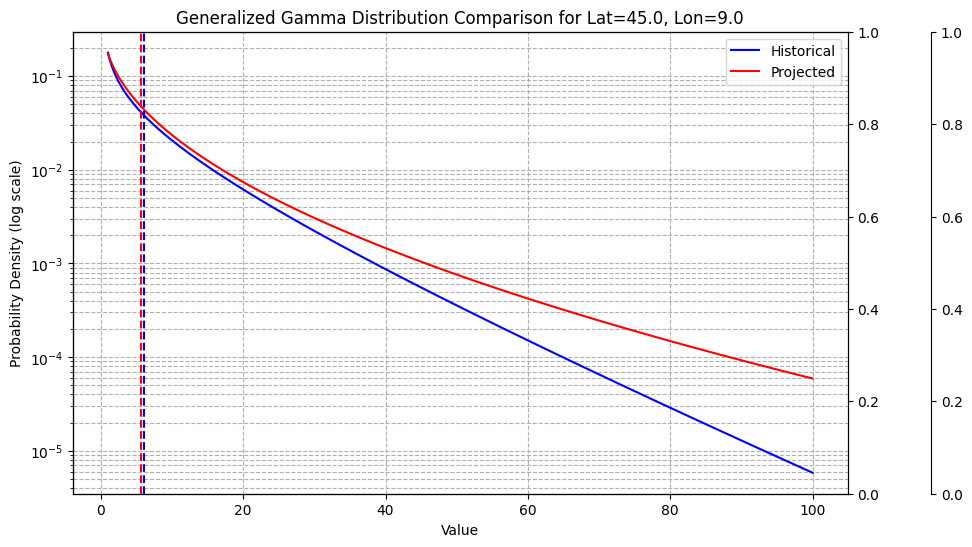

In [12]:
lat = 45.
lon =9.
file_his = 'pr_stat_hist.csv'
file_proj = 'pr_stat_proj.csv'

plot_gengamma_comparison(lat, lon, file_his, file_proj)

In [35]:
def calculate_probabilities(file_his, file_proj, X):
    # Carica i dati dai file CSV
    ds_his = pd.read_csv(file_his)
    ds_proj = pd.read_csv(file_proj)

    # Inizializza una lista per memorizzare i risultati
    results = []

    # Itera attraverso tutte le coordinate presenti in file_his
    for index, row in ds_his.iterrows():
        lat = row['lat']
        lon = row['lon']

        # Trova l'elemento più vicino nella proiezione
        params_his = find_nearest(ds_his, lat, lon)
        params_proj = find_nearest(ds_proj, lat, lon)

        # Calcola la probabilità di eventi oltre X per his e proj
        P_his = 1 - gengamma.cdf(X, params_his['a'], params_his['c'], loc=params_his['loc'], scale=params_his['scale'])
        P_proj = 1 - gengamma.cdf(X, params_proj['a'], params_proj['c'], loc=params_proj['loc'], scale=params_proj['scale'])

        # Calcola il tempo di ritorno per his e proj
        T_his = 1 / P_his if P_his != 0 else np.inf
        T_proj = 1 / P_proj if P_proj != 0 else np.inf

        # Calcola il rapporto tra (1-Pproj(X))/(1-Phis(X))
        ratio = (1 - P_proj) / (1 - P_his) if (1 - P_his) != 0 else np.inf

        # Memorizza i risultati
        results.append({
            'lat': lat,
            'lon': lon,
            'P_his': P_his,
            'P_proj': P_proj,
            'T_his': T_his,
            'T_proj': T_proj,
            'ratio': ratio
        })

    # Converti i risultati in un DataFrame
    results_df = pd.DataFrame(results)
    return results_df


In [38]:
# Esegui il calcolo per un valore fissato X (ad esempio, X = 80)
X = 40
file_his = 'pr_stat_hist.csv'
file_proj = 'pr_stat_proj.csv'
results_df = calculate_probabilities(file_his, file_proj, X)

# Stampa i risultati
print(results_df)

         lat       lon     P_his    P_proj       T_his      T_proj     ratio
0     44.655   7.84100  0.028625  0.035148   34.933893   28.451262  0.993285
1     44.655   7.90405  0.053636  0.030313   18.644246   32.988681  1.024644
2     44.655   7.96710  0.069007  0.033794   14.491258   29.591468  1.037824
3     44.655   8.03015  0.074374  0.030381   13.445590   32.915588  1.047528
4     44.655   8.09320  0.010275  0.024921   97.321322   40.127344  0.985203
...      ...       ...       ...       ...         ...         ...       ...
2457  46.635  11.24570  0.001603  0.020959  623.928398   47.711096  0.980612
2458  46.635  11.30875  0.011525  0.018328   86.766721   54.561023  0.993118
2459  46.635  11.37180  0.023003  0.018282   43.471781   54.697673  1.004832
2460  46.635  11.43485  0.014181  0.012339   70.515409   81.044634  1.001869
2461  46.635  11.49790  0.003310  0.006760  302.087446  147.920449  0.996538

[2462 rows x 7 columns]


In [39]:
results_df.to_csv('results_pr_40.csv')